<div>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/NN.png" 
   width="350" style="margin: 5px auto; display: block; position: relative; left: -20px;" />
</div>

<!--NAVIGATION-->
### Implementation of various learning rate scheduler | [Implementation of various Optimizers](various_losses_v_iteration_updated.ipynb) 

## Submodule -1.5 : Training and Optimzation

## Table of Contents
#### 1. [Vanishing and exploding gradient](#Vanishing-and-exploding-gradient)
#### 2. [Lienear Learning Rate for an objective function](#Linear-Lerninag-rate-for-an-objective-function)
#### 3. [Exponential Lerninag rate for an objective function](#Exponential-lerninag-rate-for-an-objective-function)
#### 4. [Polynomial lerninag rate for an objective function](#Polynomial-lerninag-rate-for-an-objective-function)


# Vanishing and exploding gradient


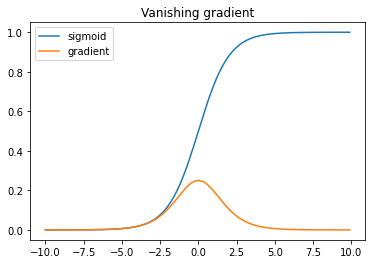

A single matrix 
 tensor([[ 0.0755, -0.5506,  1.0990, -0.2945, -0.7642],
        [ 1.3767, -0.0128, -0.6979,  0.7129, -0.8633],
        [-1.1760,  0.8317, -1.7301,  0.8764,  0.7376],
        [-2.8814,  1.8972,  0.7920, -2.3767, -0.7378],
        [-0.3042,  0.2119,  0.3488, -1.4609, -0.8841]])
After multiplying 100 matrices
 tensor([[ 2.0324e+28, -1.3881e+28, -6.4728e+28,  7.3849e+28,  4.8724e+28],
        [ 3.8100e+28, -2.6021e+28, -1.2134e+29,  1.3844e+29,  9.1337e+28],
        [-5.4731e+28,  3.7380e+28,  1.7430e+29, -1.9887e+29, -1.3121e+29],
        [-7.1614e+28,  4.8910e+28,  2.2807e+29, -2.6021e+29, -1.7168e+29],
        [ 2.2096e+27, -1.5091e+27, -7.0371e+27,  8.0287e+27,  5.2972e+27]])


In [1]:
%matplotlib inline
import torch
from matplotlib import pyplot as plt

x = torch.arange(-10.0, 10.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))


plt.plot(x.detach().numpy(), y.detach().numpy(),label='sigmoid')

plt.plot(x.detach().numpy(),  x.grad.numpy(), label= 'gradient')
plt.legend()
plt.title("Vanishing gradient")
plt.show()


A = torch.normal(0, 1, size=(5, 5))
print('A single matrix \n', A)
for i in range(100):
    A = torch.mm(A, torch.normal(0, 1, size=(5, 5)))

print('After multiplying 100 matrices\n', A)

# Linear lerninag rate for an objective function

epoch 70, x1: 0.020621, x2: -0.171758


Text(0, 0.5, 'x2')

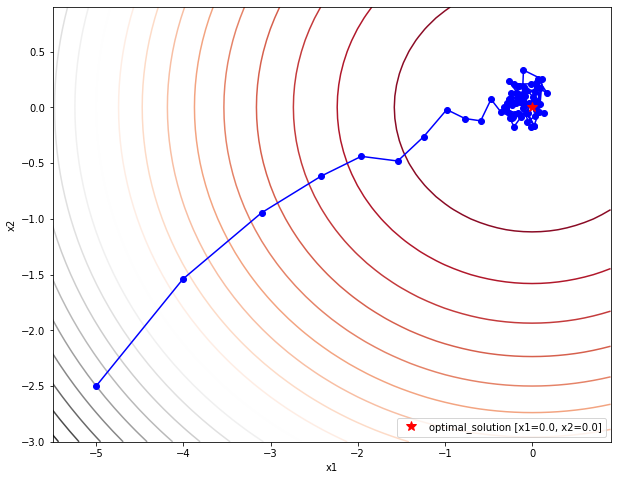

In [2]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
torch.manual_seed(1234) 


def f(x1, x2):
    return x1**2 + 2*x2**2


def sgd(x1, x2, f_grad):
    g1, g2 = f_grad(x1, x2)
    g1 += torch.normal(0.0, 1, (1,)) # Gradient with noise
    g2 += torch.normal(0.0, 1, (1,)) #Gradient with noise
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2)

def f_grad(x1, x2): 
    return 2 * x1, 4 * x2

def train(trainer,f_grad, steps=50):
    x1, x2 = -5, -2.5
    results = [(x1, x2)]
    for i in range(steps):
        x1, x2 = trainer(x1, x2, f_grad)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  
results = train(sgd, steps=70, f_grad=f_grad)

x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
fig, ax1 = plt.subplots(1, 1, figsize=(10,8))

ax1.contour(x1, x2, f(x1, x2),20, cmap='RdGy')
ax1.plot(*zip(*results), '-o', color='blue')
ax1.plot(0.0, 0.0, "r*",  markersize=10, label="optimal_solution [x1=0.0, x2=0.0]")
plt.legend(loc="lower right")
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')


# Exponential lerninag rate for an objective function

epoch 2500, x1: -0.793612, x2: -0.070806


Text(0, 0.5, 'x2')

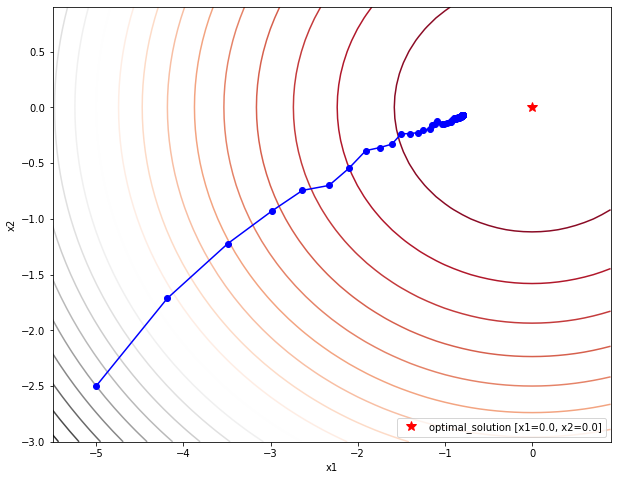

In [3]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
torch.manual_seed(1234) 


def f(x1, x2):
    return x1**2 + 2*x2**2


def sgd(x1, x2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,))
    g2 += torch.normal(0.0, 1, (1,))
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2)

def f_grad(x1, x2): 
    return 2 * x1, 4 * x2

def train_2d(trainer,f_grad, steps=50):
    x1, x2 = -5, -2.5
    results = [(x1, x2)]
    for i in range(steps):
        x1, x2 = trainer(x1, x2, f_grad)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def exponential_lr():
    global it
    it += 1
    return np.exp(-0.1 * it)
it =1
eta = 0.1
lr = exponential_lr  
results = train_2d(sgd, steps=2500, f_grad=f_grad)


x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))

ax1.contour(x1, x2, f(x1, x2),20, cmap='RdGy')
ax1.plot(*zip(*results), '-o', color='blue')
ax1.plot(0.0, 0.0, "r*",  markersize=10, label="optimal_solution [x1=0.0, x2=0.0]")
plt.legend(loc="lower right")
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')



# Polynomial lerninag rate for an objective function

epoch 25, x1: 0.000743, x2: 0.088306


Text(0, 0.5, 'x2')

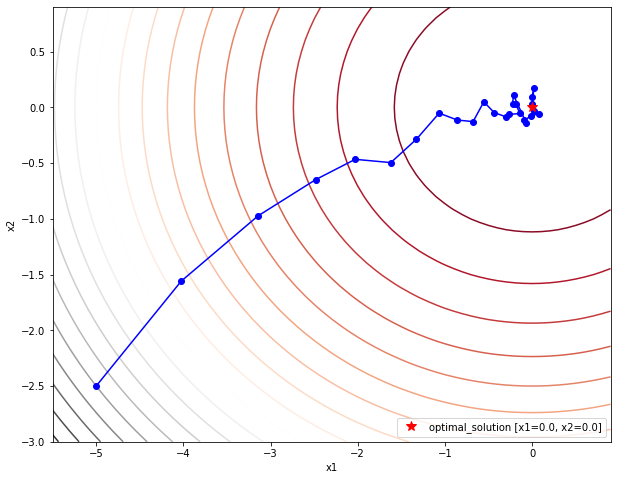

In [4]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
torch.manual_seed(1234) 


def f(x1, x2):
    return x1**2 + 2*x2**2


def sgd(x1, x2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,))
    g2 += torch.normal(0.0, 1, (1,))
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2)

def f_grad(x1, x2): 
    return 2 * x1, 4 * x2

def train_2d(trainer,f_grad, steps=50):
    x1, x2 = -5, -2.5
    results = [(x1, x2)]
    for i in range(steps):
        x1, x2 = trainer(x1, x2, f_grad)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results


def poly_lr():
    global it
    it += 1
    return (1 + 0.02 * it)**(-0.5)

it = 1
eta = 0.1
lr = poly_lr  
results = train_2d(sgd, steps=25, f_grad=f_grad)


x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))

ax1.contour(x1, x2, f(x1, x2),20, cmap='RdGy')
ax1.plot(*zip(*results), '-o', color='blue')
ax1.plot(0.0, 0.0, "r*",  markersize=10, label="optimal_solution [x1=0.0, x2=0.0]")
plt.legend(loc="lower right")
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')





In [58]:
!pip install scikit-learn


# Rate of change of learning rate for different schedulers

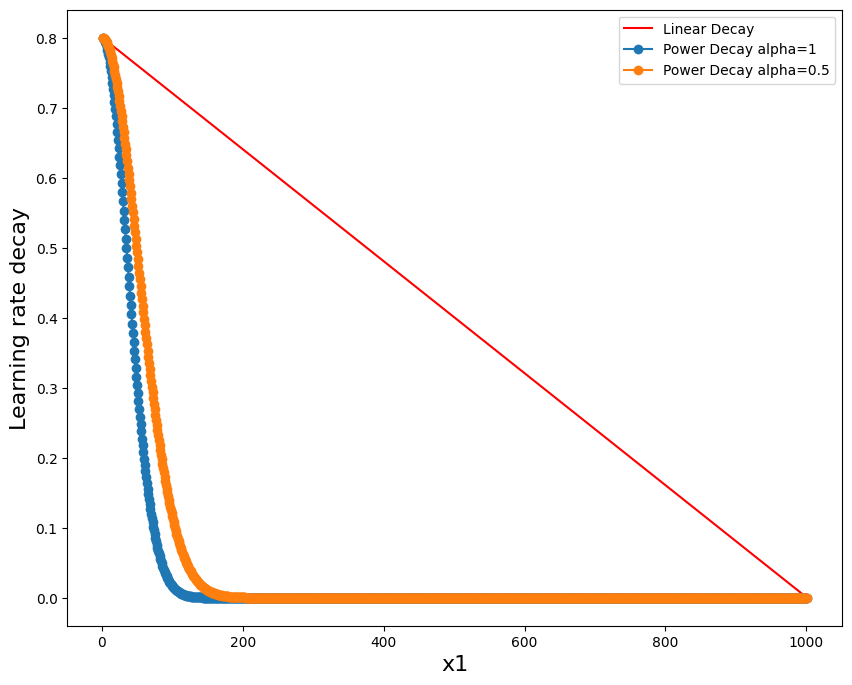

In [3]:
import numpy as np
import matplotlib.pyplot as plt
class lr_decay():
    def __init__(self, epochs, initial_lr, power):
        self.epochs = epochs
        self.initial_lr = initial_lr
        self.power = power
        
    def linear_decay(self, epoch):
        decay = (1 - (epoch / float(self.epochs))) 
        eta_updated = self.initial_lr * decay
        return float(eta_updated)
    
    def power_decay(self, epoch, lr, alpha):
        decay = self.initial_lr/float((self.epochs))        
        return float(lr * 1 / (1 + decay * epoch)**alpha)
    
    def power_deacay_hist(self, alpha=1):
        lr = self.initial_lr
        power_decay_list = []
        for ep in range(0, self.epochs + 1):
            lr = self.power_decay(ep, lr, alpha)
            power_decay_list.append(lr)
        return power_decay_list
        
    
    
initial_lr = 0.8
epochs = 1000
power=1
lr_sch = lr_decay(epochs, initial_lr, power)
lr_linear = np.array([lr_sch.linear_decay(ep) for ep in range(0, epochs + 1)])
lr_power_alpha_1 = lr_sch.power_deacay_hist(alpha=1)
lr_power_alpha_2 = lr_sch.power_deacay_hist(alpha=0.5)


ep_plot = np.arange(1,epochs+2,1)
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.plot(ep_plot, lr_linear, "-r", label="Linear Decay")
ax.plot(ep_plot, lr_power_alpha_1, "-o", label="Power Decay alpha=1")
ax.plot(ep_plot, lr_power_alpha_2, "-o", label="Power Decay alpha=0.5")

ax.set_xlabel('x1', fontsize=16)
ax.set_ylabel('Learning rate decay',fontsize=16)
ax.legend()
        
        

# Constant learning rate scheduler for DNN with function approxiamtion


In [5]:
### LR scheduler with Contsnat LR


import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
torch.manual_seed(1234) 

def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])

x_test_l = np.linspace(-np.pi, -1.0e-3, 301)
x_test_r = np.linspace(0., np.pi, 501)
x_test = np.concatenate((x_test_l, x_test_r), axis=0)
y_test = np.array([fun_x(i) for i in x_test])

ax1.plot(x_in, y_in, 'k-')
ax1.plot(x_in, y_in, '.b', label="Training Points")
ax1.set_xlabel('x', fontsize=32)
ax1.set_ylabel('y', fontsize=32)
ax1.legend()

x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()

x_test = torch.from_numpy(x_test.reshape(-1,1)).float()
y_test = torch.from_numpy(y_test.reshape(-1,1)).float()


loss_function = torch.nn.MSELoss()
Niter_Adam = 30000

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_adam = torch.optim.SGD(Net.parameters(), lr = 0.01)

train_loss_list = []
test_loss_list = []

acc_train = []
acc_test = []
x = Variable(x)
y = Variable(y)

# Implementation of Adam
print('Adam Optimization')
    
for it in range(Niter_Adam):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_adam.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_adam.step()    
    print(f"Epoch: {it + 1:02}/{Niter_Adam} Loss: {loss:.5e}")
    y_train_pred = Net(x)
    
    
    
    with torch.no_grad():
        y_test_pred = Net(x_test)
        test_loss = loss_function(y_test_pred, y_test)
        test_acuuracy = torch.linalg.norm(y_test-y_test_pred)/ (torch.norm(y_test_pred))
        ts_ac_val = test_acuuracy.numpy()
        train_acuuracy = torch.linalg.norm(y-y_train_pred)/ (torch.norm(y_train_pred))
        tr_ac_val = train_acuuracy.numpy()        
        train_loss_list.append(loss)
        test_loss_list.append(test_loss)
        acc_train.append(tr_ac_val)
        acc_test.append(ts_ac_val)
        
y_const_lr = y_pred.detach().numpy()        
            
    

FileNotFoundError: Could not find module 'C:\Users\ivandep\Anaconda3\envs\Torch\lib\site-packages\scipy\.libs\libbanded5x.CBCBXIAYFUWOYCSBXUA2BT6W76FYX4C7.gfortran-win_amd64.dll' (or one of its dependencies). Try using the full path with constructor syntax.

array([6.236484  , 2.3321812 , 1.2417325 , ..., 0.4435383 , 0.44350323,
       0.44352636], dtype=float32)

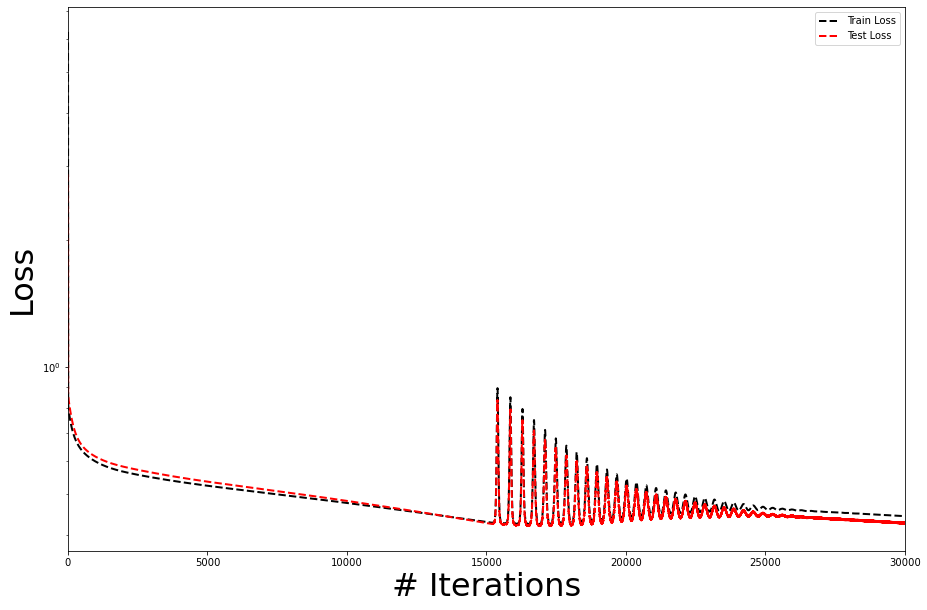

In [95]:
fig, ax = plt.subplots(figsize=(15,10))

ep = np.arange(0, Niter_Adam,1)


test_loss_np_clr = np.array([a.numpy() for a in test_loss_list])
train_loss_np_clr = np.array([a.detach().numpy() for a in train_loss_list])

ax.set_xlabel('# Iterations', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, Niter_Adam + 10)
ax.semilogy(ep, train_loss_np_clr, 'k--', lw=2,  label="Train Loss")
ax.semilogy(ep, test_loss_np_clr,  'r--', lw=2,  label="Test Loss")
plt.legend()


train_loss_np_clr

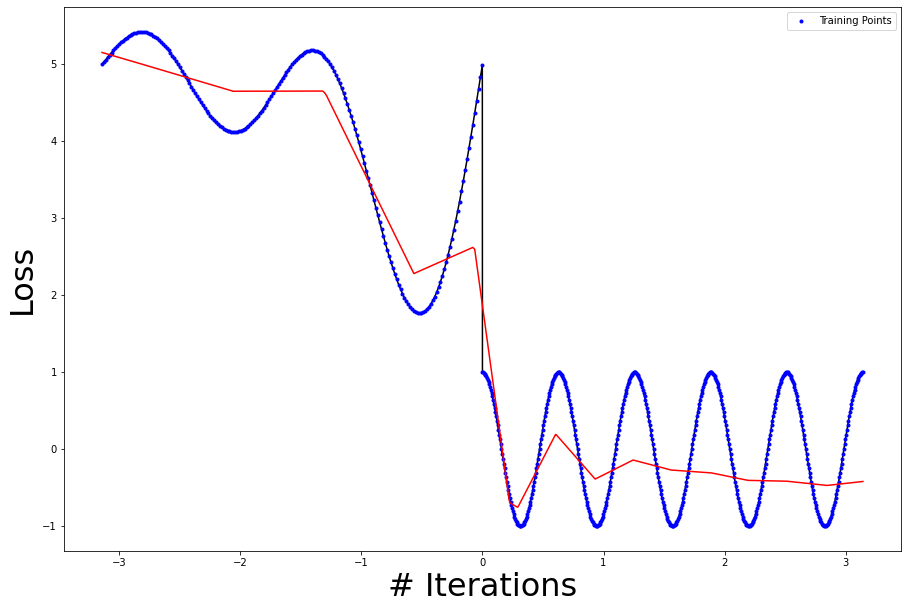

In [96]:
fig, ax = plt.subplots(figsize=(15,10))

ep = np.arange(0, Niter_Adam,1)

ax.set_xlabel('# Iterations', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.plot(x_in, y_in, 'k-')
ax.plot(x_in, y_in, '.b', label="Training Points")
ax.plot(x_in, y_const_lr, '-r')
plt.legend()




# Linear learning rate scheduler for DNN with function approxiamtion


In [6]:
### LR scheduler with Linear LR
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
torch.manual_seed(1234) 

def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])

x_test_l = np.linspace(-np.pi, -1.0e-3, 301)
x_test_r = np.linspace(0., np.pi, 501)
x_test = np.concatenate((x_test_l, x_test_r), axis=0)
y_test = np.array([fun_x(i) for i in x_test])


x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()

x_test = torch.from_numpy(x_test.reshape(-1,1)).float()
y_test = torch.from_numpy(y_test.reshape(-1,1)).float()


def lr_poly(base_lr, iter, max_iter, power):
    return base_lr*((1-float(iter)/max_iter)**(power)) 

lr_initial = 0.001


loss_function = torch.nn.MSELoss()
Niter_Adam = 30000

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer = SGD(Net.parameters(), lr = lr_intial)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, \
                                              lr_lambda=lambda it: lr_poly(lr_initial, it, Niter_Adam, 0.5))

train_loss_list = []
test_loss_list = []

acc_train = []
acc_test = []
x = Variable(x)
y = Variable(y)
lr_pow = []


    
for it in range(Niter_Adam):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer.step()    
    print(f"Epoch: {it + 1:02}/{Niter_Adam} Loss: {loss:.5e}")
    y_train_pred = Net(x)
    scheduler.step()
    lr_pow.append(optimizer.param_groups[0]['lr'])
    
    with torch.no_grad():
        y_test_pred = Net(x_test)
        test_loss = loss_function(y_test_pred, y_test)
        test_acuuracy = torch.linalg.norm(y_test-y_test_pred)/ (torch.norm(y_test_pred))
        ts_ac_val = test_acuuracy.numpy()
        train_acuuracy = torch.linalg.norm(y-y_train_pred)/ (torch.norm(y_train_pred))
        tr_ac_val = train_acuuracy.numpy()        
        train_loss_list.append(loss)
        test_loss_list.append(test_loss)
        acc_train.append(tr_ac_val)
        acc_test.append(ts_ac_val)
        
y_pow_lr = y_pred.detach().numpy()    

FileNotFoundError: Could not find module 'C:\Users\ivandep\Anaconda3\envs\Torch\lib\site-packages\scipy\.libs\libbanded5x.CBCBXIAYFUWOYCSBXUA2BT6W76FYX4C7.gfortran-win_amd64.dll' (or one of its dependencies). Try using the full path with constructor syntax.

[6.236484   2.3321812  1.2417325  ... 0.4435383  0.44350323 0.44352636]
[6.236484   5.7373004  5.284196   ... 0.56499636 0.5649963  0.5649963 ]


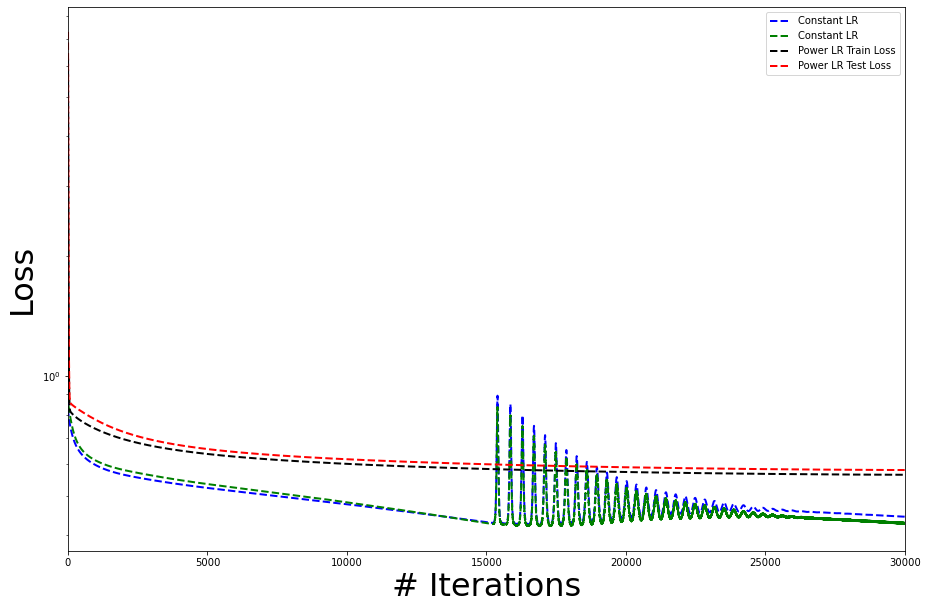

In [100]:
fig, ax = plt.subplots(figsize=(15,10))

ep = np.arange(0, Niter_Adam,1)


test_loss_np_plr = np.array([a.numpy() for a in test_loss_list])
train_loss_np_plr = np.array([a.detach().numpy() for a in train_loss_list])

ax.set_xlabel('# Iterations', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, Niter_Adam + 10)
ax.semilogy(ep, train_loss_np_clr, 'b--', lw=2,  label="Constant LR")
ax.semilogy(ep, test_loss_np_clr,  'g--', lw=2,  label="Constant LR")
ax.semilogy(ep, train_loss_np_plr, 'k--', lw=2,  label="Power LR Train Loss")
ax.semilogy(ep, test_loss_np_plr,  'r--', lw=2,  label="Power LR Test Loss")
plt.legend()

print(train_loss_np_clr)
print(train_loss_np_plr)

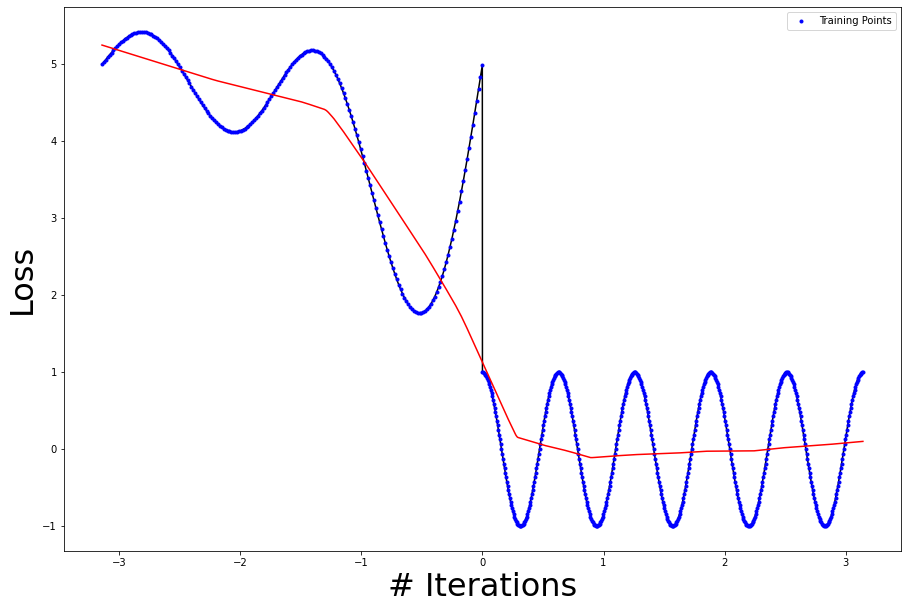

In [98]:
fig, ax = plt.subplots(figsize=(15,10))

ep = np.arange(0, Niter_Adam,1)

ax.set_xlabel('# Iterations', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.plot(x_in, y_in, 'k-')
ax.plot(x_in, y_in, '.b', label="Training Points")
ax.plot(x_in, y_pow_lr, '-r')
plt.legend()


Text(0, 0.5, 'Learning reat')

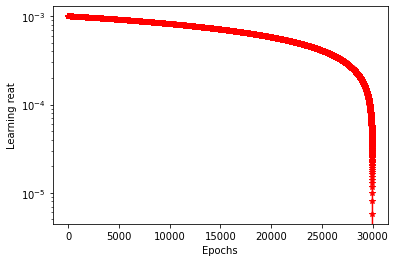

In [103]:
plt.semilogy(ep, lr_pow, "-*r")
plt.xlabel("Epochs")
plt.ylabel("Learning reat")

# 1-cycle learning rate scheduler for DNN with function approxiamtion


In [13]:
### LR scheduler with 1-Cycle Scheduler
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
torch.manual_seed(1234) 

def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f


x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])

x_test_l = np.linspace(-np.pi, -1.0e-3, 301)
x_test_r = np.linspace(0., np.pi, 501)
x_test = np.concatenate((x_test_l, x_test_r), axis=0)
y_test = np.array([fun_x(i) for i in x_test])


x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()

x_test = torch.from_numpy(x_test.reshape(-1,1)).float()
y_test = torch.from_numpy(y_test.reshape(-1,1)).float()

lr_initial = 0.01

loss_function = torch.nn.MSELoss()
Niter_Adam =  50

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer = SGD(Net.parameters(), lr = lr_initial)

scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0001,\
                        max_lr=0.001,step_size_up=3,mode="triangular")
train_loss_list = []
test_loss_list = []

acc_train = []
acc_test = []
x = Variable(x)
y = Variable(y)
lr_1cs = []


    
for it in range(Niter_Adam):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  
    optimizer.zero_grad()    
    loss.backward()
    optimizer.step()    
    print(f"Epoch: {it + 1:02}/{Niter_Adam} Loss: {loss:.5e}")
    y_train_pred = Net(x)
    scheduler.step()
    lr_1cs.append(optimizer.param_groups[0]['lr'])
    
    with torch.no_grad():
        y_test_pred = Net(x_test)
        test_loss = loss_function(y_test_pred, y_test)
        test_acuuracy = torch.linalg.norm(y_test-y_test_pred)/ (torch.norm(y_test_pred))
        ts_ac_val = test_acuuracy.numpy()
        train_acuuracy = torch.linalg.norm(y-y_train_pred)/ (torch.norm(y_train_pred))
        tr_ac_val = train_acuuracy.numpy()        
        train_loss_list.append(loss)
        test_loss_list.append(test_loss)
        acc_train.append(tr_ac_val)
        acc_test.append(ts_ac_val)
        
y_pow_lr = y_pred.detach().numpy() 

Epoch: 01/50 Loss: 6.23648e+00
Epoch: 02/50 Loss: 6.18548e+00
Epoch: 03/50 Loss: 5.81320e+00
Epoch: 04/50 Loss: 4.98755e+00
Epoch: 05/50 Loss: 3.79398e+00
Epoch: 06/50 Loss: 3.01849e+00
Epoch: 07/50 Loss: 2.60227e+00
Epoch: 08/50 Loss: 2.49827e+00
Epoch: 09/50 Loss: 2.10588e+00
Epoch: 10/50 Loss: 1.56131e+00
Epoch: 11/50 Loss: 1.07891e+00
Epoch: 12/50 Loss: 9.02951e-01
Epoch: 13/50 Loss: 8.50785e-01
Epoch: 14/50 Loss: 8.42510e-01
Epoch: 15/50 Loss: 8.24695e-01
Epoch: 16/50 Loss: 8.31807e-01
Epoch: 17/50 Loss: 8.86233e-01
Epoch: 18/50 Loss: 9.34714e-01
Epoch: 19/50 Loss: 9.58856e-01
Epoch: 20/50 Loss: 9.63238e-01
Epoch: 21/50 Loss: 9.73138e-01
Epoch: 22/50 Loss: 9.77400e-01
Epoch: 23/50 Loss: 9.67013e-01
Epoch: 24/50 Loss: 9.51256e-01
Epoch: 25/50 Loss: 9.38697e-01
Epoch: 26/50 Loss: 9.34773e-01
Epoch: 27/50 Loss: 9.17305e-01
Epoch: 28/50 Loss: 8.88164e-01
Epoch: 29/50 Loss: 8.54938e-01
Epoch: 30/50 Loss: 8.37534e-01
Epoch: 31/50 Loss: 8.29656e-01
Epoch: 32/50 Loss: 8.27898e-01
Epoch: 3

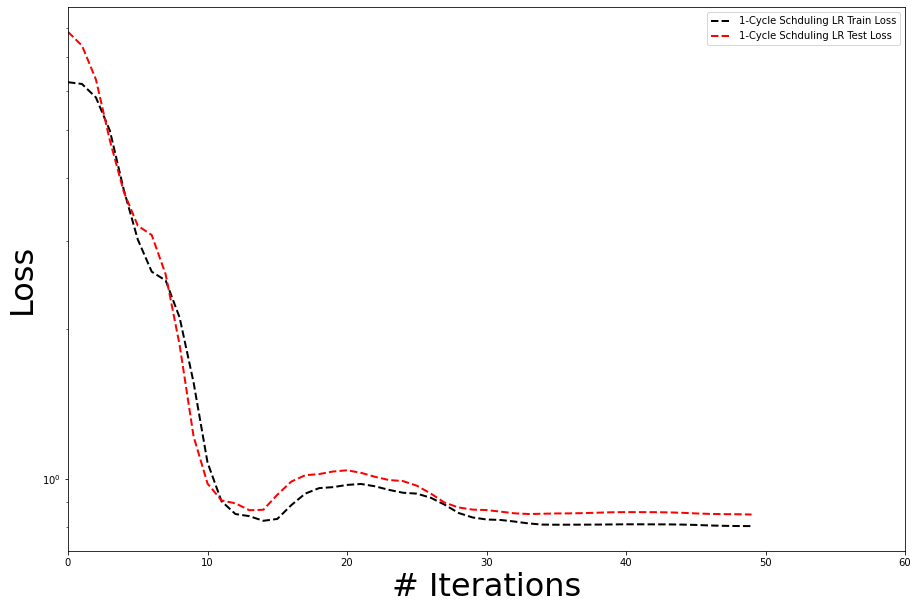

In [14]:
fig, ax = plt.subplots(figsize=(15,10))

ep = np.arange(0, Niter_Adam,1)


test_loss_np_plr = np.array([a.numpy() for a in test_loss_list])
train_loss_np_plr = np.array([a.detach().numpy() for a in train_loss_list])

ax.set_xlabel('# Iterations', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, Niter_Adam + 10)
ax.semilogy(ep, train_loss_np_plr, 'k--', lw=2,  label="1-Cycle Schduling LR Train Loss")
ax.semilogy(ep, test_loss_np_plr,  'r--', lw=2,  label="1-Cycle Schduling LR Test Loss")
plt.legend()



Text(0, 0.5, 'Learning rate')

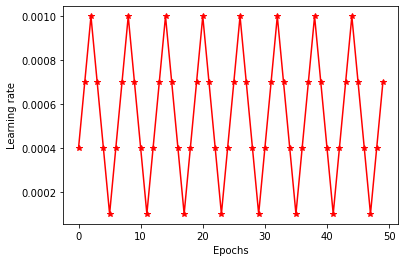

In [15]:
plt.plot(ep, lr_1cs, "-*r")
plt.xlabel("Epochs")
plt.ylabel("Learning rate")


In [2]:
!pip install -q -U tensorflow_addons

In [10]:
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Learning rate')

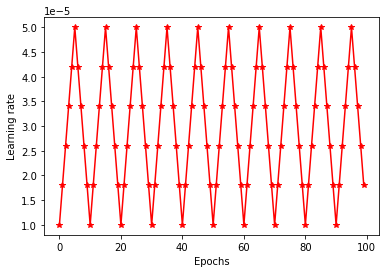

In [38]:
start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005 
rampup_epochs = 5
Nepoch = 100

clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=start_lr,
    maximal_learning_rate=max_lr,
    scale_fn=lambda x: 1,
    step_size=rampup_epochs)

ep = np.arange(0, Nepoch)
lr = clr(ep)
plt.plot(ep, lr, "-*r")
plt.xlabel("Epochs")
plt.ylabel("Learning rate")

In [22]:
import tensorflow as tf
opt = tf.optimizers.Adam(learning_rate = clr)

# $L_2$-regularizer for DNN with function approxiamtion


Adam Optimization
Epoch: 01/30000 Loss: 6.23648e+00
Epoch: 02/30000 Loss: 4.74661e+00
Epoch: 03/30000 Loss: 3.63475e+00
Epoch: 04/30000 Loss: 2.71238e+00
Epoch: 05/30000 Loss: 1.95380e+00
Epoch: 06/30000 Loss: 1.40702e+00
Epoch: 07/30000 Loss: 1.08114e+00
Epoch: 08/30000 Loss: 9.33896e-01
Epoch: 09/30000 Loss: 9.13887e-01
Epoch: 10/30000 Loss: 9.84420e-01
Epoch: 11/30000 Loss: 1.11078e+00
Epoch: 12/30000 Loss: 1.25021e+00
Epoch: 13/30000 Loss: 1.35681e+00
Epoch: 14/30000 Loss: 1.39948e+00
Epoch: 15/30000 Loss: 1.37426e+00
Epoch: 16/30000 Loss: 1.29869e+00
Epoch: 17/30000 Loss: 1.19746e+00
Epoch: 18/30000 Loss: 1.09109e+00
Epoch: 19/30000 Loss: 9.91572e-01
Epoch: 20/30000 Loss: 9.05470e-01
Epoch: 21/30000 Loss: 8.38483e-01
Epoch: 22/30000 Loss: 7.95933e-01
Epoch: 23/30000 Loss: 7.79582e-01
Epoch: 24/30000 Loss: 7.84787e-01
Epoch: 25/30000 Loss: 8.02151e-01
Epoch: 26/30000 Loss: 8.22878e-01
Epoch: 27/30000 Loss: 8.42374e-01
Epoch: 28/30000 Loss: 8.58965e-01
Epoch: 29/30000 Loss: 8.70485e

Epoch: 284/30000 Loss: 5.31363e-01
Epoch: 285/30000 Loss: 5.29439e-01
Epoch: 286/30000 Loss: 5.27970e-01
Epoch: 287/30000 Loss: 5.27831e-01
Epoch: 288/30000 Loss: 5.28087e-01
Epoch: 289/30000 Loss: 5.27509e-01
Epoch: 290/30000 Loss: 5.26057e-01
Epoch: 291/30000 Loss: 5.24870e-01
Epoch: 292/30000 Loss: 5.24487e-01
Epoch: 293/30000 Loss: 5.24382e-01
Epoch: 294/30000 Loss: 5.23810e-01
Epoch: 295/30000 Loss: 5.22742e-01
Epoch: 296/30000 Loss: 5.22045e-01
Epoch: 297/30000 Loss: 5.21553e-01
Epoch: 298/30000 Loss: 5.20943e-01
Epoch: 299/30000 Loss: 5.20995e-01
Epoch: 300/30000 Loss: 5.20119e-01
Epoch: 301/30000 Loss: 5.19593e-01
Epoch: 302/30000 Loss: 5.18799e-01
Epoch: 303/30000 Loss: 5.18461e-01
Epoch: 304/30000 Loss: 5.18093e-01
Epoch: 305/30000 Loss: 5.17749e-01
Epoch: 306/30000 Loss: 5.17283e-01
Epoch: 307/30000 Loss: 5.16677e-01
Epoch: 308/30000 Loss: 5.16118e-01
Epoch: 309/30000 Loss: 5.15535e-01
Epoch: 310/30000 Loss: 5.15165e-01
Epoch: 311/30000 Loss: 5.14699e-01
Epoch: 312/30000 Los

Epoch: 608/30000 Loss: 3.79867e-01
Epoch: 609/30000 Loss: 3.77816e-01
Epoch: 610/30000 Loss: 3.77137e-01
Epoch: 611/30000 Loss: 3.77975e-01
Epoch: 612/30000 Loss: 3.78590e-01
Epoch: 613/30000 Loss: 3.77849e-01
Epoch: 614/30000 Loss: 3.76503e-01
Epoch: 615/30000 Loss: 3.75887e-01
Epoch: 616/30000 Loss: 3.76224e-01
Epoch: 617/30000 Loss: 3.76602e-01
Epoch: 618/30000 Loss: 3.76233e-01
Epoch: 619/30000 Loss: 3.75353e-01
Epoch: 620/30000 Loss: 3.74713e-01
Epoch: 621/30000 Loss: 3.74642e-01
Epoch: 622/30000 Loss: 3.74817e-01
Epoch: 623/30000 Loss: 3.74731e-01
Epoch: 624/30000 Loss: 3.74249e-01
Epoch: 625/30000 Loss: 3.73679e-01
Epoch: 626/30000 Loss: 3.73294e-01
Epoch: 627/30000 Loss: 3.73180e-01
Epoch: 628/30000 Loss: 3.73162e-01
Epoch: 629/30000 Loss: 3.73021e-01
Epoch: 630/30000 Loss: 3.72677e-01
Epoch: 631/30000 Loss: 3.72238e-01
Epoch: 632/30000 Loss: 3.71882e-01
Epoch: 633/30000 Loss: 3.71659e-01
Epoch: 634/30000 Loss: 3.71523e-01
Epoch: 635/30000 Loss: 3.71380e-01
Epoch: 636/30000 Los

Epoch: 936/30000 Loss: 3.23713e-01
Epoch: 937/30000 Loss: 3.23643e-01
Epoch: 938/30000 Loss: 3.23439e-01
Epoch: 939/30000 Loss: 3.23137e-01
Epoch: 940/30000 Loss: 3.22789e-01
Epoch: 941/30000 Loss: 3.22456e-01
Epoch: 942/30000 Loss: 3.22144e-01
Epoch: 943/30000 Loss: 3.21875e-01
Epoch: 944/30000 Loss: 3.21655e-01
Epoch: 945/30000 Loss: 3.21493e-01
Epoch: 946/30000 Loss: 3.21389e-01
Epoch: 947/30000 Loss: 3.21329e-01
Epoch: 948/30000 Loss: 3.21295e-01
Epoch: 949/30000 Loss: 3.21275e-01
Epoch: 950/30000 Loss: 3.21257e-01
Epoch: 951/30000 Loss: 3.21234e-01
Epoch: 952/30000 Loss: 3.21207e-01
Epoch: 953/30000 Loss: 3.21186e-01
Epoch: 954/30000 Loss: 3.21185e-01
Epoch: 955/30000 Loss: 3.21213e-01
Epoch: 956/30000 Loss: 3.21278e-01
Epoch: 957/30000 Loss: 3.21390e-01
Epoch: 958/30000 Loss: 3.21557e-01
Epoch: 959/30000 Loss: 3.21799e-01
Epoch: 960/30000 Loss: 3.22139e-01
Epoch: 961/30000 Loss: 3.22621e-01
Epoch: 962/30000 Loss: 3.23294e-01
Epoch: 963/30000 Loss: 3.24203e-01
Epoch: 964/30000 Los

Epoch: 1269/30000 Loss: 2.98517e-01
Epoch: 1270/30000 Loss: 2.98614e-01
Epoch: 1271/30000 Loss: 2.98742e-01
Epoch: 1272/30000 Loss: 2.98893e-01
Epoch: 1273/30000 Loss: 2.99102e-01
Epoch: 1274/30000 Loss: 2.99352e-01
Epoch: 1275/30000 Loss: 2.99695e-01
Epoch: 1276/30000 Loss: 3.00117e-01
Epoch: 1277/30000 Loss: 3.00666e-01
Epoch: 1278/30000 Loss: 3.01293e-01
Epoch: 1279/30000 Loss: 3.02044e-01
Epoch: 1280/30000 Loss: 3.02797e-01
Epoch: 1281/30000 Loss: 3.03560e-01
Epoch: 1282/30000 Loss: 3.04159e-01
Epoch: 1283/30000 Loss: 3.04498e-01
Epoch: 1284/30000 Loss: 3.04363e-01
Epoch: 1285/30000 Loss: 3.03692e-01
Epoch: 1286/30000 Loss: 3.02406e-01
Epoch: 1287/30000 Loss: 3.00808e-01
Epoch: 1288/30000 Loss: 2.99171e-01
Epoch: 1289/30000 Loss: 2.97853e-01
Epoch: 1290/30000 Loss: 2.97007e-01
Epoch: 1291/30000 Loss: 2.96702e-01
Epoch: 1292/30000 Loss: 2.96844e-01
Epoch: 1293/30000 Loss: 2.97265e-01
Epoch: 1294/30000 Loss: 2.97797e-01
Epoch: 1295/30000 Loss: 2.98271e-01
Epoch: 1296/30000 Loss: 2.98

Epoch: 1618/30000 Loss: 2.85372e-01
Epoch: 1619/30000 Loss: 2.85257e-01
Epoch: 1620/30000 Loss: 2.85149e-01
Epoch: 1621/30000 Loss: 2.85062e-01
Epoch: 1622/30000 Loss: 2.84986e-01
Epoch: 1623/30000 Loss: 2.84923e-01
Epoch: 1624/30000 Loss: 2.84873e-01
Epoch: 1625/30000 Loss: 2.84833e-01
Epoch: 1626/30000 Loss: 2.84802e-01
Epoch: 1627/30000 Loss: 2.84775e-01
Epoch: 1628/30000 Loss: 2.84751e-01
Epoch: 1629/30000 Loss: 2.84730e-01
Epoch: 1630/30000 Loss: 2.84711e-01
Epoch: 1631/30000 Loss: 2.84695e-01
Epoch: 1632/30000 Loss: 2.84681e-01
Epoch: 1633/30000 Loss: 2.84670e-01
Epoch: 1634/30000 Loss: 2.84662e-01
Epoch: 1635/30000 Loss: 2.84658e-01
Epoch: 1636/30000 Loss: 2.84662e-01
Epoch: 1637/30000 Loss: 2.84675e-01
Epoch: 1638/30000 Loss: 2.84702e-01
Epoch: 1639/30000 Loss: 2.84749e-01
Epoch: 1640/30000 Loss: 2.84827e-01
Epoch: 1641/30000 Loss: 2.84951e-01
Epoch: 1642/30000 Loss: 2.85161e-01
Epoch: 1643/30000 Loss: 2.85481e-01
Epoch: 1644/30000 Loss: 2.85969e-01
Epoch: 1645/30000 Loss: 2.86

Epoch: 1965/30000 Loss: 2.86424e-01
Epoch: 1966/30000 Loss: 2.88745e-01
Epoch: 1967/30000 Loss: 2.87713e-01
Epoch: 1968/30000 Loss: 2.84183e-01
Epoch: 1969/30000 Loss: 2.80282e-01
Epoch: 1970/30000 Loss: 2.78221e-01
Epoch: 1971/30000 Loss: 2.78657e-01
Epoch: 1972/30000 Loss: 2.80645e-01
Epoch: 1973/30000 Loss: 2.82527e-01
Epoch: 1974/30000 Loss: 2.82978e-01
Epoch: 1975/30000 Loss: 2.81828e-01
Epoch: 1976/30000 Loss: 2.79900e-01
Epoch: 1977/30000 Loss: 2.78389e-01
Epoch: 1978/30000 Loss: 2.78033e-01
Epoch: 1979/30000 Loss: 2.78716e-01
Epoch: 1980/30000 Loss: 2.79718e-01
Epoch: 1981/30000 Loss: 2.80298e-01
Epoch: 1982/30000 Loss: 2.80119e-01
Epoch: 1983/30000 Loss: 2.79341e-01
Epoch: 1984/30000 Loss: 2.78477e-01
Epoch: 1985/30000 Loss: 2.77958e-01
Epoch: 1986/30000 Loss: 2.77961e-01
Epoch: 1987/30000 Loss: 2.78331e-01
Epoch: 1988/30000 Loss: 2.78747e-01
Epoch: 1989/30000 Loss: 2.78935e-01
Epoch: 1990/30000 Loss: 2.78805e-01
Epoch: 1991/30000 Loss: 2.78438e-01
Epoch: 1992/30000 Loss: 2.78

Epoch: 2315/30000 Loss: 2.73956e-01
Epoch: 2316/30000 Loss: 2.73949e-01
Epoch: 2317/30000 Loss: 2.73941e-01
Epoch: 2318/30000 Loss: 2.73935e-01
Epoch: 2319/30000 Loss: 2.73933e-01
Epoch: 2320/30000 Loss: 2.73934e-01
Epoch: 2321/30000 Loss: 2.73939e-01
Epoch: 2322/30000 Loss: 2.73947e-01
Epoch: 2323/30000 Loss: 2.73959e-01
Epoch: 2324/30000 Loss: 2.73979e-01
Epoch: 2325/30000 Loss: 2.74012e-01
Epoch: 2326/30000 Loss: 2.74059e-01
Epoch: 2327/30000 Loss: 2.74130e-01
Epoch: 2328/30000 Loss: 2.74226e-01
Epoch: 2329/30000 Loss: 2.74355e-01
Epoch: 2330/30000 Loss: 2.74528e-01
Epoch: 2331/30000 Loss: 2.74780e-01
Epoch: 2332/30000 Loss: 2.75126e-01
Epoch: 2333/30000 Loss: 2.75618e-01
Epoch: 2334/30000 Loss: 2.76296e-01
Epoch: 2335/30000 Loss: 2.77237e-01
Epoch: 2336/30000 Loss: 2.78506e-01
Epoch: 2337/30000 Loss: 2.80197e-01
Epoch: 2338/30000 Loss: 2.82369e-01
Epoch: 2339/30000 Loss: 2.85020e-01
Epoch: 2340/30000 Loss: 2.88070e-01
Epoch: 2341/30000 Loss: 2.91099e-01
Epoch: 2342/30000 Loss: 2.93

Epoch: 2646/30000 Loss: 2.71202e-01
Epoch: 2647/30000 Loss: 2.71155e-01
Epoch: 2648/30000 Loss: 2.71099e-01
Epoch: 2649/30000 Loss: 2.71064e-01
Epoch: 2650/30000 Loss: 2.71060e-01
Epoch: 2651/30000 Loss: 2.71076e-01
Epoch: 2652/30000 Loss: 2.71092e-01
Epoch: 2653/30000 Loss: 2.71090e-01
Epoch: 2654/30000 Loss: 2.71067e-01
Epoch: 2655/30000 Loss: 2.71034e-01
Epoch: 2656/30000 Loss: 2.71008e-01
Epoch: 2657/30000 Loss: 2.70996e-01
Epoch: 2658/30000 Loss: 2.70999e-01
Epoch: 2659/30000 Loss: 2.71006e-01
Epoch: 2660/30000 Loss: 2.71007e-01
Epoch: 2661/30000 Loss: 2.70997e-01
Epoch: 2662/30000 Loss: 2.70978e-01
Epoch: 2663/30000 Loss: 2.70957e-01
Epoch: 2664/30000 Loss: 2.70942e-01
Epoch: 2665/30000 Loss: 2.70936e-01
Epoch: 2666/30000 Loss: 2.70934e-01
Epoch: 2667/30000 Loss: 2.70934e-01
Epoch: 2668/30000 Loss: 2.70929e-01
Epoch: 2669/30000 Loss: 2.70920e-01
Epoch: 2670/30000 Loss: 2.70907e-01
Epoch: 2671/30000 Loss: 2.70894e-01
Epoch: 2672/30000 Loss: 2.70883e-01
Epoch: 2673/30000 Loss: 2.70

Epoch: 2988/30000 Loss: 2.68857e-01
Epoch: 2989/30000 Loss: 2.68856e-01
Epoch: 2990/30000 Loss: 2.68857e-01
Epoch: 2991/30000 Loss: 2.68859e-01
Epoch: 2992/30000 Loss: 2.68865e-01
Epoch: 2993/30000 Loss: 2.68875e-01
Epoch: 2994/30000 Loss: 2.68890e-01
Epoch: 2995/30000 Loss: 2.68913e-01
Epoch: 2996/30000 Loss: 2.68947e-01
Epoch: 2997/30000 Loss: 2.68997e-01
Epoch: 2998/30000 Loss: 2.69068e-01
Epoch: 2999/30000 Loss: 2.69166e-01
Epoch: 3000/30000 Loss: 2.69304e-01
Epoch: 3001/30000 Loss: 2.69500e-01
Epoch: 3002/30000 Loss: 2.69781e-01
Epoch: 3003/30000 Loss: 2.70191e-01
Epoch: 3004/30000 Loss: 2.70776e-01
Epoch: 3005/30000 Loss: 2.71625e-01
Epoch: 3006/30000 Loss: 2.72835e-01
Epoch: 3007/30000 Loss: 2.74572e-01
Epoch: 3008/30000 Loss: 2.77048e-01
Epoch: 3009/30000 Loss: 2.80472e-01
Epoch: 3010/30000 Loss: 2.84953e-01
Epoch: 3011/30000 Loss: 2.90414e-01
Epoch: 3012/30000 Loss: 2.96135e-01
Epoch: 3013/30000 Loss: 3.00770e-01
Epoch: 3014/30000 Loss: 3.02152e-01
Epoch: 3015/30000 Loss: 2.98

Epoch: 3322/30000 Loss: 2.67395e-01
Epoch: 3323/30000 Loss: 2.67169e-01
Epoch: 3324/30000 Loss: 2.67106e-01
Epoch: 3325/30000 Loss: 2.67211e-01
Epoch: 3326/30000 Loss: 2.67347e-01
Epoch: 3327/30000 Loss: 2.67377e-01
Epoch: 3328/30000 Loss: 2.67280e-01
Epoch: 3329/30000 Loss: 2.67142e-01
Epoch: 3330/30000 Loss: 2.67068e-01
Epoch: 3331/30000 Loss: 2.67091e-01
Epoch: 3332/30000 Loss: 2.67161e-01
Epoch: 3333/30000 Loss: 2.67204e-01
Epoch: 3334/30000 Loss: 2.67182e-01
Epoch: 3335/30000 Loss: 2.67118e-01
Epoch: 3336/30000 Loss: 2.67058e-01
Epoch: 3337/30000 Loss: 2.67037e-01
Epoch: 3338/30000 Loss: 2.67053e-01
Epoch: 3339/30000 Loss: 2.67081e-01
Epoch: 3340/30000 Loss: 2.67093e-01
Epoch: 3341/30000 Loss: 2.67079e-01
Epoch: 3342/30000 Loss: 2.67047e-01
Epoch: 3343/30000 Loss: 2.67016e-01
Epoch: 3344/30000 Loss: 2.67001e-01
Epoch: 3345/30000 Loss: 2.67003e-01
Epoch: 3346/30000 Loss: 2.67013e-01
Epoch: 3347/30000 Loss: 2.67019e-01
Epoch: 3348/30000 Loss: 2.67013e-01
Epoch: 3349/30000 Loss: 2.66

Epoch: 3648/30000 Loss: 2.68497e-01
Epoch: 3649/30000 Loss: 2.68218e-01
Epoch: 3650/30000 Loss: 2.67593e-01
Epoch: 3651/30000 Loss: 2.66848e-01
Epoch: 3652/30000 Loss: 2.66211e-01
Epoch: 3653/30000 Loss: 2.65836e-01
Epoch: 3654/30000 Loss: 2.65773e-01
Epoch: 3655/30000 Loss: 2.65973e-01
Epoch: 3656/30000 Loss: 2.66305e-01
Epoch: 3657/30000 Loss: 2.66612e-01
Epoch: 3658/30000 Loss: 2.66763e-01
Epoch: 3659/30000 Loss: 2.66697e-01
Epoch: 3660/30000 Loss: 2.66447e-01
Epoch: 3661/30000 Loss: 2.66109e-01
Epoch: 3662/30000 Loss: 2.65806e-01
Epoch: 3663/30000 Loss: 2.65622e-01
Epoch: 3664/30000 Loss: 2.65583e-01
Epoch: 3665/30000 Loss: 2.65656e-01
Epoch: 3666/30000 Loss: 2.65779e-01
Epoch: 3667/30000 Loss: 2.65892e-01
Epoch: 3668/30000 Loss: 2.65956e-01
Epoch: 3669/30000 Loss: 2.65960e-01
Epoch: 3670/30000 Loss: 2.65917e-01
Epoch: 3671/30000 Loss: 2.65845e-01
Epoch: 3672/30000 Loss: 2.65765e-01
Epoch: 3673/30000 Loss: 2.65686e-01
Epoch: 3674/30000 Loss: 2.65621e-01
Epoch: 3675/30000 Loss: 2.65

Epoch: 3983/30000 Loss: 2.65051e-01
Epoch: 3984/30000 Loss: 2.64779e-01
Epoch: 3985/30000 Loss: 2.64530e-01
Epoch: 3986/30000 Loss: 2.64391e-01
Epoch: 3987/30000 Loss: 2.64386e-01
Epoch: 3988/30000 Loss: 2.64478e-01
Epoch: 3989/30000 Loss: 2.64601e-01
Epoch: 3990/30000 Loss: 2.64694e-01
Epoch: 3991/30000 Loss: 2.64718e-01
Epoch: 3992/30000 Loss: 2.64671e-01
Epoch: 3993/30000 Loss: 2.64578e-01
Epoch: 3994/30000 Loss: 2.64474e-01
Epoch: 3995/30000 Loss: 2.64390e-01
Epoch: 3996/30000 Loss: 2.64345e-01
Epoch: 3997/30000 Loss: 2.64343e-01
Epoch: 3998/30000 Loss: 2.64370e-01
Epoch: 3999/30000 Loss: 2.64410e-01
Epoch: 4000/30000 Loss: 2.64446e-01
Epoch: 4001/30000 Loss: 2.64463e-01
Epoch: 4002/30000 Loss: 2.64457e-01
Epoch: 4003/30000 Loss: 2.64432e-01
Epoch: 4004/30000 Loss: 2.64394e-01
Epoch: 4005/30000 Loss: 2.64355e-01
Epoch: 4006/30000 Loss: 2.64322e-01
Epoch: 4007/30000 Loss: 2.64302e-01
Epoch: 4008/30000 Loss: 2.64296e-01
Epoch: 4009/30000 Loss: 2.64299e-01
Epoch: 4010/30000 Loss: 2.64

Epoch: 4327/30000 Loss: 2.86262e-01
Epoch: 4328/30000 Loss: 2.76186e-01
Epoch: 4329/30000 Loss: 2.67623e-01
Epoch: 4330/30000 Loss: 2.63547e-01
Epoch: 4331/30000 Loss: 2.64572e-01
Epoch: 4332/30000 Loss: 2.68853e-01
Epoch: 4333/30000 Loss: 2.73340e-01
Epoch: 4334/30000 Loss: 2.75499e-01
Epoch: 4335/30000 Loss: 2.74241e-01
Epoch: 4336/30000 Loss: 2.70417e-01
Epoch: 4337/30000 Loss: 2.66173e-01
Epoch: 4338/30000 Loss: 2.63593e-01
Epoch: 4339/30000 Loss: 2.63517e-01
Epoch: 4340/30000 Loss: 2.65275e-01
Epoch: 4341/30000 Loss: 2.67369e-01
Epoch: 4342/30000 Loss: 2.68427e-01
Epoch: 4343/30000 Loss: 2.67932e-01
Epoch: 4344/30000 Loss: 2.66302e-01
Epoch: 4345/30000 Loss: 2.64513e-01
Epoch: 4346/30000 Loss: 2.63443e-01
Epoch: 4347/30000 Loss: 2.63414e-01
Epoch: 4348/30000 Loss: 2.64137e-01
Epoch: 4349/30000 Loss: 2.65005e-01
Epoch: 4350/30000 Loss: 2.65471e-01
Epoch: 4351/30000 Loss: 2.65306e-01
Epoch: 4352/30000 Loss: 2.64659e-01
Epoch: 4353/30000 Loss: 2.63887e-01
Epoch: 4354/30000 Loss: 2.63

Epoch: 4663/30000 Loss: 2.62348e-01
Epoch: 4664/30000 Loss: 2.62355e-01
Epoch: 4665/30000 Loss: 2.62366e-01
Epoch: 4666/30000 Loss: 2.62380e-01
Epoch: 4667/30000 Loss: 2.62400e-01
Epoch: 4668/30000 Loss: 2.62426e-01
Epoch: 4669/30000 Loss: 2.62459e-01
Epoch: 4670/30000 Loss: 2.62501e-01
Epoch: 4671/30000 Loss: 2.62558e-01
Epoch: 4672/30000 Loss: 2.62632e-01
Epoch: 4673/30000 Loss: 2.62733e-01
Epoch: 4674/30000 Loss: 2.62866e-01
Epoch: 4675/30000 Loss: 2.63049e-01
Epoch: 4676/30000 Loss: 2.63299e-01
Epoch: 4677/30000 Loss: 2.63636e-01
Epoch: 4678/30000 Loss: 2.64099e-01
Epoch: 4679/30000 Loss: 2.64733e-01
Epoch: 4680/30000 Loss: 2.65603e-01
Epoch: 4681/30000 Loss: 2.66782e-01
Epoch: 4682/30000 Loss: 2.68363e-01
Epoch: 4683/30000 Loss: 2.70460e-01
Epoch: 4684/30000 Loss: 2.73072e-01
Epoch: 4685/30000 Loss: 2.76278e-01
Epoch: 4686/30000 Loss: 2.79822e-01
Epoch: 4687/30000 Loss: 2.83416e-01
Epoch: 4688/30000 Loss: 2.86231e-01
Epoch: 4689/30000 Loss: 2.87421e-01
Epoch: 4690/30000 Loss: 2.85

Epoch: 5003/30000 Loss: 2.61790e-01
Epoch: 5004/30000 Loss: 2.61917e-01
Epoch: 5005/30000 Loss: 2.62093e-01
Epoch: 5006/30000 Loss: 2.62338e-01
Epoch: 5007/30000 Loss: 2.62682e-01
Epoch: 5008/30000 Loss: 2.63166e-01
Epoch: 5009/30000 Loss: 2.63849e-01
Epoch: 5010/30000 Loss: 2.64821e-01
Epoch: 5011/30000 Loss: 2.66168e-01
Epoch: 5012/30000 Loss: 2.68039e-01
Epoch: 5013/30000 Loss: 2.70573e-01
Epoch: 5014/30000 Loss: 2.73916e-01
Epoch: 5015/30000 Loss: 2.78093e-01
Epoch: 5016/30000 Loss: 2.82944e-01
Epoch: 5017/30000 Loss: 2.87695e-01
Epoch: 5018/30000 Loss: 2.91389e-01
Epoch: 5019/30000 Loss: 2.92383e-01
Epoch: 5020/30000 Loss: 2.89658e-01
Epoch: 5021/30000 Loss: 2.82977e-01
Epoch: 5022/30000 Loss: 2.74287e-01
Epoch: 5023/30000 Loss: 2.66471e-01
Epoch: 5024/30000 Loss: 2.62031e-01
Epoch: 5025/30000 Loss: 2.61773e-01
Epoch: 5026/30000 Loss: 2.64657e-01
Epoch: 5027/30000 Loss: 2.68591e-01
Epoch: 5028/30000 Loss: 2.71435e-01
Epoch: 5029/30000 Loss: 2.71877e-01
Epoch: 5030/30000 Loss: 2.69

Epoch: 5332/30000 Loss: 2.62279e-01
Epoch: 5333/30000 Loss: 2.63079e-01
Epoch: 5334/30000 Loss: 2.63441e-01
Epoch: 5335/30000 Loss: 2.63268e-01
Epoch: 5336/30000 Loss: 2.62663e-01
Epoch: 5337/30000 Loss: 2.61876e-01
Epoch: 5338/30000 Loss: 2.61168e-01
Epoch: 5339/30000 Loss: 2.60733e-01
Epoch: 5340/30000 Loss: 2.60632e-01
Epoch: 5341/30000 Loss: 2.60801e-01
Epoch: 5342/30000 Loss: 2.61107e-01
Epoch: 5343/30000 Loss: 2.61404e-01
Epoch: 5344/30000 Loss: 2.61585e-01
Epoch: 5345/30000 Loss: 2.61609e-01
Epoch: 5346/30000 Loss: 2.61486e-01
Epoch: 5347/30000 Loss: 2.61270e-01
Epoch: 5348/30000 Loss: 2.61025e-01
Epoch: 5349/30000 Loss: 2.60810e-01
Epoch: 5350/30000 Loss: 2.60667e-01
Epoch: 5351/30000 Loss: 2.60609e-01
Epoch: 5352/30000 Loss: 2.60627e-01
Epoch: 5353/30000 Loss: 2.60696e-01
Epoch: 5354/30000 Loss: 2.60788e-01
Epoch: 5355/30000 Loss: 2.60871e-01
Epoch: 5356/30000 Loss: 2.60926e-01
Epoch: 5357/30000 Loss: 2.60941e-01
Epoch: 5358/30000 Loss: 2.60919e-01
Epoch: 5359/30000 Loss: 2.60

Epoch: 5671/30000 Loss: 2.77384e-01
Epoch: 5672/30000 Loss: 2.82942e-01
Epoch: 5673/30000 Loss: 2.88798e-01
Epoch: 5674/30000 Loss: 2.93766e-01
Epoch: 5675/30000 Loss: 2.95896e-01
Epoch: 5676/30000 Loss: 2.93551e-01
Epoch: 5677/30000 Loss: 2.86209e-01
Epoch: 5678/30000 Loss: 2.75837e-01
Epoch: 5679/30000 Loss: 2.66158e-01
Epoch: 5680/30000 Loss: 2.60654e-01
Epoch: 5681/30000 Loss: 2.60582e-01
Epoch: 5682/30000 Loss: 2.64491e-01
Epoch: 5683/30000 Loss: 2.69408e-01
Epoch: 5684/30000 Loss: 2.72436e-01
Epoch: 5685/30000 Loss: 2.72056e-01
Epoch: 5686/30000 Loss: 2.68606e-01
Epoch: 5687/30000 Loss: 2.64068e-01
Epoch: 5688/30000 Loss: 2.60750e-01
Epoch: 5689/30000 Loss: 2.59942e-01
Epoch: 5690/30000 Loss: 2.61370e-01
Epoch: 5691/30000 Loss: 2.63645e-01
Epoch: 5692/30000 Loss: 2.65230e-01
Epoch: 5693/30000 Loss: 2.65246e-01
Epoch: 5694/30000 Loss: 2.63815e-01
Epoch: 5695/30000 Loss: 2.61833e-01
Epoch: 5696/30000 Loss: 2.60335e-01
Epoch: 5697/30000 Loss: 2.59920e-01
Epoch: 5698/30000 Loss: 2.60

Epoch: 5997/30000 Loss: 2.70634e-01
Epoch: 5998/30000 Loss: 2.72314e-01
Epoch: 5999/30000 Loss: 2.70438e-01
Epoch: 6000/30000 Loss: 2.66181e-01
Epoch: 6001/30000 Loss: 2.61862e-01
Epoch: 6002/30000 Loss: 2.59524e-01
Epoch: 6003/30000 Loss: 2.59800e-01
Epoch: 6004/30000 Loss: 2.61824e-01
Epoch: 6005/30000 Loss: 2.63996e-01
Epoch: 6006/30000 Loss: 2.64964e-01
Epoch: 6007/30000 Loss: 2.64277e-01
Epoch: 6008/30000 Loss: 2.62433e-01
Epoch: 6009/30000 Loss: 2.60507e-01
Epoch: 6010/30000 Loss: 2.59424e-01
Epoch: 6011/30000 Loss: 2.59506e-01
Epoch: 6012/30000 Loss: 2.60388e-01
Epoch: 6013/30000 Loss: 2.61356e-01
Epoch: 6014/30000 Loss: 2.61826e-01
Epoch: 6015/30000 Loss: 2.61562e-01
Epoch: 6016/30000 Loss: 2.60789e-01
Epoch: 6017/30000 Loss: 2.59932e-01
Epoch: 6018/30000 Loss: 2.59397e-01
Epoch: 6019/30000 Loss: 2.59342e-01
Epoch: 6020/30000 Loss: 2.59658e-01
Epoch: 6021/30000 Loss: 2.60089e-01
Epoch: 6022/30000 Loss: 2.60366e-01
Epoch: 6023/30000 Loss: 2.60366e-01
Epoch: 6024/30000 Loss: 2.60

Epoch: 6326/30000 Loss: 2.58816e-01
Epoch: 6327/30000 Loss: 2.58803e-01
Epoch: 6328/30000 Loss: 2.58792e-01
Epoch: 6329/30000 Loss: 2.58786e-01
Epoch: 6330/30000 Loss: 2.58785e-01
Epoch: 6331/30000 Loss: 2.58787e-01
Epoch: 6332/30000 Loss: 2.58791e-01
Epoch: 6333/30000 Loss: 2.58794e-01
Epoch: 6334/30000 Loss: 2.58796e-01
Epoch: 6335/30000 Loss: 2.58795e-01
Epoch: 6336/30000 Loss: 2.58791e-01
Epoch: 6337/30000 Loss: 2.58785e-01
Epoch: 6338/30000 Loss: 2.58778e-01
Epoch: 6339/30000 Loss: 2.58772e-01
Epoch: 6340/30000 Loss: 2.58768e-01
Epoch: 6341/30000 Loss: 2.58767e-01
Epoch: 6342/30000 Loss: 2.58766e-01
Epoch: 6343/30000 Loss: 2.58766e-01
Epoch: 6344/30000 Loss: 2.58764e-01
Epoch: 6345/30000 Loss: 2.58763e-01
Epoch: 6346/30000 Loss: 2.58760e-01
Epoch: 6347/30000 Loss: 2.58758e-01
Epoch: 6348/30000 Loss: 2.58756e-01
Epoch: 6349/30000 Loss: 2.58753e-01
Epoch: 6350/30000 Loss: 2.58751e-01
Epoch: 6351/30000 Loss: 2.58749e-01
Epoch: 6352/30000 Loss: 2.58747e-01
Epoch: 6353/30000 Loss: 2.58

Epoch: 6650/30000 Loss: 2.46495e-01
Epoch: 6651/30000 Loss: 2.46521e-01
Epoch: 6652/30000 Loss: 2.46926e-01
Epoch: 6653/30000 Loss: 2.48153e-01
Epoch: 6654/30000 Loss: 2.50458e-01
Epoch: 6655/30000 Loss: 2.54245e-01
Epoch: 6656/30000 Loss: 2.58830e-01
Epoch: 6657/30000 Loss: 2.63278e-01
Epoch: 6658/30000 Loss: 2.65078e-01
Epoch: 6659/30000 Loss: 2.63658e-01
Epoch: 6660/30000 Loss: 2.60267e-01
Epoch: 6661/30000 Loss: 2.58205e-01
Epoch: 6662/30000 Loss: 2.58787e-01
Epoch: 6663/30000 Loss: 2.59937e-01
Epoch: 6664/30000 Loss: 2.58487e-01
Epoch: 6665/30000 Loss: 2.53413e-01
Epoch: 6666/30000 Loss: 2.46901e-01
Epoch: 6667/30000 Loss: 2.42485e-01
Epoch: 6668/30000 Loss: 2.42098e-01
Epoch: 6669/30000 Loss: 2.44799e-01
Epoch: 6670/30000 Loss: 2.47935e-01
Epoch: 6671/30000 Loss: 2.49111e-01
Epoch: 6672/30000 Loss: 2.47632e-01
Epoch: 6673/30000 Loss: 2.44602e-01
Epoch: 6674/30000 Loss: 2.41884e-01
Epoch: 6675/30000 Loss: 2.40750e-01
Epoch: 6676/30000 Loss: 2.41168e-01
Epoch: 6677/30000 Loss: 2.42

Epoch: 6974/30000 Loss: 2.13472e-01
Epoch: 6975/30000 Loss: 2.12891e-01
Epoch: 6976/30000 Loss: 2.12309e-01
Epoch: 6977/30000 Loss: 2.11834e-01
Epoch: 6978/30000 Loss: 2.11535e-01
Epoch: 6979/30000 Loss: 2.11427e-01
Epoch: 6980/30000 Loss: 2.11476e-01
Epoch: 6981/30000 Loss: 2.11623e-01
Epoch: 6982/30000 Loss: 2.11801e-01
Epoch: 6983/30000 Loss: 2.11954e-01
Epoch: 6984/30000 Loss: 2.12038e-01
Epoch: 6985/30000 Loss: 2.12042e-01
Epoch: 6986/30000 Loss: 2.11963e-01
Epoch: 6987/30000 Loss: 2.11826e-01
Epoch: 6988/30000 Loss: 2.11650e-01
Epoch: 6989/30000 Loss: 2.11466e-01
Epoch: 6990/30000 Loss: 2.11290e-01
Epoch: 6991/30000 Loss: 2.11136e-01
Epoch: 6992/30000 Loss: 2.11011e-01
Epoch: 6993/30000 Loss: 2.10914e-01
Epoch: 6994/30000 Loss: 2.10841e-01
Epoch: 6995/30000 Loss: 2.10791e-01
Epoch: 6996/30000 Loss: 2.10759e-01
Epoch: 6997/30000 Loss: 2.10740e-01
Epoch: 6998/30000 Loss: 2.10730e-01
Epoch: 6999/30000 Loss: 2.10727e-01
Epoch: 7000/30000 Loss: 2.10731e-01
Epoch: 7001/30000 Loss: 2.10

Epoch: 7305/30000 Loss: 1.97542e-01
Epoch: 7306/30000 Loss: 1.97498e-01
Epoch: 7307/30000 Loss: 1.97471e-01
Epoch: 7308/30000 Loss: 1.97452e-01
Epoch: 7309/30000 Loss: 1.97430e-01
Epoch: 7310/30000 Loss: 1.97401e-01
Epoch: 7311/30000 Loss: 1.97362e-01
Epoch: 7312/30000 Loss: 1.97317e-01
Epoch: 7313/30000 Loss: 1.97270e-01
Epoch: 7314/30000 Loss: 1.97226e-01
Epoch: 7315/30000 Loss: 1.97187e-01
Epoch: 7316/30000 Loss: 1.97153e-01
Epoch: 7317/30000 Loss: 1.97124e-01
Epoch: 7318/30000 Loss: 1.97097e-01
Epoch: 7319/30000 Loss: 1.97067e-01
Epoch: 7320/30000 Loss: 1.97033e-01
Epoch: 7321/30000 Loss: 1.96998e-01
Epoch: 7322/30000 Loss: 1.96960e-01
Epoch: 7323/30000 Loss: 1.96920e-01
Epoch: 7324/30000 Loss: 1.96880e-01
Epoch: 7325/30000 Loss: 1.96841e-01
Epoch: 7326/30000 Loss: 1.96807e-01
Epoch: 7327/30000 Loss: 1.96776e-01
Epoch: 7328/30000 Loss: 1.96748e-01
Epoch: 7329/30000 Loss: 1.96720e-01
Epoch: 7330/30000 Loss: 1.96693e-01
Epoch: 7331/30000 Loss: 1.96666e-01
Epoch: 7332/30000 Loss: 1.96

Epoch: 7637/30000 Loss: 1.89956e-01
Epoch: 7638/30000 Loss: 1.89414e-01
Epoch: 7639/30000 Loss: 1.88985e-01
Epoch: 7640/30000 Loss: 1.88685e-01
Epoch: 7641/30000 Loss: 1.88514e-01
Epoch: 7642/30000 Loss: 1.88440e-01
Epoch: 7643/30000 Loss: 1.88435e-01
Epoch: 7644/30000 Loss: 1.88474e-01
Epoch: 7645/30000 Loss: 1.88536e-01
Epoch: 7646/30000 Loss: 1.88605e-01
Epoch: 7647/30000 Loss: 1.88675e-01
Epoch: 7648/30000 Loss: 1.88749e-01
Epoch: 7649/30000 Loss: 1.88823e-01
Epoch: 7650/30000 Loss: 1.88900e-01
Epoch: 7651/30000 Loss: 1.88977e-01
Epoch: 7652/30000 Loss: 1.89059e-01
Epoch: 7653/30000 Loss: 1.89141e-01
Epoch: 7654/30000 Loss: 1.89233e-01
Epoch: 7655/30000 Loss: 1.89330e-01
Epoch: 7656/30000 Loss: 1.89445e-01
Epoch: 7657/30000 Loss: 1.89573e-01
Epoch: 7658/30000 Loss: 1.89731e-01
Epoch: 7659/30000 Loss: 1.89911e-01
Epoch: 7660/30000 Loss: 1.90144e-01
Epoch: 7661/30000 Loss: 1.90414e-01
Epoch: 7662/30000 Loss: 1.90738e-01
Epoch: 7663/30000 Loss: 1.91118e-01
Epoch: 7664/30000 Loss: 1.91

Epoch: 7959/30000 Loss: 1.82336e-01
Epoch: 7960/30000 Loss: 1.82346e-01
Epoch: 7961/30000 Loss: 1.82370e-01
Epoch: 7962/30000 Loss: 1.82406e-01
Epoch: 7963/30000 Loss: 1.82455e-01
Epoch: 7964/30000 Loss: 1.82519e-01
Epoch: 7965/30000 Loss: 1.82606e-01
Epoch: 7966/30000 Loss: 1.82716e-01
Epoch: 7967/30000 Loss: 1.82871e-01
Epoch: 7968/30000 Loss: 1.83076e-01
Epoch: 7969/30000 Loss: 1.83367e-01
Epoch: 7970/30000 Loss: 1.83759e-01
Epoch: 7971/30000 Loss: 1.84299e-01
Epoch: 7972/30000 Loss: 1.85029e-01
Epoch: 7973/30000 Loss: 1.86015e-01
Epoch: 7974/30000 Loss: 1.87295e-01
Epoch: 7975/30000 Loss: 1.88868e-01
Epoch: 7976/30000 Loss: 1.90725e-01
Epoch: 7977/30000 Loss: 1.92692e-01
Epoch: 7978/30000 Loss: 1.94521e-01
Epoch: 7979/30000 Loss: 1.95773e-01
Epoch: 7980/30000 Loss: 1.96062e-01
Epoch: 7981/30000 Loss: 1.95186e-01
Epoch: 7982/30000 Loss: 1.93459e-01
Epoch: 7983/30000 Loss: 1.91542e-01
Epoch: 7984/30000 Loss: 1.90175e-01
Epoch: 7985/30000 Loss: 1.89710e-01
Epoch: 7986/30000 Loss: 1.89

Epoch: 8288/30000 Loss: 1.77455e-01
Epoch: 8289/30000 Loss: 1.77912e-01
Epoch: 8290/30000 Loss: 1.78307e-01
Epoch: 8291/30000 Loss: 1.78400e-01
Epoch: 8292/30000 Loss: 1.78153e-01
Epoch: 8293/30000 Loss: 1.77700e-01
Epoch: 8294/30000 Loss: 1.77230e-01
Epoch: 8295/30000 Loss: 1.76921e-01
Epoch: 8296/30000 Loss: 1.76853e-01
Epoch: 8297/30000 Loss: 1.76990e-01
Epoch: 8298/30000 Loss: 1.77215e-01
Epoch: 8299/30000 Loss: 1.77404e-01
Epoch: 8300/30000 Loss: 1.77482e-01
Epoch: 8301/30000 Loss: 1.77418e-01
Epoch: 8302/30000 Loss: 1.77252e-01
Epoch: 8303/30000 Loss: 1.77042e-01
Epoch: 8304/30000 Loss: 1.76857e-01
Epoch: 8305/30000 Loss: 1.76740e-01
Epoch: 8306/30000 Loss: 1.76702e-01
Epoch: 8307/30000 Loss: 1.76728e-01
Epoch: 8308/30000 Loss: 1.76784e-01
Epoch: 8309/30000 Loss: 1.76840e-01
Epoch: 8310/30000 Loss: 1.76866e-01
Epoch: 8311/30000 Loss: 1.76850e-01
Epoch: 8312/30000 Loss: 1.76796e-01
Epoch: 8313/30000 Loss: 1.76721e-01
Epoch: 8314/30000 Loss: 1.76642e-01
Epoch: 8315/30000 Loss: 1.76

Epoch: 8613/30000 Loss: 1.72539e-01
Epoch: 8614/30000 Loss: 1.72546e-01
Epoch: 8615/30000 Loss: 1.72555e-01
Epoch: 8616/30000 Loss: 1.72565e-01
Epoch: 8617/30000 Loss: 1.72576e-01
Epoch: 8618/30000 Loss: 1.72590e-01
Epoch: 8619/30000 Loss: 1.72606e-01
Epoch: 8620/30000 Loss: 1.72630e-01
Epoch: 8621/30000 Loss: 1.72657e-01
Epoch: 8622/30000 Loss: 1.72692e-01
Epoch: 8623/30000 Loss: 1.72736e-01
Epoch: 8624/30000 Loss: 1.72796e-01
Epoch: 8625/30000 Loss: 1.72872e-01
Epoch: 8626/30000 Loss: 1.72969e-01
Epoch: 8627/30000 Loss: 1.73093e-01
Epoch: 8628/30000 Loss: 1.73256e-01
Epoch: 8629/30000 Loss: 1.73471e-01
Epoch: 8630/30000 Loss: 1.73768e-01
Epoch: 8631/30000 Loss: 1.74158e-01
Epoch: 8632/30000 Loss: 1.74697e-01
Epoch: 8633/30000 Loss: 1.75406e-01
Epoch: 8634/30000 Loss: 1.76358e-01
Epoch: 8635/30000 Loss: 1.77599e-01
Epoch: 8636/30000 Loss: 1.79240e-01
Epoch: 8637/30000 Loss: 1.81327e-01
Epoch: 8638/30000 Loss: 1.83924e-01
Epoch: 8639/30000 Loss: 1.87021e-01
Epoch: 8640/30000 Loss: 1.90

Epoch: 8929/30000 Loss: 1.68750e-01
Epoch: 8930/30000 Loss: 1.68802e-01
Epoch: 8931/30000 Loss: 1.68884e-01
Epoch: 8932/30000 Loss: 1.69008e-01
Epoch: 8933/30000 Loss: 1.69209e-01
Epoch: 8934/30000 Loss: 1.69512e-01
Epoch: 8935/30000 Loss: 1.69988e-01
Epoch: 8936/30000 Loss: 1.70708e-01
Epoch: 8937/30000 Loss: 1.71819e-01
Epoch: 8938/30000 Loss: 1.73492e-01
Epoch: 8939/30000 Loss: 1.76013e-01
Epoch: 8940/30000 Loss: 1.79710e-01
Epoch: 8941/30000 Loss: 1.84983e-01
Epoch: 8942/30000 Loss: 1.92129e-01
Epoch: 8943/30000 Loss: 2.00946e-01
Epoch: 8944/30000 Loss: 2.10276e-01
Epoch: 8945/30000 Loss: 2.17503e-01
Epoch: 8946/30000 Loss: 2.18894e-01
Epoch: 8947/30000 Loss: 2.11909e-01
Epoch: 8948/30000 Loss: 1.98164e-01
Epoch: 8949/30000 Loss: 1.83762e-01
Epoch: 8950/30000 Loss: 1.74912e-01
Epoch: 8951/30000 Loss: 1.73409e-01
Epoch: 8952/30000 Loss: 1.76684e-01
Epoch: 8953/30000 Loss: 1.80595e-01
Epoch: 8954/30000 Loss: 1.82206e-01
Epoch: 8955/30000 Loss: 1.81146e-01
Epoch: 8956/30000 Loss: 1.78

Epoch: 9247/30000 Loss: 1.65280e-01
Epoch: 9248/30000 Loss: 1.65320e-01
Epoch: 9249/30000 Loss: 1.65367e-01
Epoch: 9250/30000 Loss: 1.65396e-01
Epoch: 9251/30000 Loss: 1.65394e-01
Epoch: 9252/30000 Loss: 1.65359e-01
Epoch: 9253/30000 Loss: 1.65299e-01
Epoch: 9254/30000 Loss: 1.65230e-01
Epoch: 9255/30000 Loss: 1.65167e-01
Epoch: 9256/30000 Loss: 1.65122e-01
Epoch: 9257/30000 Loss: 1.65101e-01
Epoch: 9258/30000 Loss: 1.65101e-01
Epoch: 9259/30000 Loss: 1.65114e-01
Epoch: 9260/30000 Loss: 1.65129e-01
Epoch: 9261/30000 Loss: 1.65135e-01
Epoch: 9262/30000 Loss: 1.65128e-01
Epoch: 9263/30000 Loss: 1.65109e-01
Epoch: 9264/30000 Loss: 1.65079e-01
Epoch: 9265/30000 Loss: 1.65046e-01
Epoch: 9266/30000 Loss: 1.65014e-01
Epoch: 9267/30000 Loss: 1.64988e-01
Epoch: 9268/30000 Loss: 1.64970e-01
Epoch: 9269/30000 Loss: 1.64959e-01
Epoch: 9270/30000 Loss: 1.64956e-01
Epoch: 9271/30000 Loss: 1.64956e-01
Epoch: 9272/30000 Loss: 1.64958e-01
Epoch: 9273/30000 Loss: 1.64959e-01
Epoch: 9274/30000 Loss: 1.64

Epoch: 9586/30000 Loss: 1.78057e-01
Epoch: 9587/30000 Loss: 1.78317e-01
Epoch: 9588/30000 Loss: 1.77630e-01
Epoch: 9589/30000 Loss: 1.76018e-01
Epoch: 9590/30000 Loss: 1.73837e-01
Epoch: 9591/30000 Loss: 1.71539e-01
Epoch: 9592/30000 Loss: 1.69594e-01
Epoch: 9593/30000 Loss: 1.68290e-01
Epoch: 9594/30000 Loss: 1.67620e-01
Epoch: 9595/30000 Loss: 1.67355e-01
Epoch: 9596/30000 Loss: 1.67158e-01
Epoch: 9597/30000 Loss: 1.66774e-01
Epoch: 9598/30000 Loss: 1.66100e-01
Epoch: 9599/30000 Loss: 1.65217e-01
Epoch: 9600/30000 Loss: 1.64308e-01
Epoch: 9601/30000 Loss: 1.63563e-01
Epoch: 9602/30000 Loss: 1.63130e-01
Epoch: 9603/30000 Loss: 1.63038e-01
Epoch: 9604/30000 Loss: 1.63231e-01
Epoch: 9605/30000 Loss: 1.63583e-01
Epoch: 9606/30000 Loss: 1.63940e-01
Epoch: 9607/30000 Loss: 1.64159e-01
Epoch: 9608/30000 Loss: 1.64150e-01
Epoch: 9609/30000 Loss: 1.63891e-01
Epoch: 9610/30000 Loss: 1.63436e-01
Epoch: 9611/30000 Loss: 1.62885e-01
Epoch: 9612/30000 Loss: 1.62359e-01
Epoch: 9613/30000 Loss: 1.61

Epoch: 9911/30000 Loss: 1.61875e-01
Epoch: 9912/30000 Loss: 1.62032e-01
Epoch: 9913/30000 Loss: 1.62001e-01
Epoch: 9914/30000 Loss: 1.61786e-01
Epoch: 9915/30000 Loss: 1.61431e-01
Epoch: 9916/30000 Loss: 1.60978e-01
Epoch: 9917/30000 Loss: 1.60501e-01
Epoch: 9918/30000 Loss: 1.60045e-01
Epoch: 9919/30000 Loss: 1.59661e-01
Epoch: 9920/30000 Loss: 1.59368e-01
Epoch: 9921/30000 Loss: 1.59176e-01
Epoch: 9922/30000 Loss: 1.59071e-01
Epoch: 9923/30000 Loss: 1.59037e-01
Epoch: 9924/30000 Loss: 1.59049e-01
Epoch: 9925/30000 Loss: 1.59084e-01
Epoch: 9926/30000 Loss: 1.59125e-01
Epoch: 9927/30000 Loss: 1.59156e-01
Epoch: 9928/30000 Loss: 1.59173e-01
Epoch: 9929/30000 Loss: 1.59171e-01
Epoch: 9930/30000 Loss: 1.59152e-01
Epoch: 9931/30000 Loss: 1.59119e-01
Epoch: 9932/30000 Loss: 1.59078e-01
Epoch: 9933/30000 Loss: 1.59034e-01
Epoch: 9934/30000 Loss: 1.58993e-01
Epoch: 9935/30000 Loss: 1.58960e-01
Epoch: 9936/30000 Loss: 1.58942e-01
Epoch: 9937/30000 Loss: 1.58941e-01
Epoch: 9938/30000 Loss: 1.58

Epoch: 10195/30000 Loss: 1.58274e-01
Epoch: 10196/30000 Loss: 1.58173e-01
Epoch: 10197/30000 Loss: 1.57950e-01
Epoch: 10198/30000 Loss: 1.57653e-01
Epoch: 10199/30000 Loss: 1.57346e-01
Epoch: 10200/30000 Loss: 1.57075e-01
Epoch: 10201/30000 Loss: 1.56875e-01
Epoch: 10202/30000 Loss: 1.56750e-01
Epoch: 10203/30000 Loss: 1.56697e-01
Epoch: 10204/30000 Loss: 1.56692e-01
Epoch: 10205/30000 Loss: 1.56714e-01
Epoch: 10206/30000 Loss: 1.56744e-01
Epoch: 10207/30000 Loss: 1.56767e-01
Epoch: 10208/30000 Loss: 1.56777e-01
Epoch: 10209/30000 Loss: 1.56771e-01
Epoch: 10210/30000 Loss: 1.56752e-01
Epoch: 10211/30000 Loss: 1.56726e-01
Epoch: 10212/30000 Loss: 1.56702e-01
Epoch: 10213/30000 Loss: 1.56685e-01
Epoch: 10214/30000 Loss: 1.56678e-01
Epoch: 10215/30000 Loss: 1.56688e-01
Epoch: 10216/30000 Loss: 1.56710e-01
Epoch: 10217/30000 Loss: 1.56749e-01
Epoch: 10218/30000 Loss: 1.56798e-01
Epoch: 10219/30000 Loss: 1.56860e-01
Epoch: 10220/30000 Loss: 1.56930e-01
Epoch: 10221/30000 Loss: 1.57011e-01
E

Epoch: 10522/30000 Loss: 1.54137e-01
Epoch: 10523/30000 Loss: 1.54133e-01
Epoch: 10524/30000 Loss: 1.54134e-01
Epoch: 10525/30000 Loss: 1.54142e-01
Epoch: 10526/30000 Loss: 1.54156e-01
Epoch: 10527/30000 Loss: 1.54177e-01
Epoch: 10528/30000 Loss: 1.54203e-01
Epoch: 10529/30000 Loss: 1.54236e-01
Epoch: 10530/30000 Loss: 1.54276e-01
Epoch: 10531/30000 Loss: 1.54332e-01
Epoch: 10532/30000 Loss: 1.54404e-01
Epoch: 10533/30000 Loss: 1.54505e-01
Epoch: 10534/30000 Loss: 1.54637e-01
Epoch: 10535/30000 Loss: 1.54823e-01
Epoch: 10536/30000 Loss: 1.55066e-01
Epoch: 10537/30000 Loss: 1.55396e-01
Epoch: 10538/30000 Loss: 1.55840e-01
Epoch: 10539/30000 Loss: 1.56463e-01
Epoch: 10540/30000 Loss: 1.57306e-01
Epoch: 10541/30000 Loss: 1.58465e-01
Epoch: 10542/30000 Loss: 1.60000e-01
Epoch: 10543/30000 Loss: 1.62030e-01
Epoch: 10544/30000 Loss: 1.64583e-01
Epoch: 10545/30000 Loss: 1.67647e-01
Epoch: 10546/30000 Loss: 1.71034e-01
Epoch: 10547/30000 Loss: 1.74340e-01
Epoch: 10548/30000 Loss: 1.76899e-01
E

Epoch: 10850/30000 Loss: 1.52091e-01
Epoch: 10851/30000 Loss: 1.52156e-01
Epoch: 10852/30000 Loss: 1.52230e-01
Epoch: 10853/30000 Loss: 1.52280e-01
Epoch: 10854/30000 Loss: 1.52295e-01
Epoch: 10855/30000 Loss: 1.52257e-01
Epoch: 10856/30000 Loss: 1.52176e-01
Epoch: 10857/30000 Loss: 1.52064e-01
Epoch: 10858/30000 Loss: 1.51942e-01
Epoch: 10859/30000 Loss: 1.51824e-01
Epoch: 10860/30000 Loss: 1.51722e-01
Epoch: 10861/30000 Loss: 1.51645e-01
Epoch: 10862/30000 Loss: 1.51591e-01
Epoch: 10863/30000 Loss: 1.51560e-01
Epoch: 10864/30000 Loss: 1.51548e-01
Epoch: 10865/30000 Loss: 1.51552e-01
Epoch: 10866/30000 Loss: 1.51566e-01
Epoch: 10867/30000 Loss: 1.51587e-01
Epoch: 10868/30000 Loss: 1.51611e-01
Epoch: 10869/30000 Loss: 1.51636e-01
Epoch: 10870/30000 Loss: 1.51661e-01
Epoch: 10871/30000 Loss: 1.51686e-01
Epoch: 10872/30000 Loss: 1.51711e-01
Epoch: 10873/30000 Loss: 1.51737e-01
Epoch: 10874/30000 Loss: 1.51762e-01
Epoch: 10875/30000 Loss: 1.51790e-01
Epoch: 10876/30000 Loss: 1.51824e-01
E

Epoch: 11183/30000 Loss: 1.62266e-01
Epoch: 11184/30000 Loss: 1.68076e-01
Epoch: 11185/30000 Loss: 1.76048e-01
Epoch: 11186/30000 Loss: 1.86253e-01
Epoch: 11187/30000 Loss: 1.98107e-01
Epoch: 11188/30000 Loss: 2.09434e-01
Epoch: 11189/30000 Loss: 2.16162e-01
Epoch: 11190/30000 Loss: 2.13676e-01
Epoch: 11191/30000 Loss: 1.99839e-01
Epoch: 11192/30000 Loss: 1.78797e-01
Epoch: 11193/30000 Loss: 1.59432e-01
Epoch: 11194/30000 Loss: 1.50005e-01
Epoch: 11195/30000 Loss: 1.52502e-01
Epoch: 11196/30000 Loss: 1.62176e-01
Epoch: 11197/30000 Loss: 1.71327e-01
Epoch: 11198/30000 Loss: 1.73944e-01
Epoch: 11199/30000 Loss: 1.68648e-01
Epoch: 11200/30000 Loss: 1.59289e-01
Epoch: 11201/30000 Loss: 1.51738e-01
Epoch: 11202/30000 Loss: 1.49819e-01
Epoch: 11203/30000 Loss: 1.53054e-01
Epoch: 11204/30000 Loss: 1.57845e-01
Epoch: 11205/30000 Loss: 1.60393e-01
Epoch: 11206/30000 Loss: 1.59056e-01
Epoch: 11207/30000 Loss: 1.55065e-01
Epoch: 11208/30000 Loss: 1.51163e-01
Epoch: 11209/30000 Loss: 1.49574e-01
E

Epoch: 11512/30000 Loss: 1.48172e-01
Epoch: 11513/30000 Loss: 1.48362e-01
Epoch: 11514/30000 Loss: 1.48306e-01
Epoch: 11515/30000 Loss: 1.48051e-01
Epoch: 11516/30000 Loss: 1.47717e-01
Epoch: 11517/30000 Loss: 1.47427e-01
Epoch: 11518/30000 Loss: 1.47261e-01
Epoch: 11519/30000 Loss: 1.47236e-01
Epoch: 11520/30000 Loss: 1.47317e-01
Epoch: 11521/30000 Loss: 1.47436e-01
Epoch: 11522/30000 Loss: 1.47533e-01
Epoch: 11523/30000 Loss: 1.47562e-01
Epoch: 11524/30000 Loss: 1.47517e-01
Epoch: 11525/30000 Loss: 1.47423e-01
Epoch: 11526/30000 Loss: 1.47310e-01
Epoch: 11527/30000 Loss: 1.47214e-01
Epoch: 11528/30000 Loss: 1.47155e-01
Epoch: 11529/30000 Loss: 1.47139e-01
Epoch: 11530/30000 Loss: 1.47157e-01
Epoch: 11531/30000 Loss: 1.47194e-01
Epoch: 11532/30000 Loss: 1.47231e-01
Epoch: 11533/30000 Loss: 1.47255e-01
Epoch: 11534/30000 Loss: 1.47257e-01
Epoch: 11535/30000 Loss: 1.47238e-01
Epoch: 11536/30000 Loss: 1.47199e-01
Epoch: 11537/30000 Loss: 1.47148e-01
Epoch: 11538/30000 Loss: 1.47097e-01
E

Epoch: 11837/30000 Loss: 1.45509e-01
Epoch: 11838/30000 Loss: 1.45481e-01
Epoch: 11839/30000 Loss: 1.45505e-01
Epoch: 11840/30000 Loss: 1.45569e-01
Epoch: 11841/30000 Loss: 1.45669e-01
Epoch: 11842/30000 Loss: 1.45796e-01
Epoch: 11843/30000 Loss: 1.45953e-01
Epoch: 11844/30000 Loss: 1.46133e-01
Epoch: 11845/30000 Loss: 1.46349e-01
Epoch: 11846/30000 Loss: 1.46601e-01
Epoch: 11847/30000 Loss: 1.46912e-01
Epoch: 11848/30000 Loss: 1.47292e-01
Epoch: 11849/30000 Loss: 1.47774e-01
Epoch: 11850/30000 Loss: 1.48378e-01
Epoch: 11851/30000 Loss: 1.49148e-01
Epoch: 11852/30000 Loss: 1.50132e-01
Epoch: 11853/30000 Loss: 1.51374e-01
Epoch: 11854/30000 Loss: 1.52922e-01
Epoch: 11855/30000 Loss: 1.54801e-01
Epoch: 11856/30000 Loss: 1.56989e-01
Epoch: 11857/30000 Loss: 1.59452e-01
Epoch: 11858/30000 Loss: 1.62022e-01
Epoch: 11859/30000 Loss: 1.64442e-01
Epoch: 11860/30000 Loss: 1.66407e-01
Epoch: 11861/30000 Loss: 1.67658e-01
Epoch: 11862/30000 Loss: 1.68015e-01
Epoch: 11863/30000 Loss: 1.67578e-01
E

Epoch: 12166/30000 Loss: 1.43802e-01
Epoch: 12167/30000 Loss: 1.43999e-01
Epoch: 12168/30000 Loss: 1.44122e-01
Epoch: 12169/30000 Loss: 1.44124e-01
Epoch: 12170/30000 Loss: 1.44009e-01
Epoch: 12171/30000 Loss: 1.43828e-01
Epoch: 12172/30000 Loss: 1.43633e-01
Epoch: 12173/30000 Loss: 1.43480e-01
Epoch: 12174/30000 Loss: 1.43396e-01
Epoch: 12175/30000 Loss: 1.43387e-01
Epoch: 12176/30000 Loss: 1.43433e-01
Epoch: 12177/30000 Loss: 1.43505e-01
Epoch: 12178/30000 Loss: 1.43571e-01
Epoch: 12179/30000 Loss: 1.43611e-01
Epoch: 12180/30000 Loss: 1.43617e-01
Epoch: 12181/30000 Loss: 1.43590e-01
Epoch: 12182/30000 Loss: 1.43533e-01
Epoch: 12183/30000 Loss: 1.43471e-01
Epoch: 12184/30000 Loss: 1.43419e-01
Epoch: 12185/30000 Loss: 1.43392e-01
Epoch: 12186/30000 Loss: 1.43413e-01
Epoch: 12187/30000 Loss: 1.43528e-01
Epoch: 12188/30000 Loss: 1.43862e-01
Epoch: 12189/30000 Loss: 1.44609e-01
Epoch: 12190/30000 Loss: 1.46035e-01
Epoch: 12191/30000 Loss: 1.48172e-01
Epoch: 12192/30000 Loss: 1.50841e-01
E

Epoch: 12490/30000 Loss: 1.48678e-01
Epoch: 12491/30000 Loss: 1.50024e-01
Epoch: 12492/30000 Loss: 1.51478e-01
Epoch: 12493/30000 Loss: 1.53054e-01
Epoch: 12494/30000 Loss: 1.54685e-01
Epoch: 12495/30000 Loss: 1.56337e-01
Epoch: 12496/30000 Loss: 1.57941e-01
Epoch: 12497/30000 Loss: 1.59415e-01
Epoch: 12498/30000 Loss: 1.60624e-01
Epoch: 12499/30000 Loss: 1.61369e-01
Epoch: 12500/30000 Loss: 1.61366e-01
Epoch: 12501/30000 Loss: 1.60312e-01
Epoch: 12502/30000 Loss: 1.58003e-01
Epoch: 12503/30000 Loss: 1.54566e-01
Epoch: 12504/30000 Loss: 1.50510e-01
Epoch: 12505/30000 Loss: 1.46591e-01
Epoch: 12506/30000 Loss: 1.43602e-01
Epoch: 12507/30000 Loss: 1.41999e-01
Epoch: 12508/30000 Loss: 1.41833e-01
Epoch: 12509/30000 Loss: 1.42768e-01
Epoch: 12510/30000 Loss: 1.44256e-01
Epoch: 12511/30000 Loss: 1.45739e-01
Epoch: 12512/30000 Loss: 1.46767e-01
Epoch: 12513/30000 Loss: 1.47123e-01
Epoch: 12514/30000 Loss: 1.46771e-01
Epoch: 12515/30000 Loss: 1.45896e-01
Epoch: 12516/30000 Loss: 1.44775e-01
E

Epoch: 12832/30000 Loss: 1.41077e-01
Epoch: 12833/30000 Loss: 1.40876e-01
Epoch: 12834/30000 Loss: 1.40675e-01
Epoch: 12835/30000 Loss: 1.40520e-01
Epoch: 12836/30000 Loss: 1.40437e-01
Epoch: 12837/30000 Loss: 1.40421e-01
Epoch: 12838/30000 Loss: 1.40456e-01
Epoch: 12839/30000 Loss: 1.40511e-01
Epoch: 12840/30000 Loss: 1.40555e-01
Epoch: 12841/30000 Loss: 1.40572e-01
Epoch: 12842/30000 Loss: 1.40553e-01
Epoch: 12843/30000 Loss: 1.40503e-01
Epoch: 12844/30000 Loss: 1.40432e-01
Epoch: 12845/30000 Loss: 1.40352e-01
Epoch: 12846/30000 Loss: 1.40278e-01
Epoch: 12847/30000 Loss: 1.40219e-01
Epoch: 12848/30000 Loss: 1.40180e-01
Epoch: 12849/30000 Loss: 1.40162e-01
Epoch: 12850/30000 Loss: 1.40161e-01
Epoch: 12851/30000 Loss: 1.40172e-01
Epoch: 12852/30000 Loss: 1.40189e-01
Epoch: 12853/30000 Loss: 1.40207e-01
Epoch: 12854/30000 Loss: 1.40220e-01
Epoch: 12855/30000 Loss: 1.40229e-01
Epoch: 12856/30000 Loss: 1.40232e-01
Epoch: 12857/30000 Loss: 1.40229e-01
Epoch: 12858/30000 Loss: 1.40222e-01
E

Epoch: 13151/30000 Loss: 1.39093e-01
Epoch: 13152/30000 Loss: 1.39139e-01
Epoch: 13153/30000 Loss: 1.39203e-01
Epoch: 13154/30000 Loss: 1.39298e-01
Epoch: 13155/30000 Loss: 1.39431e-01
Epoch: 13156/30000 Loss: 1.39626e-01
Epoch: 13157/30000 Loss: 1.39902e-01
Epoch: 13158/30000 Loss: 1.40308e-01
Epoch: 13159/30000 Loss: 1.40888e-01
Epoch: 13160/30000 Loss: 1.41737e-01
Epoch: 13161/30000 Loss: 1.42955e-01
Epoch: 13162/30000 Loss: 1.44709e-01
Epoch: 13163/30000 Loss: 1.47179e-01
Epoch: 13164/30000 Loss: 1.50590e-01
Epoch: 13165/30000 Loss: 1.55133e-01
Epoch: 13166/30000 Loss: 1.60871e-01
Epoch: 13167/30000 Loss: 1.67563e-01
Epoch: 13168/30000 Loss: 1.74782e-01
Epoch: 13169/30000 Loss: 1.81778e-01
Epoch: 13170/30000 Loss: 1.88027e-01
Epoch: 13171/30000 Loss: 1.93195e-01
Epoch: 13172/30000 Loss: 1.96766e-01
Epoch: 13173/30000 Loss: 1.96540e-01
Epoch: 13174/30000 Loss: 1.89759e-01
Epoch: 13175/30000 Loss: 1.75173e-01
Epoch: 13176/30000 Loss: 1.57588e-01
Epoch: 13177/30000 Loss: 1.45268e-01
E

Epoch: 13468/30000 Loss: 1.38764e-01
Epoch: 13469/30000 Loss: 1.38216e-01
Epoch: 13470/30000 Loss: 1.37861e-01
Epoch: 13471/30000 Loss: 1.37723e-01
Epoch: 13472/30000 Loss: 1.37772e-01
Epoch: 13473/30000 Loss: 1.37947e-01
Epoch: 13474/30000 Loss: 1.38174e-01
Epoch: 13475/30000 Loss: 1.38389e-01
Epoch: 13476/30000 Loss: 1.38547e-01
Epoch: 13477/30000 Loss: 1.38623e-01
Epoch: 13478/30000 Loss: 1.38613e-01
Epoch: 13479/30000 Loss: 1.38529e-01
Epoch: 13480/30000 Loss: 1.38396e-01
Epoch: 13481/30000 Loss: 1.38238e-01
Epoch: 13482/30000 Loss: 1.38077e-01
Epoch: 13483/30000 Loss: 1.37932e-01
Epoch: 13484/30000 Loss: 1.37816e-01
Epoch: 13485/30000 Loss: 1.37735e-01
Epoch: 13486/30000 Loss: 1.37687e-01
Epoch: 13487/30000 Loss: 1.37670e-01
Epoch: 13488/30000 Loss: 1.37676e-01
Epoch: 13489/30000 Loss: 1.37698e-01
Epoch: 13490/30000 Loss: 1.37728e-01
Epoch: 13491/30000 Loss: 1.37763e-01
Epoch: 13492/30000 Loss: 1.37798e-01
Epoch: 13493/30000 Loss: 1.37831e-01
Epoch: 13494/30000 Loss: 1.37861e-01
E

Epoch: 13803/30000 Loss: 1.36970e-01
Epoch: 13804/30000 Loss: 1.37029e-01
Epoch: 13805/30000 Loss: 1.37096e-01
Epoch: 13806/30000 Loss: 1.37181e-01
Epoch: 13807/30000 Loss: 1.37282e-01
Epoch: 13808/30000 Loss: 1.37413e-01
Epoch: 13809/30000 Loss: 1.37570e-01
Epoch: 13810/30000 Loss: 1.37764e-01
Epoch: 13811/30000 Loss: 1.38006e-01
Epoch: 13812/30000 Loss: 1.38330e-01
Epoch: 13813/30000 Loss: 1.38738e-01
Epoch: 13814/30000 Loss: 1.39275e-01
Epoch: 13815/30000 Loss: 1.39953e-01
Epoch: 13816/30000 Loss: 1.40828e-01
Epoch: 13817/30000 Loss: 1.41921e-01
Epoch: 13818/30000 Loss: 1.43305e-01
Epoch: 13819/30000 Loss: 1.44999e-01
Epoch: 13820/30000 Loss: 1.47079e-01
Epoch: 13821/30000 Loss: 1.49525e-01
Epoch: 13822/30000 Loss: 1.52339e-01
Epoch: 13823/30000 Loss: 1.55351e-01
Epoch: 13824/30000 Loss: 1.58325e-01
Epoch: 13825/30000 Loss: 1.60859e-01
Epoch: 13826/30000 Loss: 1.62454e-01
Epoch: 13827/30000 Loss: 1.62593e-01
Epoch: 13828/30000 Loss: 1.60904e-01
Epoch: 13829/30000 Loss: 1.57391e-01
E

Epoch: 14133/30000 Loss: 1.35745e-01
Epoch: 14134/30000 Loss: 1.35798e-01
Epoch: 14135/30000 Loss: 1.35870e-01
Epoch: 14136/30000 Loss: 1.35964e-01
Epoch: 14137/30000 Loss: 1.36089e-01
Epoch: 14138/30000 Loss: 1.36264e-01
Epoch: 14139/30000 Loss: 1.36501e-01
Epoch: 14140/30000 Loss: 1.36829e-01
Epoch: 14141/30000 Loss: 1.37280e-01
Epoch: 14142/30000 Loss: 1.37904e-01
Epoch: 14143/30000 Loss: 1.38759e-01
Epoch: 14144/30000 Loss: 1.39937e-01
Epoch: 14145/30000 Loss: 1.41535e-01
Epoch: 14146/30000 Loss: 1.43681e-01
Epoch: 14147/30000 Loss: 1.46514e-01
Epoch: 14148/30000 Loss: 1.50128e-01
Epoch: 14149/30000 Loss: 1.54555e-01
Epoch: 14150/30000 Loss: 1.59535e-01
Epoch: 14151/30000 Loss: 1.64546e-01
Epoch: 14152/30000 Loss: 1.68485e-01
Epoch: 14153/30000 Loss: 1.70117e-01
Epoch: 14154/30000 Loss: 1.68195e-01
Epoch: 14155/30000 Loss: 1.62573e-01
Epoch: 14156/30000 Loss: 1.54391e-01
Epoch: 14157/30000 Loss: 1.46161e-01
Epoch: 14158/30000 Loss: 1.40328e-01
Epoch: 14159/30000 Loss: 1.38196e-01
E

Epoch: 14461/30000 Loss: 1.34604e-01
Epoch: 14462/30000 Loss: 1.34601e-01
Epoch: 14463/30000 Loss: 1.34598e-01
Epoch: 14464/30000 Loss: 1.34597e-01
Epoch: 14465/30000 Loss: 1.34595e-01
Epoch: 14466/30000 Loss: 1.34593e-01
Epoch: 14467/30000 Loss: 1.34592e-01
Epoch: 14468/30000 Loss: 1.34592e-01
Epoch: 14469/30000 Loss: 1.34593e-01
Epoch: 14470/30000 Loss: 1.34597e-01
Epoch: 14471/30000 Loss: 1.34604e-01
Epoch: 14472/30000 Loss: 1.34614e-01
Epoch: 14473/30000 Loss: 1.34631e-01
Epoch: 14474/30000 Loss: 1.34656e-01
Epoch: 14475/30000 Loss: 1.34693e-01
Epoch: 14476/30000 Loss: 1.34747e-01
Epoch: 14477/30000 Loss: 1.34828e-01
Epoch: 14478/30000 Loss: 1.34948e-01
Epoch: 14479/30000 Loss: 1.35126e-01
Epoch: 14480/30000 Loss: 1.35389e-01
Epoch: 14481/30000 Loss: 1.35785e-01
Epoch: 14482/30000 Loss: 1.36392e-01
Epoch: 14483/30000 Loss: 1.37309e-01
Epoch: 14484/30000 Loss: 1.38702e-01
Epoch: 14485/30000 Loss: 1.40809e-01
Epoch: 14486/30000 Loss: 1.43971e-01
Epoch: 14487/30000 Loss: 1.48671e-01
E

Epoch: 14798/30000 Loss: 1.33954e-01
Epoch: 14799/30000 Loss: 1.33776e-01
Epoch: 14800/30000 Loss: 1.33785e-01
Epoch: 14801/30000 Loss: 1.33926e-01
Epoch: 14802/30000 Loss: 1.34124e-01
Epoch: 14803/30000 Loss: 1.34299e-01
Epoch: 14804/30000 Loss: 1.34399e-01
Epoch: 14805/30000 Loss: 1.34401e-01
Epoch: 14806/30000 Loss: 1.34313e-01
Epoch: 14807/30000 Loss: 1.34167e-01
Epoch: 14808/30000 Loss: 1.34004e-01
Epoch: 14809/30000 Loss: 1.33860e-01
Epoch: 14810/30000 Loss: 1.33759e-01
Epoch: 14811/30000 Loss: 1.33712e-01
Epoch: 14812/30000 Loss: 1.33714e-01
Epoch: 14813/30000 Loss: 1.33749e-01
Epoch: 14814/30000 Loss: 1.33801e-01
Epoch: 14815/30000 Loss: 1.33852e-01
Epoch: 14816/30000 Loss: 1.33890e-01
Epoch: 14817/30000 Loss: 1.33909e-01
Epoch: 14818/30000 Loss: 1.33908e-01
Epoch: 14819/30000 Loss: 1.33889e-01
Epoch: 14820/30000 Loss: 1.33858e-01
Epoch: 14821/30000 Loss: 1.33821e-01
Epoch: 14822/30000 Loss: 1.33784e-01
Epoch: 14823/30000 Loss: 1.33751e-01
Epoch: 14824/30000 Loss: 1.33725e-01
E

Epoch: 15125/30000 Loss: 1.33507e-01
Epoch: 15126/30000 Loss: 1.33398e-01
Epoch: 15127/30000 Loss: 1.33370e-01
Epoch: 15128/30000 Loss: 1.33364e-01
Epoch: 15129/30000 Loss: 1.33336e-01
Epoch: 15130/30000 Loss: 1.33271e-01
Epoch: 15131/30000 Loss: 1.33176e-01
Epoch: 15132/30000 Loss: 1.33082e-01
Epoch: 15133/30000 Loss: 1.33015e-01
Epoch: 15134/30000 Loss: 1.32993e-01
Epoch: 15135/30000 Loss: 1.33020e-01
Epoch: 15136/30000 Loss: 1.33080e-01
Epoch: 15137/30000 Loss: 1.33153e-01
Epoch: 15138/30000 Loss: 1.33217e-01
Epoch: 15139/30000 Loss: 1.33261e-01
Epoch: 15140/30000 Loss: 1.33283e-01
Epoch: 15141/30000 Loss: 1.33284e-01
Epoch: 15142/30000 Loss: 1.33274e-01
Epoch: 15143/30000 Loss: 1.33261e-01
Epoch: 15144/30000 Loss: 1.33255e-01
Epoch: 15145/30000 Loss: 1.33260e-01
Epoch: 15146/30000 Loss: 1.33278e-01
Epoch: 15147/30000 Loss: 1.33311e-01
Epoch: 15148/30000 Loss: 1.33360e-01
Epoch: 15149/30000 Loss: 1.33417e-01
Epoch: 15150/30000 Loss: 1.33479e-01
Epoch: 15151/30000 Loss: 1.33548e-01
E

Epoch: 15457/30000 Loss: 1.32756e-01
Epoch: 15458/30000 Loss: 1.33012e-01
Epoch: 15459/30000 Loss: 1.33391e-01
Epoch: 15460/30000 Loss: 1.33961e-01
Epoch: 15461/30000 Loss: 1.34812e-01
Epoch: 15462/30000 Loss: 1.36091e-01
Epoch: 15463/30000 Loss: 1.37996e-01
Epoch: 15464/30000 Loss: 1.40838e-01
Epoch: 15465/30000 Loss: 1.45011e-01
Epoch: 15466/30000 Loss: 1.51051e-01
Epoch: 15467/30000 Loss: 1.59493e-01
Epoch: 15468/30000 Loss: 1.70708e-01
Epoch: 15469/30000 Loss: 1.84323e-01
Epoch: 15470/30000 Loss: 1.98502e-01
Epoch: 15471/30000 Loss: 2.09335e-01
Epoch: 15472/30000 Loss: 2.11496e-01
Epoch: 15473/30000 Loss: 2.00938e-01
Epoch: 15474/30000 Loss: 1.79299e-01
Epoch: 15475/30000 Loss: 1.54765e-01
Epoch: 15476/30000 Loss: 1.38129e-01
Epoch: 15477/30000 Loss: 1.35161e-01
Epoch: 15478/30000 Loss: 1.43479e-01
Epoch: 15479/30000 Loss: 1.54922e-01
Epoch: 15480/30000 Loss: 1.61093e-01
Epoch: 15481/30000 Loss: 1.58051e-01
Epoch: 15482/30000 Loss: 1.48246e-01
Epoch: 15483/30000 Loss: 1.38273e-01
E

Epoch: 15789/30000 Loss: 1.31670e-01
Epoch: 15790/30000 Loss: 1.31765e-01
Epoch: 15791/30000 Loss: 1.31903e-01
Epoch: 15792/30000 Loss: 1.32028e-01
Epoch: 15793/30000 Loss: 1.32103e-01
Epoch: 15794/30000 Loss: 1.32103e-01
Epoch: 15795/30000 Loss: 1.32035e-01
Epoch: 15796/30000 Loss: 1.31918e-01
Epoch: 15797/30000 Loss: 1.31785e-01
Epoch: 15798/30000 Loss: 1.31667e-01
Epoch: 15799/30000 Loss: 1.31586e-01
Epoch: 15800/30000 Loss: 1.31551e-01
Epoch: 15801/30000 Loss: 1.31557e-01
Epoch: 15802/30000 Loss: 1.31592e-01
Epoch: 15803/30000 Loss: 1.31639e-01
Epoch: 15804/30000 Loss: 1.31684e-01
Epoch: 15805/30000 Loss: 1.31717e-01
Epoch: 15806/30000 Loss: 1.31732e-01
Epoch: 15807/30000 Loss: 1.31729e-01
Epoch: 15808/30000 Loss: 1.31712e-01
Epoch: 15809/30000 Loss: 1.31683e-01
Epoch: 15810/30000 Loss: 1.31648e-01
Epoch: 15811/30000 Loss: 1.31612e-01
Epoch: 15812/30000 Loss: 1.31581e-01
Epoch: 15813/30000 Loss: 1.31556e-01
Epoch: 15814/30000 Loss: 1.31539e-01
Epoch: 15815/30000 Loss: 1.31529e-01
E

Epoch: 16126/30000 Loss: 1.31149e-01
Epoch: 16127/30000 Loss: 1.31049e-01
Epoch: 16128/30000 Loss: 1.31016e-01
Epoch: 16129/30000 Loss: 1.31024e-01
Epoch: 16130/30000 Loss: 1.31053e-01
Epoch: 16131/30000 Loss: 1.31092e-01
Epoch: 16132/30000 Loss: 1.31141e-01
Epoch: 16133/30000 Loss: 1.31202e-01
Epoch: 16134/30000 Loss: 1.31278e-01
Epoch: 16135/30000 Loss: 1.31366e-01
Epoch: 16136/30000 Loss: 1.31466e-01
Epoch: 16137/30000 Loss: 1.31570e-01
Epoch: 16138/30000 Loss: 1.31678e-01
Epoch: 16139/30000 Loss: 1.31785e-01
Epoch: 16140/30000 Loss: 1.31894e-01
Epoch: 16141/30000 Loss: 1.32008e-01
Epoch: 16142/30000 Loss: 1.32131e-01
Epoch: 16143/30000 Loss: 1.32268e-01
Epoch: 16144/30000 Loss: 1.32425e-01
Epoch: 16145/30000 Loss: 1.32607e-01
Epoch: 16146/30000 Loss: 1.32816e-01
Epoch: 16147/30000 Loss: 1.33056e-01
Epoch: 16148/30000 Loss: 1.33326e-01
Epoch: 16149/30000 Loss: 1.33628e-01
Epoch: 16150/30000 Loss: 1.33955e-01
Epoch: 16151/30000 Loss: 1.34303e-01
Epoch: 16152/30000 Loss: 1.34660e-01
E

Epoch: 16453/30000 Loss: 1.30802e-01
Epoch: 16454/30000 Loss: 1.30974e-01
Epoch: 16455/30000 Loss: 1.31055e-01
Epoch: 16456/30000 Loss: 1.30992e-01
Epoch: 16457/30000 Loss: 1.30817e-01
Epoch: 16458/30000 Loss: 1.30611e-01
Epoch: 16459/30000 Loss: 1.30460e-01
Epoch: 16460/30000 Loss: 1.30410e-01
Epoch: 16461/30000 Loss: 1.30460e-01
Epoch: 16462/30000 Loss: 1.30566e-01
Epoch: 16463/30000 Loss: 1.30674e-01
Epoch: 16464/30000 Loss: 1.30738e-01
Epoch: 16465/30000 Loss: 1.30743e-01
Epoch: 16466/30000 Loss: 1.30695e-01
Epoch: 16467/30000 Loss: 1.30624e-01
Epoch: 16468/30000 Loss: 1.30558e-01
Epoch: 16469/30000 Loss: 1.30519e-01
Epoch: 16470/30000 Loss: 1.30515e-01
Epoch: 16471/30000 Loss: 1.30536e-01
Epoch: 16472/30000 Loss: 1.30567e-01
Epoch: 16473/30000 Loss: 1.30593e-01
Epoch: 16474/30000 Loss: 1.30603e-01
Epoch: 16475/30000 Loss: 1.30596e-01
Epoch: 16476/30000 Loss: 1.30574e-01
Epoch: 16477/30000 Loss: 1.30545e-01
Epoch: 16478/30000 Loss: 1.30521e-01
Epoch: 16479/30000 Loss: 1.30507e-01
E

Epoch: 16766/30000 Loss: 1.30390e-01
Epoch: 16767/30000 Loss: 1.31243e-01
Epoch: 16768/30000 Loss: 1.32601e-01
Epoch: 16769/30000 Loss: 1.33632e-01
Epoch: 16770/30000 Loss: 1.33852e-01
Epoch: 16771/30000 Loss: 1.33252e-01
Epoch: 16772/30000 Loss: 1.32200e-01
Epoch: 16773/30000 Loss: 1.31177e-01
Epoch: 16774/30000 Loss: 1.30550e-01
Epoch: 16775/30000 Loss: 1.30433e-01
Epoch: 16776/30000 Loss: 1.30694e-01
Epoch: 16777/30000 Loss: 1.31070e-01
Epoch: 16778/30000 Loss: 1.31317e-01
Epoch: 16779/30000 Loss: 1.31320e-01
Epoch: 16780/30000 Loss: 1.31094e-01
Epoch: 16781/30000 Loss: 1.30766e-01
Epoch: 16782/30000 Loss: 1.30463e-01
Epoch: 16783/30000 Loss: 1.30284e-01
Epoch: 16784/30000 Loss: 1.30253e-01
Epoch: 16785/30000 Loss: 1.30326e-01
Epoch: 16786/30000 Loss: 1.30427e-01
Epoch: 16787/30000 Loss: 1.30488e-01
Epoch: 16788/30000 Loss: 1.30467e-01
Epoch: 16789/30000 Loss: 1.30370e-01
Epoch: 16790/30000 Loss: 1.30228e-01
Epoch: 16791/30000 Loss: 1.30089e-01
Epoch: 16792/30000 Loss: 1.29994e-01
E

Epoch: 17087/30000 Loss: 1.42723e-01
Epoch: 17088/30000 Loss: 1.46248e-01
Epoch: 17089/30000 Loss: 1.50301e-01
Epoch: 17090/30000 Loss: 1.54545e-01
Epoch: 17091/30000 Loss: 1.58533e-01
Epoch: 17092/30000 Loss: 1.61505e-01
Epoch: 17093/30000 Loss: 1.62784e-01
Epoch: 17094/30000 Loss: 1.61809e-01
Epoch: 17095/30000 Loss: 1.58653e-01
Epoch: 17096/30000 Loss: 1.53966e-01
Epoch: 17097/30000 Loss: 1.48768e-01
Epoch: 17098/30000 Loss: 1.44042e-01
Epoch: 17099/30000 Loss: 1.40335e-01
Epoch: 17100/30000 Loss: 1.37857e-01
Epoch: 17101/30000 Loss: 1.36525e-01
Epoch: 17102/30000 Loss: 1.36141e-01
Epoch: 17103/30000 Loss: 1.36327e-01
Epoch: 17104/30000 Loss: 1.36686e-01
Epoch: 17105/30000 Loss: 1.36826e-01
Epoch: 17106/30000 Loss: 1.36582e-01
Epoch: 17107/30000 Loss: 1.35906e-01
Epoch: 17108/30000 Loss: 1.34948e-01
Epoch: 17109/30000 Loss: 1.33868e-01
Epoch: 17110/30000 Loss: 1.32859e-01
Epoch: 17111/30000 Loss: 1.32085e-01
Epoch: 17112/30000 Loss: 1.31658e-01
Epoch: 17113/30000 Loss: 1.31592e-01
E

Epoch: 17411/30000 Loss: 1.53076e-01
Epoch: 17412/30000 Loss: 1.50672e-01
Epoch: 17413/30000 Loss: 1.48246e-01
Epoch: 17414/30000 Loss: 1.45313e-01
Epoch: 17415/30000 Loss: 1.41905e-01
Epoch: 17416/30000 Loss: 1.38608e-01
Epoch: 17417/30000 Loss: 1.36343e-01
Epoch: 17418/30000 Loss: 1.35581e-01
Epoch: 17419/30000 Loss: 1.36086e-01
Epoch: 17420/30000 Loss: 1.37068e-01
Epoch: 17421/30000 Loss: 1.37633e-01
Epoch: 17422/30000 Loss: 1.37175e-01
Epoch: 17423/30000 Loss: 1.35594e-01
Epoch: 17424/30000 Loss: 1.33402e-01
Epoch: 17425/30000 Loss: 1.31437e-01
Epoch: 17426/30000 Loss: 1.30438e-01
Epoch: 17427/30000 Loss: 1.30643e-01
Epoch: 17428/30000 Loss: 1.31705e-01
Epoch: 17429/30000 Loss: 1.32915e-01
Epoch: 17430/30000 Loss: 1.33596e-01
Epoch: 17431/30000 Loss: 1.33374e-01
Epoch: 17432/30000 Loss: 1.32331e-01
Epoch: 17433/30000 Loss: 1.30915e-01
Epoch: 17434/30000 Loss: 1.29682e-01
Epoch: 17435/30000 Loss: 1.29036e-01
Epoch: 17436/30000 Loss: 1.29072e-01
Epoch: 17437/30000 Loss: 1.29595e-01
E

Epoch: 17745/30000 Loss: 1.28738e-01
Epoch: 17746/30000 Loss: 1.28720e-01
Epoch: 17747/30000 Loss: 1.29240e-01
Epoch: 17748/30000 Loss: 1.30009e-01
Epoch: 17749/30000 Loss: 1.30732e-01
Epoch: 17750/30000 Loss: 1.31190e-01
Epoch: 17751/30000 Loss: 1.31296e-01
Epoch: 17752/30000 Loss: 1.31061e-01
Epoch: 17753/30000 Loss: 1.30607e-01
Epoch: 17754/30000 Loss: 1.30074e-01
Epoch: 17755/30000 Loss: 1.29609e-01
Epoch: 17756/30000 Loss: 1.29297e-01
Epoch: 17757/30000 Loss: 1.29177e-01
Epoch: 17758/30000 Loss: 1.29225e-01
Epoch: 17759/30000 Loss: 1.29389e-01
Epoch: 17760/30000 Loss: 1.29599e-01
Epoch: 17761/30000 Loss: 1.29796e-01
Epoch: 17762/30000 Loss: 1.29931e-01
Epoch: 17763/30000 Loss: 1.29991e-01
Epoch: 17764/30000 Loss: 1.29971e-01
Epoch: 17765/30000 Loss: 1.29894e-01
Epoch: 17766/30000 Loss: 1.29785e-01
Epoch: 17767/30000 Loss: 1.29681e-01
Epoch: 17768/30000 Loss: 1.29605e-01
Epoch: 17769/30000 Loss: 1.29586e-01
Epoch: 17770/30000 Loss: 1.29626e-01
Epoch: 17771/30000 Loss: 1.29738e-01
E

Epoch: 18076/30000 Loss: 1.36428e-01
Epoch: 18077/30000 Loss: 1.29733e-01
Epoch: 18078/30000 Loss: 1.30604e-01
Epoch: 18079/30000 Loss: 1.35572e-01
Epoch: 18080/30000 Loss: 1.38572e-01
Epoch: 18081/30000 Loss: 1.36822e-01
Epoch: 18082/30000 Loss: 1.32686e-01
Epoch: 18083/30000 Loss: 1.30491e-01
Epoch: 18084/30000 Loss: 1.31784e-01
Epoch: 18085/30000 Loss: 1.34258e-01
Epoch: 18086/30000 Loss: 1.34740e-01
Epoch: 18087/30000 Loss: 1.32409e-01
Epoch: 18088/30000 Loss: 1.29390e-01
Epoch: 18089/30000 Loss: 1.28212e-01
Epoch: 18090/30000 Loss: 1.29342e-01
Epoch: 18091/30000 Loss: 1.31106e-01
Epoch: 18092/30000 Loss: 1.31647e-01
Epoch: 18093/30000 Loss: 1.30690e-01
Epoch: 18094/30000 Loss: 1.29413e-01
Epoch: 18095/30000 Loss: 1.29020e-01
Epoch: 18096/30000 Loss: 1.29554e-01
Epoch: 18097/30000 Loss: 1.30103e-01
Epoch: 18098/30000 Loss: 1.29906e-01
Epoch: 18099/30000 Loss: 1.29064e-01
Epoch: 18100/30000 Loss: 1.28327e-01
Epoch: 18101/30000 Loss: 1.28254e-01
Epoch: 18102/30000 Loss: 1.28730e-01
E

Epoch: 18412/30000 Loss: 1.27859e-01
Epoch: 18413/30000 Loss: 1.27858e-01
Epoch: 18414/30000 Loss: 1.27857e-01
Epoch: 18415/30000 Loss: 1.27855e-01
Epoch: 18416/30000 Loss: 1.27854e-01
Epoch: 18417/30000 Loss: 1.27853e-01
Epoch: 18418/30000 Loss: 1.27852e-01
Epoch: 18419/30000 Loss: 1.27851e-01
Epoch: 18420/30000 Loss: 1.27850e-01
Epoch: 18421/30000 Loss: 1.27849e-01
Epoch: 18422/30000 Loss: 1.27847e-01
Epoch: 18423/30000 Loss: 1.27846e-01
Epoch: 18424/30000 Loss: 1.27845e-01
Epoch: 18425/30000 Loss: 1.27844e-01
Epoch: 18426/30000 Loss: 1.27843e-01
Epoch: 18427/30000 Loss: 1.27842e-01
Epoch: 18428/30000 Loss: 1.27841e-01
Epoch: 18429/30000 Loss: 1.27841e-01
Epoch: 18430/30000 Loss: 1.27840e-01
Epoch: 18431/30000 Loss: 1.27840e-01
Epoch: 18432/30000 Loss: 1.27840e-01
Epoch: 18433/30000 Loss: 1.27840e-01
Epoch: 18434/30000 Loss: 1.27841e-01
Epoch: 18435/30000 Loss: 1.27843e-01
Epoch: 18436/30000 Loss: 1.27846e-01
Epoch: 18437/30000 Loss: 1.27850e-01
Epoch: 18438/30000 Loss: 1.27857e-01
E

Epoch: 18754/30000 Loss: 1.38035e-01
Epoch: 18755/30000 Loss: 1.30365e-01
Epoch: 18756/30000 Loss: 1.27588e-01
Epoch: 18757/30000 Loss: 1.29682e-01
Epoch: 18758/30000 Loss: 1.34295e-01
Epoch: 18759/30000 Loss: 1.38319e-01
Epoch: 18760/30000 Loss: 1.39456e-01
Epoch: 18761/30000 Loss: 1.37289e-01
Epoch: 18762/30000 Loss: 1.33164e-01
Epoch: 18763/30000 Loss: 1.29350e-01
Epoch: 18764/30000 Loss: 1.27583e-01
Epoch: 18765/30000 Loss: 1.28197e-01
Epoch: 18766/30000 Loss: 1.30207e-01
Epoch: 18767/30000 Loss: 1.32099e-01
Epoch: 18768/30000 Loss: 1.32738e-01
Epoch: 18769/30000 Loss: 1.31855e-01
Epoch: 18770/30000 Loss: 1.30079e-01
Epoch: 18771/30000 Loss: 1.28387e-01
Epoch: 18772/30000 Loss: 1.27555e-01
Epoch: 18773/30000 Loss: 1.27758e-01
Epoch: 18774/30000 Loss: 1.28608e-01
Epoch: 18775/30000 Loss: 1.29471e-01
Epoch: 18776/30000 Loss: 1.29834e-01
Epoch: 18777/30000 Loss: 1.29550e-01
Epoch: 18778/30000 Loss: 1.28826e-01
Epoch: 18779/30000 Loss: 1.28059e-01
Epoch: 18780/30000 Loss: 1.27589e-01
E

Epoch: 19076/30000 Loss: 1.27765e-01
Epoch: 19077/30000 Loss: 1.27539e-01
Epoch: 19078/30000 Loss: 1.27349e-01
Epoch: 19079/30000 Loss: 1.27251e-01
Epoch: 19080/30000 Loss: 1.27254e-01
Epoch: 19081/30000 Loss: 1.27325e-01
Epoch: 19082/30000 Loss: 1.27418e-01
Epoch: 19083/30000 Loss: 1.27488e-01
Epoch: 19084/30000 Loss: 1.27512e-01
Epoch: 19085/30000 Loss: 1.27490e-01
Epoch: 19086/30000 Loss: 1.27437e-01
Epoch: 19087/30000 Loss: 1.27376e-01
Epoch: 19088/30000 Loss: 1.27326e-01
Epoch: 19089/30000 Loss: 1.27295e-01
Epoch: 19090/30000 Loss: 1.27284e-01
Epoch: 19091/30000 Loss: 1.27284e-01
Epoch: 19092/30000 Loss: 1.27286e-01
Epoch: 19093/30000 Loss: 1.27286e-01
Epoch: 19094/30000 Loss: 1.27282e-01
Epoch: 19095/30000 Loss: 1.27274e-01
Epoch: 19096/30000 Loss: 1.27267e-01
Epoch: 19097/30000 Loss: 1.27263e-01
Epoch: 19098/30000 Loss: 1.27263e-01
Epoch: 19099/30000 Loss: 1.27268e-01
Epoch: 19100/30000 Loss: 1.27275e-01
Epoch: 19101/30000 Loss: 1.27280e-01
Epoch: 19102/30000 Loss: 1.27282e-01
E

Epoch: 19407/30000 Loss: 1.27083e-01
Epoch: 19408/30000 Loss: 1.27070e-01
Epoch: 19409/30000 Loss: 1.27062e-01
Epoch: 19410/30000 Loss: 1.27060e-01
Epoch: 19411/30000 Loss: 1.27071e-01
Epoch: 19412/30000 Loss: 1.27096e-01
Epoch: 19413/30000 Loss: 1.27139e-01
Epoch: 19414/30000 Loss: 1.27201e-01
Epoch: 19415/30000 Loss: 1.27289e-01
Epoch: 19416/30000 Loss: 1.27406e-01
Epoch: 19417/30000 Loss: 1.27567e-01
Epoch: 19418/30000 Loss: 1.27780e-01
Epoch: 19419/30000 Loss: 1.28072e-01
Epoch: 19420/30000 Loss: 1.28463e-01
Epoch: 19421/30000 Loss: 1.29000e-01
Epoch: 19422/30000 Loss: 1.29725e-01
Epoch: 19423/30000 Loss: 1.30722e-01
Epoch: 19424/30000 Loss: 1.32064e-01
Epoch: 19425/30000 Loss: 1.33889e-01
Epoch: 19426/30000 Loss: 1.36294e-01
Epoch: 19427/30000 Loss: 1.39459e-01
Epoch: 19428/30000 Loss: 1.43414e-01
Epoch: 19429/30000 Loss: 1.48229e-01
Epoch: 19430/30000 Loss: 1.53581e-01
Epoch: 19431/30000 Loss: 1.58926e-01
Epoch: 19432/30000 Loss: 1.63134e-01
Epoch: 19433/30000 Loss: 1.65013e-01
E

Epoch: 19734/30000 Loss: 1.26742e-01
Epoch: 19735/30000 Loss: 1.26735e-01
Epoch: 19736/30000 Loss: 1.26726e-01
Epoch: 19737/30000 Loss: 1.26717e-01
Epoch: 19738/30000 Loss: 1.26709e-01
Epoch: 19739/30000 Loss: 1.26703e-01
Epoch: 19740/30000 Loss: 1.26699e-01
Epoch: 19741/30000 Loss: 1.26696e-01
Epoch: 19742/30000 Loss: 1.26694e-01
Epoch: 19743/30000 Loss: 1.26695e-01
Epoch: 19744/30000 Loss: 1.26696e-01
Epoch: 19745/30000 Loss: 1.26698e-01
Epoch: 19746/30000 Loss: 1.26701e-01
Epoch: 19747/30000 Loss: 1.26706e-01
Epoch: 19748/30000 Loss: 1.26713e-01
Epoch: 19749/30000 Loss: 1.26723e-01
Epoch: 19750/30000 Loss: 1.26739e-01
Epoch: 19751/30000 Loss: 1.26763e-01
Epoch: 19752/30000 Loss: 1.26800e-01
Epoch: 19753/30000 Loss: 1.26855e-01
Epoch: 19754/30000 Loss: 1.26938e-01
Epoch: 19755/30000 Loss: 1.27058e-01
Epoch: 19756/30000 Loss: 1.27240e-01
Epoch: 19757/30000 Loss: 1.27512e-01
Epoch: 19758/30000 Loss: 1.27922e-01
Epoch: 19759/30000 Loss: 1.28535e-01
Epoch: 19760/30000 Loss: 1.29457e-01
E

Epoch: 20058/30000 Loss: 1.26985e-01
Epoch: 20059/30000 Loss: 1.27156e-01
Epoch: 20060/30000 Loss: 1.27394e-01
Epoch: 20061/30000 Loss: 1.27726e-01
Epoch: 20062/30000 Loss: 1.28194e-01
Epoch: 20063/30000 Loss: 1.28841e-01
Epoch: 20064/30000 Loss: 1.29755e-01
Epoch: 20065/30000 Loss: 1.31042e-01
Epoch: 20066/30000 Loss: 1.32854e-01
Epoch: 20067/30000 Loss: 1.35383e-01
Epoch: 20068/30000 Loss: 1.38889e-01
Epoch: 20069/30000 Loss: 1.43641e-01
Epoch: 20070/30000 Loss: 1.49934e-01
Epoch: 20071/30000 Loss: 1.57872e-01
Epoch: 20072/30000 Loss: 1.67222e-01
Epoch: 20073/30000 Loss: 1.76936e-01
Epoch: 20074/30000 Loss: 1.84909e-01
Epoch: 20075/30000 Loss: 1.88229e-01
Epoch: 20076/30000 Loss: 1.84048e-01
Epoch: 20077/30000 Loss: 1.71788e-01
Epoch: 20078/30000 Loss: 1.54367e-01
Epoch: 20079/30000 Loss: 1.37909e-01
Epoch: 20080/30000 Loss: 1.28069e-01
Epoch: 20081/30000 Loss: 1.27109e-01
Epoch: 20082/30000 Loss: 1.33012e-01
Epoch: 20083/30000 Loss: 1.41169e-01
Epoch: 20084/30000 Loss: 1.46863e-01
E

Epoch: 20379/30000 Loss: 1.26371e-01
Epoch: 20380/30000 Loss: 1.26363e-01
Epoch: 20381/30000 Loss: 1.26349e-01
Epoch: 20382/30000 Loss: 1.26331e-01
Epoch: 20383/30000 Loss: 1.26311e-01
Epoch: 20384/30000 Loss: 1.26293e-01
Epoch: 20385/30000 Loss: 1.26275e-01
Epoch: 20386/30000 Loss: 1.26262e-01
Epoch: 20387/30000 Loss: 1.26251e-01
Epoch: 20388/30000 Loss: 1.26244e-01
Epoch: 20389/30000 Loss: 1.26239e-01
Epoch: 20390/30000 Loss: 1.26238e-01
Epoch: 20391/30000 Loss: 1.26237e-01
Epoch: 20392/30000 Loss: 1.26239e-01
Epoch: 20393/30000 Loss: 1.26240e-01
Epoch: 20394/30000 Loss: 1.26243e-01
Epoch: 20395/30000 Loss: 1.26246e-01
Epoch: 20396/30000 Loss: 1.26249e-01
Epoch: 20397/30000 Loss: 1.26252e-01
Epoch: 20398/30000 Loss: 1.26256e-01
Epoch: 20399/30000 Loss: 1.26260e-01
Epoch: 20400/30000 Loss: 1.26265e-01
Epoch: 20401/30000 Loss: 1.26271e-01
Epoch: 20402/30000 Loss: 1.26279e-01
Epoch: 20403/30000 Loss: 1.26287e-01
Epoch: 20404/30000 Loss: 1.26298e-01
Epoch: 20405/30000 Loss: 1.26311e-01
E

Epoch: 20709/30000 Loss: 1.27762e-01
Epoch: 20710/30000 Loss: 1.27202e-01
Epoch: 20711/30000 Loss: 1.26652e-01
Epoch: 20712/30000 Loss: 1.26374e-01
Epoch: 20713/30000 Loss: 1.26373e-01
Epoch: 20714/30000 Loss: 1.26491e-01
Epoch: 20715/30000 Loss: 1.26573e-01
Epoch: 20716/30000 Loss: 1.26570e-01
Epoch: 20717/30000 Loss: 1.26527e-01
Epoch: 20718/30000 Loss: 1.26502e-01
Epoch: 20719/30000 Loss: 1.26500e-01
Epoch: 20720/30000 Loss: 1.26481e-01
Epoch: 20721/30000 Loss: 1.26403e-01
Epoch: 20722/30000 Loss: 1.26273e-01
Epoch: 20723/30000 Loss: 1.26145e-01
Epoch: 20724/30000 Loss: 1.26081e-01
Epoch: 20725/30000 Loss: 1.26106e-01
Epoch: 20726/30000 Loss: 1.26195e-01
Epoch: 20727/30000 Loss: 1.26286e-01
Epoch: 20728/30000 Loss: 1.26324e-01
Epoch: 20729/30000 Loss: 1.26290e-01
Epoch: 20730/30000 Loss: 1.26203e-01
Epoch: 20731/30000 Loss: 1.26109e-01
Epoch: 20732/30000 Loss: 1.26048e-01
Epoch: 20733/30000 Loss: 1.26034e-01
Epoch: 20734/30000 Loss: 1.26055e-01
Epoch: 20735/30000 Loss: 1.26088e-01
E

Epoch: 21033/30000 Loss: 1.43485e-01
Epoch: 21034/30000 Loss: 1.47954e-01
Epoch: 21035/30000 Loss: 1.52969e-01
Epoch: 21036/30000 Loss: 1.58037e-01
Epoch: 21037/30000 Loss: 1.62395e-01
Epoch: 21038/30000 Loss: 1.64908e-01
Epoch: 21039/30000 Loss: 1.64449e-01
Epoch: 21040/30000 Loss: 1.60313e-01
Epoch: 21041/30000 Loss: 1.52803e-01
Epoch: 21042/30000 Loss: 1.43498e-01
Epoch: 21043/30000 Loss: 1.34698e-01
Epoch: 21044/30000 Loss: 1.28530e-01
Epoch: 21045/30000 Loss: 1.26063e-01
Epoch: 21046/30000 Loss: 1.27011e-01
Epoch: 21047/30000 Loss: 1.30103e-01
Epoch: 21048/30000 Loss: 1.33693e-01
Epoch: 21049/30000 Loss: 1.36343e-01
Epoch: 21050/30000 Loss: 1.37173e-01
Epoch: 21051/30000 Loss: 1.36072e-01
Epoch: 21052/30000 Loss: 1.33593e-01
Epoch: 21053/30000 Loss: 1.30645e-01
Epoch: 21054/30000 Loss: 1.28145e-01
Epoch: 21055/30000 Loss: 1.26671e-01
Epoch: 21056/30000 Loss: 1.26349e-01
Epoch: 21057/30000 Loss: 1.26913e-01
Epoch: 21058/30000 Loss: 1.27893e-01
Epoch: 21059/30000 Loss: 1.28815e-01
E

Epoch: 21373/30000 Loss: 1.55589e-01
Epoch: 21374/30000 Loss: 1.53316e-01
Epoch: 21375/30000 Loss: 1.42520e-01
Epoch: 21376/30000 Loss: 1.30738e-01
Epoch: 21377/30000 Loss: 1.25662e-01
Epoch: 21378/30000 Loss: 1.28934e-01
Epoch: 21379/30000 Loss: 1.35837e-01
Epoch: 21380/30000 Loss: 1.39995e-01
Epoch: 21381/30000 Loss: 1.38383e-01
Epoch: 21382/30000 Loss: 1.33026e-01
Epoch: 21383/30000 Loss: 1.28381e-01
Epoch: 21384/30000 Loss: 1.27228e-01
Epoch: 21385/30000 Loss: 1.28883e-01
Epoch: 21386/30000 Loss: 1.30716e-01
Epoch: 21387/30000 Loss: 1.30871e-01
Epoch: 21388/30000 Loss: 1.29578e-01
Epoch: 21389/30000 Loss: 1.28337e-01
Epoch: 21390/30000 Loss: 1.28125e-01
Epoch: 21391/30000 Loss: 1.28557e-01
Epoch: 21392/30000 Loss: 1.28623e-01
Epoch: 21393/30000 Loss: 1.27836e-01
Epoch: 21394/30000 Loss: 1.26718e-01
Epoch: 21395/30000 Loss: 1.26183e-01
Epoch: 21396/30000 Loss: 1.26607e-01
Epoch: 21397/30000 Loss: 1.27500e-01
Epoch: 21398/30000 Loss: 1.27990e-01
Epoch: 21399/30000 Loss: 1.27623e-01
E

Epoch: 21707/30000 Loss: 1.25458e-01
Epoch: 21708/30000 Loss: 1.25498e-01
Epoch: 21709/30000 Loss: 1.25560e-01
Epoch: 21710/30000 Loss: 1.25621e-01
Epoch: 21711/30000 Loss: 1.25657e-01
Epoch: 21712/30000 Loss: 1.25661e-01
Epoch: 21713/30000 Loss: 1.25636e-01
Epoch: 21714/30000 Loss: 1.25591e-01
Epoch: 21715/30000 Loss: 1.25540e-01
Epoch: 21716/30000 Loss: 1.25497e-01
Epoch: 21717/30000 Loss: 1.25467e-01
Epoch: 21718/30000 Loss: 1.25454e-01
Epoch: 21719/30000 Loss: 1.25455e-01
Epoch: 21720/30000 Loss: 1.25465e-01
Epoch: 21721/30000 Loss: 1.25479e-01
Epoch: 21722/30000 Loss: 1.25490e-01
Epoch: 21723/30000 Loss: 1.25496e-01
Epoch: 21724/30000 Loss: 1.25496e-01
Epoch: 21725/30000 Loss: 1.25491e-01
Epoch: 21726/30000 Loss: 1.25483e-01
Epoch: 21727/30000 Loss: 1.25473e-01
Epoch: 21728/30000 Loss: 1.25464e-01
Epoch: 21729/30000 Loss: 1.25458e-01
Epoch: 21730/30000 Loss: 1.25454e-01
Epoch: 21731/30000 Loss: 1.25452e-01
Epoch: 21732/30000 Loss: 1.25454e-01
Epoch: 21733/30000 Loss: 1.25456e-01
E

Epoch: 22043/30000 Loss: 1.48639e-01
Epoch: 22044/30000 Loss: 1.55070e-01
Epoch: 22045/30000 Loss: 1.61208e-01
Epoch: 22046/30000 Loss: 1.65657e-01
Epoch: 22047/30000 Loss: 1.66195e-01
Epoch: 22048/30000 Loss: 1.61635e-01
Epoch: 22049/30000 Loss: 1.52224e-01
Epoch: 22050/30000 Loss: 1.40871e-01
Epoch: 22051/30000 Loss: 1.31497e-01
Epoch: 22052/30000 Loss: 1.27107e-01
Epoch: 22053/30000 Loss: 1.28101e-01
Epoch: 22054/30000 Loss: 1.32444e-01
Epoch: 22055/30000 Loss: 1.37045e-01
Epoch: 22056/30000 Loss: 1.39274e-01
Epoch: 22057/30000 Loss: 1.38039e-01
Epoch: 22058/30000 Loss: 1.34030e-01
Epoch: 22059/30000 Loss: 1.29325e-01
Epoch: 22060/30000 Loss: 1.26066e-01
Epoch: 22061/30000 Loss: 1.25366e-01
Epoch: 22062/30000 Loss: 1.26878e-01
Epoch: 22063/30000 Loss: 1.29255e-01
Epoch: 22064/30000 Loss: 1.31002e-01
Epoch: 22065/30000 Loss: 1.31228e-01
Epoch: 22066/30000 Loss: 1.29991e-01
Epoch: 22067/30000 Loss: 1.28050e-01
Epoch: 22068/30000 Loss: 1.26400e-01
Epoch: 22069/30000 Loss: 1.25708e-01
E

Epoch: 22384/30000 Loss: 1.25527e-01
Epoch: 22385/30000 Loss: 1.26013e-01
Epoch: 22386/30000 Loss: 1.26416e-01
Epoch: 22387/30000 Loss: 1.26590e-01
Epoch: 22388/30000 Loss: 1.26493e-01
Epoch: 22389/30000 Loss: 1.26187e-01
Epoch: 22390/30000 Loss: 1.25789e-01
Epoch: 22391/30000 Loss: 1.25426e-01
Epoch: 22392/30000 Loss: 1.25187e-01
Epoch: 22393/30000 Loss: 1.25108e-01
Epoch: 22394/30000 Loss: 1.25169e-01
Epoch: 22395/30000 Loss: 1.25313e-01
Epoch: 22396/30000 Loss: 1.25474e-01
Epoch: 22397/30000 Loss: 1.25593e-01
Epoch: 22398/30000 Loss: 1.25640e-01
Epoch: 22399/30000 Loss: 1.25608e-01
Epoch: 22400/30000 Loss: 1.25514e-01
Epoch: 22401/30000 Loss: 1.25390e-01
Epoch: 22402/30000 Loss: 1.25265e-01
Epoch: 22403/30000 Loss: 1.25166e-01
Epoch: 22404/30000 Loss: 1.25108e-01
Epoch: 22405/30000 Loss: 1.25092e-01
Epoch: 22406/30000 Loss: 1.25111e-01
Epoch: 22407/30000 Loss: 1.25150e-01
Epoch: 22408/30000 Loss: 1.25194e-01
Epoch: 22409/30000 Loss: 1.25233e-01
Epoch: 22410/30000 Loss: 1.25257e-01
E

Epoch: 22718/30000 Loss: 1.25059e-01
Epoch: 22719/30000 Loss: 1.26123e-01
Epoch: 22720/30000 Loss: 1.27805e-01
Epoch: 22721/30000 Loss: 1.29420e-01
Epoch: 22722/30000 Loss: 1.30446e-01
Epoch: 22723/30000 Loss: 1.30610e-01
Epoch: 22724/30000 Loss: 1.29943e-01
Epoch: 22725/30000 Loss: 1.28703e-01
Epoch: 22726/30000 Loss: 1.27285e-01
Epoch: 22727/30000 Loss: 1.26060e-01
Epoch: 22728/30000 Loss: 1.25284e-01
Epoch: 22729/30000 Loss: 1.25025e-01
Epoch: 22730/30000 Loss: 1.25204e-01
Epoch: 22731/30000 Loss: 1.25641e-01
Epoch: 22732/30000 Loss: 1.26136e-01
Epoch: 22733/30000 Loss: 1.26522e-01
Epoch: 22734/30000 Loss: 1.26704e-01
Epoch: 22735/30000 Loss: 1.26663e-01
Epoch: 22736/30000 Loss: 1.26439e-01
Epoch: 22737/30000 Loss: 1.26111e-01
Epoch: 22738/30000 Loss: 1.25763e-01
Epoch: 22739/30000 Loss: 1.25464e-01
Epoch: 22740/30000 Loss: 1.25251e-01
Epoch: 22741/30000 Loss: 1.25135e-01
Epoch: 22742/30000 Loss: 1.25105e-01
Epoch: 22743/30000 Loss: 1.25134e-01
Epoch: 22744/30000 Loss: 1.25194e-01
E

Epoch: 23056/30000 Loss: 1.38831e-01
Epoch: 23057/30000 Loss: 1.40864e-01
Epoch: 23058/30000 Loss: 1.42737e-01
Epoch: 23059/30000 Loss: 1.44098e-01
Epoch: 23060/30000 Loss: 1.44715e-01
Epoch: 23061/30000 Loss: 1.44249e-01
Epoch: 23062/30000 Loss: 1.42634e-01
Epoch: 23063/30000 Loss: 1.39969e-01
Epoch: 23064/30000 Loss: 1.36635e-01
Epoch: 23065/30000 Loss: 1.33183e-01
Epoch: 23066/30000 Loss: 1.30141e-01
Epoch: 23067/30000 Loss: 1.27885e-01
Epoch: 23068/30000 Loss: 1.26546e-01
Epoch: 23069/30000 Loss: 1.26041e-01
Epoch: 23070/30000 Loss: 1.26142e-01
Epoch: 23071/30000 Loss: 1.26579e-01
Epoch: 23072/30000 Loss: 1.27116e-01
Epoch: 23073/30000 Loss: 1.27581e-01
Epoch: 23074/30000 Loss: 1.27886e-01
Epoch: 23075/30000 Loss: 1.28012e-01
Epoch: 23076/30000 Loss: 1.27987e-01
Epoch: 23077/30000 Loss: 1.27866e-01
Epoch: 23078/30000 Loss: 1.27694e-01
Epoch: 23079/30000 Loss: 1.27502e-01
Epoch: 23080/30000 Loss: 1.27298e-01
Epoch: 23081/30000 Loss: 1.27071e-01
Epoch: 23082/30000 Loss: 1.26808e-01
E

Epoch: 23391/30000 Loss: 1.26205e-01
Epoch: 23392/30000 Loss: 1.25569e-01
Epoch: 23393/30000 Loss: 1.30150e-01
Epoch: 23394/30000 Loss: 1.35270e-01
Epoch: 23395/30000 Loss: 1.37028e-01
Epoch: 23396/30000 Loss: 1.34654e-01
Epoch: 23397/30000 Loss: 1.30366e-01
Epoch: 23398/30000 Loss: 1.27125e-01
Epoch: 23399/30000 Loss: 1.26384e-01
Epoch: 23400/30000 Loss: 1.27502e-01
Epoch: 23401/30000 Loss: 1.28810e-01
Epoch: 23402/30000 Loss: 1.29106e-01
Epoch: 23403/30000 Loss: 1.28376e-01
Epoch: 23404/30000 Loss: 1.27407e-01
Epoch: 23405/30000 Loss: 1.26890e-01
Epoch: 23406/30000 Loss: 1.26857e-01
Epoch: 23407/30000 Loss: 1.26879e-01
Epoch: 23408/30000 Loss: 1.26574e-01
Epoch: 23409/30000 Loss: 1.25991e-01
Epoch: 23410/30000 Loss: 1.25519e-01
Epoch: 23411/30000 Loss: 1.25491e-01
Epoch: 23412/30000 Loss: 1.25882e-01
Epoch: 23413/30000 Loss: 1.26315e-01
Epoch: 23414/30000 Loss: 1.26388e-01
Epoch: 23415/30000 Loss: 1.25979e-01
Epoch: 23416/30000 Loss: 1.25319e-01
Epoch: 23417/30000 Loss: 1.24801e-01
E

Epoch: 23733/30000 Loss: 1.35166e-01
Epoch: 23734/30000 Loss: 1.37633e-01
Epoch: 23735/30000 Loss: 1.40116e-01
Epoch: 23736/30000 Loss: 1.42198e-01
Epoch: 23737/30000 Loss: 1.43395e-01
Epoch: 23738/30000 Loss: 1.43217e-01
Epoch: 23739/30000 Loss: 1.41521e-01
Epoch: 23740/30000 Loss: 1.38618e-01
Epoch: 23741/30000 Loss: 1.35300e-01
Epoch: 23742/30000 Loss: 1.32477e-01
Epoch: 23743/30000 Loss: 1.30755e-01
Epoch: 23744/30000 Loss: 1.30215e-01
Epoch: 23745/30000 Loss: 1.30409e-01
Epoch: 23746/30000 Loss: 1.30736e-01
Epoch: 23747/30000 Loss: 1.30634e-01
Epoch: 23748/30000 Loss: 1.29877e-01
Epoch: 23749/30000 Loss: 1.28539e-01
Epoch: 23750/30000 Loss: 1.26980e-01
Epoch: 23751/30000 Loss: 1.25630e-01
Epoch: 23752/30000 Loss: 1.24831e-01
Epoch: 23753/30000 Loss: 1.24706e-01
Epoch: 23754/30000 Loss: 1.25150e-01
Epoch: 23755/30000 Loss: 1.25909e-01
Epoch: 23756/30000 Loss: 1.26679e-01
Epoch: 23757/30000 Loss: 1.27230e-01
Epoch: 23758/30000 Loss: 1.27424e-01
Epoch: 23759/30000 Loss: 1.27287e-01
E

Epoch: 24072/30000 Loss: 1.24407e-01
Epoch: 24073/30000 Loss: 1.24417e-01
Epoch: 24074/30000 Loss: 1.24431e-01
Epoch: 24075/30000 Loss: 1.24450e-01
Epoch: 24076/30000 Loss: 1.24477e-01
Epoch: 24077/30000 Loss: 1.24515e-01
Epoch: 24078/30000 Loss: 1.24570e-01
Epoch: 24079/30000 Loss: 1.24648e-01
Epoch: 24080/30000 Loss: 1.24761e-01
Epoch: 24081/30000 Loss: 1.24926e-01
Epoch: 24082/30000 Loss: 1.25166e-01
Epoch: 24083/30000 Loss: 1.25523e-01
Epoch: 24084/30000 Loss: 1.26049e-01
Epoch: 24085/30000 Loss: 1.26844e-01
Epoch: 24086/30000 Loss: 1.28033e-01
Epoch: 24087/30000 Loss: 1.29843e-01
Epoch: 24088/30000 Loss: 1.32568e-01
Epoch: 24089/30000 Loss: 1.36704e-01
Epoch: 24090/30000 Loss: 1.42858e-01
Epoch: 24091/30000 Loss: 1.51890e-01
Epoch: 24092/30000 Loss: 1.64578e-01
Epoch: 24093/30000 Loss: 1.81334e-01
Epoch: 24094/30000 Loss: 2.00978e-01
Epoch: 24095/30000 Loss: 2.19040e-01
Epoch: 24096/30000 Loss: 2.27271e-01
Epoch: 24097/30000 Loss: 2.17126e-01
Epoch: 24098/30000 Loss: 1.88219e-01
E

Epoch: 24407/30000 Loss: 1.28121e-01
Epoch: 24408/30000 Loss: 1.27011e-01
Epoch: 24409/30000 Loss: 1.26193e-01
Epoch: 24410/30000 Loss: 1.25814e-01
Epoch: 24411/30000 Loss: 1.25842e-01
Epoch: 24412/30000 Loss: 1.26111e-01
Epoch: 24413/30000 Loss: 1.26409e-01
Epoch: 24414/30000 Loss: 1.26558e-01
Epoch: 24415/30000 Loss: 1.26466e-01
Epoch: 24416/30000 Loss: 1.26143e-01
Epoch: 24417/30000 Loss: 1.25666e-01
Epoch: 24418/30000 Loss: 1.25159e-01
Epoch: 24419/30000 Loss: 1.24732e-01
Epoch: 24420/30000 Loss: 1.24464e-01
Epoch: 24421/30000 Loss: 1.24380e-01
Epoch: 24422/30000 Loss: 1.24457e-01
Epoch: 24423/30000 Loss: 1.24643e-01
Epoch: 24424/30000 Loss: 1.24872e-01
Epoch: 24425/30000 Loss: 1.25079e-01
Epoch: 24426/30000 Loss: 1.25223e-01
Epoch: 24427/30000 Loss: 1.25278e-01
Epoch: 24428/30000 Loss: 1.25246e-01
Epoch: 24429/30000 Loss: 1.25140e-01
Epoch: 24430/30000 Loss: 1.24990e-01
Epoch: 24431/30000 Loss: 1.24823e-01
Epoch: 24432/30000 Loss: 1.24664e-01
Epoch: 24433/30000 Loss: 1.24534e-01
E

Epoch: 24745/30000 Loss: 1.40123e-01
Epoch: 24746/30000 Loss: 1.48801e-01
Epoch: 24747/30000 Loss: 1.56526e-01
Epoch: 24748/30000 Loss: 1.62369e-01
Epoch: 24749/30000 Loss: 1.67008e-01
Epoch: 24750/30000 Loss: 1.71561e-01
Epoch: 24751/30000 Loss: 1.75725e-01
Epoch: 24752/30000 Loss: 1.76308e-01
Epoch: 24753/30000 Loss: 1.70138e-01
Epoch: 24754/30000 Loss: 1.56364e-01
Epoch: 24755/30000 Loss: 1.39830e-01
Epoch: 24756/30000 Loss: 1.27847e-01
Epoch: 24757/30000 Loss: 1.25227e-01
Epoch: 24758/30000 Loss: 1.31025e-01
Epoch: 24759/30000 Loss: 1.39779e-01
Epoch: 24760/30000 Loss: 1.45222e-01
Epoch: 24761/30000 Loss: 1.43787e-01
Epoch: 24762/30000 Loss: 1.36631e-01
Epoch: 24763/30000 Loss: 1.28543e-01
Epoch: 24764/30000 Loss: 1.24326e-01
Epoch: 24765/30000 Loss: 1.25476e-01
Epoch: 24766/30000 Loss: 1.29766e-01
Epoch: 24767/30000 Loss: 1.33405e-01
Epoch: 24768/30000 Loss: 1.33764e-01
Epoch: 24769/30000 Loss: 1.30876e-01
Epoch: 24770/30000 Loss: 1.26946e-01
Epoch: 24771/30000 Loss: 1.24522e-01
E

Epoch: 25084/30000 Loss: 2.00190e-01
Epoch: 25085/30000 Loss: 1.99377e-01
Epoch: 25086/30000 Loss: 1.81517e-01
Epoch: 25087/30000 Loss: 1.52714e-01
Epoch: 25088/30000 Loss: 1.30323e-01
Epoch: 25089/30000 Loss: 1.26944e-01
Epoch: 25090/30000 Loss: 1.40100e-01
Epoch: 25091/30000 Loss: 1.55652e-01
Epoch: 25092/30000 Loss: 1.59409e-01
Epoch: 25093/30000 Loss: 1.48343e-01
Epoch: 25094/30000 Loss: 1.32201e-01
Epoch: 25095/30000 Loss: 1.24181e-01
Epoch: 25096/30000 Loss: 1.28479e-01
Epoch: 25097/30000 Loss: 1.38015e-01
Epoch: 25098/30000 Loss: 1.42582e-01
Epoch: 25099/30000 Loss: 1.38109e-01
Epoch: 25100/30000 Loss: 1.29351e-01
Epoch: 25101/30000 Loss: 1.24211e-01
Epoch: 25102/30000 Loss: 1.25986e-01
Epoch: 25103/30000 Loss: 1.31154e-01
Epoch: 25104/30000 Loss: 1.33850e-01
Epoch: 25105/30000 Loss: 1.31615e-01
Epoch: 25106/30000 Loss: 1.26936e-01
Epoch: 25107/30000 Loss: 1.24160e-01
Epoch: 25108/30000 Loss: 1.25091e-01
Epoch: 25109/30000 Loss: 1.27844e-01
Epoch: 25110/30000 Loss: 1.29285e-01
E

Epoch: 25425/30000 Loss: 1.52547e-01
Epoch: 25426/30000 Loss: 1.34277e-01
Epoch: 25427/30000 Loss: 1.27560e-01
Epoch: 25428/30000 Loss: 1.31961e-01
Epoch: 25429/30000 Loss: 1.41698e-01
Epoch: 25430/30000 Loss: 1.49517e-01
Epoch: 25431/30000 Loss: 1.50602e-01
Epoch: 25432/30000 Loss: 1.44718e-01
Epoch: 25433/30000 Loss: 1.35617e-01
Epoch: 25434/30000 Loss: 1.28391e-01
Epoch: 25435/30000 Loss: 1.26241e-01
Epoch: 25436/30000 Loss: 1.28896e-01
Epoch: 25437/30000 Loss: 1.33307e-01
Epoch: 25438/30000 Loss: 1.35974e-01
Epoch: 25439/30000 Loss: 1.35069e-01
Epoch: 25440/30000 Loss: 1.31289e-01
Epoch: 25441/30000 Loss: 1.27077e-01
Epoch: 25442/30000 Loss: 1.24821e-01
Epoch: 25443/30000 Loss: 1.25341e-01
Epoch: 25444/30000 Loss: 1.27572e-01
Epoch: 25445/30000 Loss: 1.29541e-01
Epoch: 25446/30000 Loss: 1.29785e-01
Epoch: 25447/30000 Loss: 1.28187e-01
Epoch: 25448/30000 Loss: 1.25876e-01
Epoch: 25449/30000 Loss: 1.24289e-01
Epoch: 25450/30000 Loss: 1.24183e-01
Epoch: 25451/30000 Loss: 1.25238e-01
E

Epoch: 25757/30000 Loss: 1.24697e-01
Epoch: 25758/30000 Loss: 1.25010e-01
Epoch: 25759/30000 Loss: 1.24890e-01
Epoch: 25760/30000 Loss: 1.24448e-01
Epoch: 25761/30000 Loss: 1.23993e-01
Epoch: 25762/30000 Loss: 1.23791e-01
Epoch: 25763/30000 Loss: 1.23895e-01
Epoch: 25764/30000 Loss: 1.24156e-01
Epoch: 25765/30000 Loss: 1.24356e-01
Epoch: 25766/30000 Loss: 1.24363e-01
Epoch: 25767/30000 Loss: 1.24194e-01
Epoch: 25768/30000 Loss: 1.23972e-01
Epoch: 25769/30000 Loss: 1.23827e-01
Epoch: 25770/30000 Loss: 1.23816e-01
Epoch: 25771/30000 Loss: 1.23902e-01
Epoch: 25772/30000 Loss: 1.24002e-01
Epoch: 25773/30000 Loss: 1.24043e-01
Epoch: 25774/30000 Loss: 1.24005e-01
Epoch: 25775/30000 Loss: 1.23921e-01
Epoch: 25776/30000 Loss: 1.23844e-01
Epoch: 25777/30000 Loss: 1.23811e-01
Epoch: 25778/30000 Loss: 1.23827e-01
Epoch: 25779/30000 Loss: 1.23866e-01
Epoch: 25780/30000 Loss: 1.23895e-01
Epoch: 25781/30000 Loss: 1.23894e-01
Epoch: 25782/30000 Loss: 1.23865e-01
Epoch: 25783/30000 Loss: 1.23824e-01
E

Epoch: 26096/30000 Loss: 1.23687e-01
Epoch: 26097/30000 Loss: 1.23687e-01
Epoch: 26098/30000 Loss: 1.23687e-01
Epoch: 26099/30000 Loss: 1.23688e-01
Epoch: 26100/30000 Loss: 1.23689e-01
Epoch: 26101/30000 Loss: 1.23689e-01
Epoch: 26102/30000 Loss: 1.23691e-01
Epoch: 26103/30000 Loss: 1.23693e-01
Epoch: 26104/30000 Loss: 1.23697e-01
Epoch: 26105/30000 Loss: 1.23701e-01
Epoch: 26106/30000 Loss: 1.23707e-01
Epoch: 26107/30000 Loss: 1.23714e-01
Epoch: 26108/30000 Loss: 1.23724e-01
Epoch: 26109/30000 Loss: 1.23738e-01
Epoch: 26110/30000 Loss: 1.23758e-01
Epoch: 26111/30000 Loss: 1.23785e-01
Epoch: 26112/30000 Loss: 1.23822e-01
Epoch: 26113/30000 Loss: 1.23871e-01
Epoch: 26114/30000 Loss: 1.23941e-01
Epoch: 26115/30000 Loss: 1.24035e-01
Epoch: 26116/30000 Loss: 1.24163e-01
Epoch: 26117/30000 Loss: 1.24339e-01
Epoch: 26118/30000 Loss: 1.24589e-01
Epoch: 26119/30000 Loss: 1.24933e-01
Epoch: 26120/30000 Loss: 1.25427e-01
Epoch: 26121/30000 Loss: 1.26114e-01
Epoch: 26122/30000 Loss: 1.27099e-01
E

Epoch: 26440/30000 Loss: 1.23914e-01
Epoch: 26441/30000 Loss: 1.23810e-01
Epoch: 26442/30000 Loss: 1.23701e-01
Epoch: 26443/30000 Loss: 1.23618e-01
Epoch: 26444/30000 Loss: 1.23580e-01
Epoch: 26445/30000 Loss: 1.23587e-01
Epoch: 26446/30000 Loss: 1.23624e-01
Epoch: 26447/30000 Loss: 1.23671e-01
Epoch: 26448/30000 Loss: 1.23709e-01
Epoch: 26449/30000 Loss: 1.23726e-01
Epoch: 26450/30000 Loss: 1.23719e-01
Epoch: 26451/30000 Loss: 1.23692e-01
Epoch: 26452/30000 Loss: 1.23655e-01
Epoch: 26453/30000 Loss: 1.23617e-01
Epoch: 26454/30000 Loss: 1.23587e-01
Epoch: 26455/30000 Loss: 1.23569e-01
Epoch: 26456/30000 Loss: 1.23565e-01
Epoch: 26457/30000 Loss: 1.23572e-01
Epoch: 26458/30000 Loss: 1.23585e-01
Epoch: 26459/30000 Loss: 1.23599e-01
Epoch: 26460/30000 Loss: 1.23610e-01
Epoch: 26461/30000 Loss: 1.23617e-01
Epoch: 26462/30000 Loss: 1.23618e-01
Epoch: 26463/30000 Loss: 1.23613e-01
Epoch: 26464/30000 Loss: 1.23605e-01
Epoch: 26465/30000 Loss: 1.23595e-01
Epoch: 26466/30000 Loss: 1.23584e-01
E

Epoch: 26775/30000 Loss: 1.32395e-01
Epoch: 26776/30000 Loss: 1.32139e-01
Epoch: 26777/30000 Loss: 1.30537e-01
Epoch: 26778/30000 Loss: 1.28251e-01
Epoch: 26779/30000 Loss: 1.26157e-01
Epoch: 26780/30000 Loss: 1.24981e-01
Epoch: 26781/30000 Loss: 1.24973e-01
Epoch: 26782/30000 Loss: 1.25879e-01
Epoch: 26783/30000 Loss: 1.27123e-01
Epoch: 26784/30000 Loss: 1.28081e-01
Epoch: 26785/30000 Loss: 1.28350e-01
Epoch: 26786/30000 Loss: 1.27815e-01
Epoch: 26787/30000 Loss: 1.26705e-01
Epoch: 26788/30000 Loss: 1.25390e-01
Epoch: 26789/30000 Loss: 1.24281e-01
Epoch: 26790/30000 Loss: 1.23632e-01
Epoch: 26791/30000 Loss: 1.23511e-01
Epoch: 26792/30000 Loss: 1.23800e-01
Epoch: 26793/30000 Loss: 1.24285e-01
Epoch: 26794/30000 Loss: 1.24749e-01
Epoch: 26795/30000 Loss: 1.25028e-01
Epoch: 26796/30000 Loss: 1.25069e-01
Epoch: 26797/30000 Loss: 1.24890e-01
Epoch: 26798/30000 Loss: 1.24586e-01
Epoch: 26799/30000 Loss: 1.24260e-01
Epoch: 26800/30000 Loss: 1.23999e-01
Epoch: 26801/30000 Loss: 1.23848e-01
E

Epoch: 27119/30000 Loss: 1.25771e-01
Epoch: 27120/30000 Loss: 1.26544e-01
Epoch: 27121/30000 Loss: 1.27568e-01
Epoch: 27122/30000 Loss: 1.28944e-01
Epoch: 27123/30000 Loss: 1.30738e-01
Epoch: 27124/30000 Loss: 1.33099e-01
Epoch: 27125/30000 Loss: 1.36081e-01
Epoch: 27126/30000 Loss: 1.39766e-01
Epoch: 27127/30000 Loss: 1.44006e-01
Epoch: 27128/30000 Loss: 1.48582e-01
Epoch: 27129/30000 Loss: 1.52780e-01
Epoch: 27130/30000 Loss: 1.55851e-01
Epoch: 27131/30000 Loss: 1.56642e-01
Epoch: 27132/30000 Loss: 1.54659e-01
Epoch: 27133/30000 Loss: 1.49929e-01
Epoch: 27134/30000 Loss: 1.43825e-01
Epoch: 27135/30000 Loss: 1.38273e-01
Epoch: 27136/30000 Loss: 1.35032e-01
Epoch: 27137/30000 Loss: 1.34802e-01
Epoch: 27138/30000 Loss: 1.36918e-01
Epoch: 27139/30000 Loss: 1.39813e-01
Epoch: 27140/30000 Loss: 1.41654e-01
Epoch: 27141/30000 Loss: 1.41205e-01
Epoch: 27142/30000 Loss: 1.38147e-01
Epoch: 27143/30000 Loss: 1.33395e-01
Epoch: 27144/30000 Loss: 1.28462e-01
Epoch: 27145/30000 Loss: 1.24902e-01
E

Epoch: 27462/30000 Loss: 1.25572e-01
Epoch: 27463/30000 Loss: 1.25875e-01
Epoch: 27464/30000 Loss: 1.26259e-01
Epoch: 27465/30000 Loss: 1.26753e-01
Epoch: 27466/30000 Loss: 1.27364e-01
Epoch: 27467/30000 Loss: 1.28138e-01
Epoch: 27468/30000 Loss: 1.29078e-01
Epoch: 27469/30000 Loss: 1.30245e-01
Epoch: 27470/30000 Loss: 1.31636e-01
Epoch: 27471/30000 Loss: 1.33310e-01
Epoch: 27472/30000 Loss: 1.35235e-01
Epoch: 27473/30000 Loss: 1.37441e-01
Epoch: 27474/30000 Loss: 1.39828e-01
Epoch: 27475/30000 Loss: 1.42276e-01
Epoch: 27476/30000 Loss: 1.44548e-01
Epoch: 27477/30000 Loss: 1.46327e-01
Epoch: 27478/30000 Loss: 1.47228e-01
Epoch: 27479/30000 Loss: 1.46930e-01
Epoch: 27480/30000 Loss: 1.45223e-01
Epoch: 27481/30000 Loss: 1.42133e-01
Epoch: 27482/30000 Loss: 1.38025e-01
Epoch: 27483/30000 Loss: 1.33498e-01
Epoch: 27484/30000 Loss: 1.29280e-01
Epoch: 27485/30000 Loss: 1.25988e-01
Epoch: 27486/30000 Loss: 1.23985e-01
Epoch: 27487/30000 Loss: 1.23299e-01
Epoch: 27488/30000 Loss: 1.23700e-01
E

Epoch: 27794/30000 Loss: 1.23143e-01
Epoch: 27795/30000 Loss: 1.23142e-01
Epoch: 27796/30000 Loss: 1.23141e-01
Epoch: 27797/30000 Loss: 1.23141e-01
Epoch: 27798/30000 Loss: 1.23141e-01
Epoch: 27799/30000 Loss: 1.23142e-01
Epoch: 27800/30000 Loss: 1.23144e-01
Epoch: 27801/30000 Loss: 1.23147e-01
Epoch: 27802/30000 Loss: 1.23151e-01
Epoch: 27803/30000 Loss: 1.23158e-01
Epoch: 27804/30000 Loss: 1.23167e-01
Epoch: 27805/30000 Loss: 1.23180e-01
Epoch: 27806/30000 Loss: 1.23200e-01
Epoch: 27807/30000 Loss: 1.23229e-01
Epoch: 27808/30000 Loss: 1.23271e-01
Epoch: 27809/30000 Loss: 1.23332e-01
Epoch: 27810/30000 Loss: 1.23420e-01
Epoch: 27811/30000 Loss: 1.23550e-01
Epoch: 27812/30000 Loss: 1.23744e-01
Epoch: 27813/30000 Loss: 1.24031e-01
Epoch: 27814/30000 Loss: 1.24458e-01
Epoch: 27815/30000 Loss: 1.25096e-01
Epoch: 27816/30000 Loss: 1.26044e-01
Epoch: 27817/30000 Loss: 1.27464e-01
Epoch: 27818/30000 Loss: 1.29557e-01
Epoch: 27819/30000 Loss: 1.32654e-01
Epoch: 27820/30000 Loss: 1.37126e-01
E

Epoch: 28133/30000 Loss: 1.23358e-01
Epoch: 28134/30000 Loss: 1.23351e-01
Epoch: 28135/30000 Loss: 1.23329e-01
Epoch: 28136/30000 Loss: 1.23300e-01
Epoch: 28137/30000 Loss: 1.23263e-01
Epoch: 28138/30000 Loss: 1.23224e-01
Epoch: 28139/30000 Loss: 1.23184e-01
Epoch: 28140/30000 Loss: 1.23148e-01
Epoch: 28141/30000 Loss: 1.23117e-01
Epoch: 28142/30000 Loss: 1.23090e-01
Epoch: 28143/30000 Loss: 1.23070e-01
Epoch: 28144/30000 Loss: 1.23056e-01
Epoch: 28145/30000 Loss: 1.23045e-01
Epoch: 28146/30000 Loss: 1.23039e-01
Epoch: 28147/30000 Loss: 1.23036e-01
Epoch: 28148/30000 Loss: 1.23036e-01
Epoch: 28149/30000 Loss: 1.23037e-01
Epoch: 28150/30000 Loss: 1.23039e-01
Epoch: 28151/30000 Loss: 1.23042e-01
Epoch: 28152/30000 Loss: 1.23046e-01
Epoch: 28153/30000 Loss: 1.23050e-01
Epoch: 28154/30000 Loss: 1.23055e-01
Epoch: 28155/30000 Loss: 1.23060e-01
Epoch: 28156/30000 Loss: 1.23067e-01
Epoch: 28157/30000 Loss: 1.23074e-01
Epoch: 28158/30000 Loss: 1.23083e-01
Epoch: 28159/30000 Loss: 1.23094e-01
E

Epoch: 28467/30000 Loss: 1.23015e-01
Epoch: 28468/30000 Loss: 1.23041e-01
Epoch: 28469/30000 Loss: 1.23081e-01
Epoch: 28470/30000 Loss: 1.23138e-01
Epoch: 28471/30000 Loss: 1.23224e-01
Epoch: 28472/30000 Loss: 1.23350e-01
Epoch: 28473/30000 Loss: 1.23540e-01
Epoch: 28474/30000 Loss: 1.23824e-01
Epoch: 28475/30000 Loss: 1.24252e-01
Epoch: 28476/30000 Loss: 1.24896e-01
Epoch: 28477/30000 Loss: 1.25869e-01
Epoch: 28478/30000 Loss: 1.27331e-01
Epoch: 28479/30000 Loss: 1.29507e-01
Epoch: 28480/30000 Loss: 1.32698e-01
Epoch: 28481/30000 Loss: 1.37229e-01
Epoch: 28482/30000 Loss: 1.43381e-01
Epoch: 28483/30000 Loss: 1.51028e-01
Epoch: 28484/30000 Loss: 1.59376e-01
Epoch: 28485/30000 Loss: 1.66286e-01
Epoch: 28486/30000 Loss: 1.69024e-01
Epoch: 28487/30000 Loss: 1.65388e-01
Epoch: 28488/30000 Loss: 1.56663e-01
Epoch: 28489/30000 Loss: 1.47345e-01
Epoch: 28490/30000 Loss: 1.42171e-01
Epoch: 28491/30000 Loss: 1.42242e-01
Epoch: 28492/30000 Loss: 1.44497e-01
Epoch: 28493/30000 Loss: 1.44627e-01
E

Epoch: 28795/30000 Loss: 1.22872e-01
Epoch: 28796/30000 Loss: 1.22870e-01
Epoch: 28797/30000 Loss: 1.22869e-01
Epoch: 28798/30000 Loss: 1.22868e-01
Epoch: 28799/30000 Loss: 1.22867e-01
Epoch: 28800/30000 Loss: 1.22867e-01
Epoch: 28801/30000 Loss: 1.22867e-01
Epoch: 28802/30000 Loss: 1.22866e-01
Epoch: 28803/30000 Loss: 1.22866e-01
Epoch: 28804/30000 Loss: 1.22865e-01
Epoch: 28805/30000 Loss: 1.22864e-01
Epoch: 28806/30000 Loss: 1.22862e-01
Epoch: 28807/30000 Loss: 1.22861e-01
Epoch: 28808/30000 Loss: 1.22860e-01
Epoch: 28809/30000 Loss: 1.22860e-01
Epoch: 28810/30000 Loss: 1.22859e-01
Epoch: 28811/30000 Loss: 1.22859e-01
Epoch: 28812/30000 Loss: 1.22859e-01
Epoch: 28813/30000 Loss: 1.22859e-01
Epoch: 28814/30000 Loss: 1.22859e-01
Epoch: 28815/30000 Loss: 1.22859e-01
Epoch: 28816/30000 Loss: 1.22859e-01
Epoch: 28817/30000 Loss: 1.22858e-01
Epoch: 28818/30000 Loss: 1.22857e-01
Epoch: 28819/30000 Loss: 1.22857e-01
Epoch: 28820/30000 Loss: 1.22856e-01
Epoch: 28821/30000 Loss: 1.22855e-01
E

Epoch: 29113/30000 Loss: 1.22806e-01
Epoch: 29114/30000 Loss: 1.22848e-01
Epoch: 29115/30000 Loss: 1.22916e-01
Epoch: 29116/30000 Loss: 1.22962e-01
Epoch: 29117/30000 Loss: 1.22964e-01
Epoch: 29118/30000 Loss: 1.22935e-01
Epoch: 29119/30000 Loss: 1.22909e-01
Epoch: 29120/30000 Loss: 1.22909e-01
Epoch: 29121/30000 Loss: 1.22938e-01
Epoch: 29122/30000 Loss: 1.22976e-01
Epoch: 29123/30000 Loss: 1.23003e-01
Epoch: 29124/30000 Loss: 1.23010e-01
Epoch: 29125/30000 Loss: 1.23006e-01
Epoch: 29126/30000 Loss: 1.23006e-01
Epoch: 29127/30000 Loss: 1.23022e-01
Epoch: 29128/30000 Loss: 1.23056e-01
Epoch: 29129/30000 Loss: 1.23104e-01
Epoch: 29130/30000 Loss: 1.23158e-01
Epoch: 29131/30000 Loss: 1.23216e-01
Epoch: 29132/30000 Loss: 1.23281e-01
Epoch: 29133/30000 Loss: 1.23366e-01
Epoch: 29134/30000 Loss: 1.23481e-01
Epoch: 29135/30000 Loss: 1.23641e-01
Epoch: 29136/30000 Loss: 1.23852e-01
Epoch: 29137/30000 Loss: 1.24128e-01
Epoch: 29138/30000 Loss: 1.24483e-01
Epoch: 29139/30000 Loss: 1.24949e-01
E

Epoch: 29436/30000 Loss: 1.22992e-01
Epoch: 29437/30000 Loss: 1.22967e-01
Epoch: 29438/30000 Loss: 1.22895e-01
Epoch: 29439/30000 Loss: 1.22804e-01
Epoch: 29440/30000 Loss: 1.22729e-01
Epoch: 29441/30000 Loss: 1.22691e-01
Epoch: 29442/30000 Loss: 1.22693e-01
Epoch: 29443/30000 Loss: 1.22724e-01
Epoch: 29444/30000 Loss: 1.22763e-01
Epoch: 29445/30000 Loss: 1.22791e-01
Epoch: 29446/30000 Loss: 1.22796e-01
Epoch: 29447/30000 Loss: 1.22777e-01
Epoch: 29448/30000 Loss: 1.22743e-01
Epoch: 29449/30000 Loss: 1.22704e-01
Epoch: 29450/30000 Loss: 1.22671e-01
Epoch: 29451/30000 Loss: 1.22652e-01
Epoch: 29452/30000 Loss: 1.22647e-01
Epoch: 29453/30000 Loss: 1.22654e-01
Epoch: 29454/30000 Loss: 1.22667e-01
Epoch: 29455/30000 Loss: 1.22680e-01
Epoch: 29456/30000 Loss: 1.22687e-01
Epoch: 29457/30000 Loss: 1.22687e-01
Epoch: 29458/30000 Loss: 1.22681e-01
Epoch: 29459/30000 Loss: 1.22669e-01
Epoch: 29460/30000 Loss: 1.22654e-01
Epoch: 29461/30000 Loss: 1.22640e-01
Epoch: 29462/30000 Loss: 1.22628e-01
E

Epoch: 29766/30000 Loss: 1.52718e-01
Epoch: 29767/30000 Loss: 1.43111e-01
Epoch: 29768/30000 Loss: 1.33804e-01
Epoch: 29769/30000 Loss: 1.27142e-01
Epoch: 29770/30000 Loss: 1.24216e-01
Epoch: 29771/30000 Loss: 1.24548e-01
Epoch: 29772/30000 Loss: 1.26638e-01
Epoch: 29773/30000 Loss: 1.28747e-01
Epoch: 29774/30000 Loss: 1.29604e-01
Epoch: 29775/30000 Loss: 1.28750e-01
Epoch: 29776/30000 Loss: 1.26662e-01
Epoch: 29777/30000 Loss: 1.24344e-01
Epoch: 29778/30000 Loss: 1.22728e-01
Epoch: 29779/30000 Loss: 1.22213e-01
Epoch: 29780/30000 Loss: 1.22554e-01
Epoch: 29781/30000 Loss: 1.23153e-01
Epoch: 29782/30000 Loss: 1.23385e-01
Epoch: 29783/30000 Loss: 1.22973e-01
Epoch: 29784/30000 Loss: 1.21956e-01
Epoch: 29785/30000 Loss: 1.20730e-01
Epoch: 29786/30000 Loss: 1.19736e-01
Epoch: 29787/30000 Loss: 1.19283e-01
Epoch: 29788/30000 Loss: 1.19414e-01
Epoch: 29789/30000 Loss: 1.19922e-01
Epoch: 29790/30000 Loss: 1.20492e-01
Epoch: 29791/30000 Loss: 1.20823e-01
Epoch: 29792/30000 Loss: 1.20742e-01
E

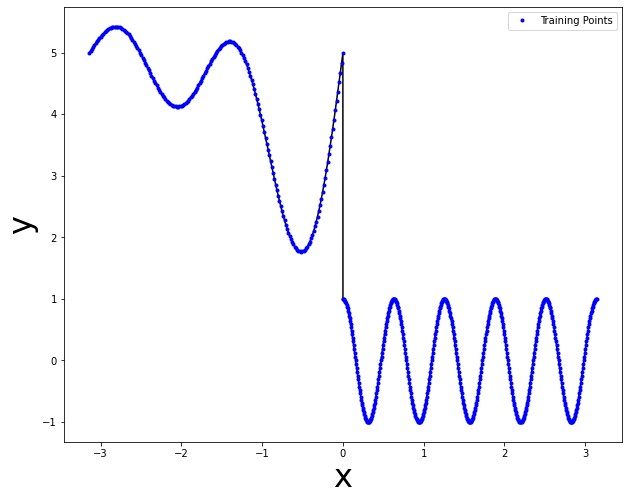

In [31]:
### LR scheduler with Contsnat LR
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
torch.manual_seed(1234) 

def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])

x_test_l = np.linspace(-np.pi, -1.0e-3, 301)
x_test_r = np.linspace(0., np.pi, 501)
x_test = np.concatenate((x_test_l, x_test_r), axis=0)
y_test = np.array([fun_x(i) for i in x_test])

ax1.plot(x_in, y_in, 'k-')
ax1.plot(x_in, y_in, '.b', label="Training Points")
ax1.set_xlabel('x', fontsize=32)
ax1.set_ylabel('y', fontsize=32)
ax1.legend()

x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()

x_test = torch.from_numpy(x_test.reshape(-1,1)).float()
y_test = torch.from_numpy(y_test.reshape(-1,1)).float()
train_loss_list = []
test_loss_list = []

acc_train = []
acc_test = []

loss_function = torch.nn.MSELoss()
Niter_Adam = 30000

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_adam = torch.optim.Adam(Net.parameters(), lr = 0.01, weight_decay=1e-5)


x = Variable(x)
y = Variable(y)

# Implementation of Adam
print('Adam Optimization')
    
for it in range(Niter_Adam):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_adam.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_adam.step()    
    print(f"Epoch: {it + 1:02}/{Niter_Adam} Loss: {loss:.5e}")
    y_train_pred = Net(x)
    
    
    
    with torch.no_grad():
        y_test_pred = Net(x_test)
        test_loss = loss_function(y_test_pred, y_test)
        test_acuuracy = torch.linalg.norm(y_test-y_test_pred)/ (torch.norm(y_test_pred))
        ts_ac_val = test_acuuracy.numpy()
        train_acuuracy = torch.linalg.norm(y-y_train_pred)/ (torch.norm(y_train_pred))
        tr_ac_val = train_acuuracy.numpy()        
        train_loss_list.append(loss)
        test_loss_list.append(test_loss)
        acc_train.append(tr_ac_val)
        acc_test.append(ts_ac_val)
        
y_const_lr = y_pred.detach().numpy()     

# $L_1$-regularizer for DNN with function approxiamtion


Adam Optimization
Epoch: 01/30000 Loss: 6.23749e+00
Epoch: 02/30000 Loss: 4.74761e+00
Epoch: 03/30000 Loss: 3.63575e+00
Epoch: 04/30000 Loss: 2.71339e+00
Epoch: 05/30000 Loss: 1.95481e+00
Epoch: 06/30000 Loss: 1.40802e+00
Epoch: 07/30000 Loss: 1.08214e+00
Epoch: 08/30000 Loss: 9.34904e-01
Epoch: 09/30000 Loss: 9.14894e-01
Epoch: 10/30000 Loss: 9.85421e-01
Epoch: 11/30000 Loss: 1.11177e+00
Epoch: 12/30000 Loss: 1.25118e+00
Epoch: 13/30000 Loss: 1.35778e+00
Epoch: 14/30000 Loss: 1.40044e+00
Epoch: 15/30000 Loss: 1.37522e+00
Epoch: 16/30000 Loss: 1.29966e+00
Epoch: 17/30000 Loss: 1.19844e+00
Epoch: 18/30000 Loss: 1.09207e+00
Epoch: 19/30000 Loss: 9.92550e-01
Epoch: 20/30000 Loss: 9.06451e-01
Epoch: 21/30000 Loss: 8.39463e-01
Epoch: 22/30000 Loss: 7.96907e-01
Epoch: 23/30000 Loss: 7.80544e-01
Epoch: 24/30000 Loss: 7.85749e-01
Epoch: 25/30000 Loss: 8.03107e-01
Epoch: 26/30000 Loss: 8.23814e-01
Epoch: 27/30000 Loss: 8.43301e-01
Epoch: 28/30000 Loss: 8.59882e-01
Epoch: 29/30000 Loss: 8.71396e

Epoch: 287/30000 Loss: 5.22019e-01
Epoch: 288/30000 Loss: 5.21758e-01
Epoch: 289/30000 Loss: 5.21503e-01
Epoch: 290/30000 Loss: 5.21245e-01
Epoch: 291/30000 Loss: 5.20963e-01
Epoch: 292/30000 Loss: 5.20716e-01
Epoch: 293/30000 Loss: 5.20441e-01
Epoch: 294/30000 Loss: 5.20179e-01
Epoch: 295/30000 Loss: 5.19924e-01
Epoch: 296/30000 Loss: 5.19644e-01
Epoch: 297/30000 Loss: 5.19396e-01
Epoch: 298/30000 Loss: 5.19118e-01
Epoch: 299/30000 Loss: 5.18865e-01
Epoch: 300/30000 Loss: 5.18620e-01
Epoch: 301/30000 Loss: 5.18356e-01
Epoch: 302/30000 Loss: 5.18096e-01
Epoch: 303/30000 Loss: 5.17838e-01
Epoch: 304/30000 Loss: 5.17604e-01
Epoch: 305/30000 Loss: 5.17367e-01
Epoch: 306/30000 Loss: 5.17160e-01
Epoch: 307/30000 Loss: 5.17028e-01
Epoch: 308/30000 Loss: 5.17050e-01
Epoch: 309/30000 Loss: 5.17351e-01
Epoch: 310/30000 Loss: 5.18137e-01
Epoch: 311/30000 Loss: 5.19681e-01
Epoch: 312/30000 Loss: 5.21353e-01
Epoch: 313/30000 Loss: 5.21842e-01
Epoch: 314/30000 Loss: 5.19086e-01
Epoch: 315/30000 Los

Epoch: 589/30000 Loss: 4.08359e-01
Epoch: 590/30000 Loss: 4.12121e-01
Epoch: 591/30000 Loss: 4.14300e-01
Epoch: 592/30000 Loss: 4.12114e-01
Epoch: 593/30000 Loss: 4.07604e-01
Epoch: 594/30000 Loss: 4.05318e-01
Epoch: 595/30000 Loss: 4.06598e-01
Epoch: 596/30000 Loss: 4.08699e-01
Epoch: 597/30000 Loss: 4.08524e-01
Epoch: 598/30000 Loss: 4.05932e-01
Epoch: 599/30000 Loss: 4.03636e-01
Epoch: 600/30000 Loss: 4.03491e-01
Epoch: 601/30000 Loss: 4.04655e-01
Epoch: 602/30000 Loss: 4.05016e-01
Epoch: 603/30000 Loss: 4.03760e-01
Epoch: 604/30000 Loss: 4.02044e-01
Epoch: 605/30000 Loss: 4.01336e-01
Epoch: 606/30000 Loss: 4.01700e-01
Epoch: 607/30000 Loss: 4.02064e-01
Epoch: 608/30000 Loss: 4.01598e-01
Epoch: 609/30000 Loss: 4.00537e-01
Epoch: 610/30000 Loss: 3.99598e-01
Epoch: 611/30000 Loss: 3.99254e-01
Epoch: 612/30000 Loss: 3.99295e-01
Epoch: 613/30000 Loss: 3.99217e-01
Epoch: 614/30000 Loss: 3.98761e-01
Epoch: 615/30000 Loss: 3.98061e-01
Epoch: 616/30000 Loss: 3.97433e-01
Epoch: 617/30000 Los

Epoch: 888/30000 Loss: 3.29613e-01
Epoch: 889/30000 Loss: 3.32412e-01
Epoch: 890/30000 Loss: 3.36247e-01
Epoch: 891/30000 Loss: 3.40722e-01
Epoch: 892/30000 Loss: 3.43882e-01
Epoch: 893/30000 Loss: 3.43427e-01
Epoch: 894/30000 Loss: 3.37668e-01
Epoch: 895/30000 Loss: 3.29147e-01
Epoch: 896/30000 Loss: 3.23141e-01
Epoch: 897/30000 Loss: 3.22821e-01
Epoch: 898/30000 Loss: 3.26609e-01
Epoch: 899/30000 Loss: 3.30207e-01
Epoch: 900/30000 Loss: 3.30238e-01
Epoch: 901/30000 Loss: 3.26641e-01
Epoch: 902/30000 Loss: 3.22549e-01
Epoch: 903/30000 Loss: 3.21045e-01
Epoch: 904/30000 Loss: 3.22333e-01
Epoch: 905/30000 Loss: 3.24273e-01
Epoch: 906/30000 Loss: 3.24634e-01
Epoch: 907/30000 Loss: 3.23061e-01
Epoch: 908/30000 Loss: 3.20841e-01
Epoch: 909/30000 Loss: 3.19643e-01
Epoch: 910/30000 Loss: 3.19921e-01
Epoch: 911/30000 Loss: 3.20851e-01
Epoch: 912/30000 Loss: 3.21343e-01
Epoch: 913/30000 Loss: 3.20731e-01
Epoch: 914/30000 Loss: 3.19433e-01
Epoch: 915/30000 Loss: 3.18299e-01
Epoch: 916/30000 Los

Epoch: 1184/30000 Loss: 2.70869e-01
Epoch: 1185/30000 Loss: 2.70011e-01
Epoch: 1186/30000 Loss: 2.69112e-01
Epoch: 1187/30000 Loss: 2.68935e-01
Epoch: 1188/30000 Loss: 2.69204e-01
Epoch: 1189/30000 Loss: 2.69316e-01
Epoch: 1190/30000 Loss: 2.68980e-01
Epoch: 1191/30000 Loss: 2.68375e-01
Epoch: 1192/30000 Loss: 2.68020e-01
Epoch: 1193/30000 Loss: 2.68146e-01
Epoch: 1194/30000 Loss: 2.68348e-01
Epoch: 1195/30000 Loss: 2.68110e-01
Epoch: 1196/30000 Loss: 2.67553e-01
Epoch: 1197/30000 Loss: 2.67241e-01
Epoch: 1198/30000 Loss: 2.67347e-01
Epoch: 1199/30000 Loss: 2.67456e-01
Epoch: 1200/30000 Loss: 2.67235e-01
Epoch: 1201/30000 Loss: 2.66836e-01
Epoch: 1202/30000 Loss: 2.66606e-01
Epoch: 1203/30000 Loss: 2.66593e-01
Epoch: 1204/30000 Loss: 2.66581e-01
Epoch: 1205/30000 Loss: 2.66427e-01
Epoch: 1206/30000 Loss: 2.66196e-01
Epoch: 1207/30000 Loss: 2.66002e-01
Epoch: 1208/30000 Loss: 2.65881e-01
Epoch: 1209/30000 Loss: 2.65795e-01
Epoch: 1210/30000 Loss: 2.65698e-01
Epoch: 1211/30000 Loss: 2.65

Epoch: 1482/30000 Loss: 2.38089e-01
Epoch: 1483/30000 Loss: 2.38010e-01
Epoch: 1484/30000 Loss: 2.37932e-01
Epoch: 1485/30000 Loss: 2.37855e-01
Epoch: 1486/30000 Loss: 2.37776e-01
Epoch: 1487/30000 Loss: 2.37697e-01
Epoch: 1488/30000 Loss: 2.37617e-01
Epoch: 1489/30000 Loss: 2.37538e-01
Epoch: 1490/30000 Loss: 2.37459e-01
Epoch: 1491/30000 Loss: 2.37381e-01
Epoch: 1492/30000 Loss: 2.37302e-01
Epoch: 1493/30000 Loss: 2.37224e-01
Epoch: 1494/30000 Loss: 2.37145e-01
Epoch: 1495/30000 Loss: 2.37066e-01
Epoch: 1496/30000 Loss: 2.36988e-01
Epoch: 1497/30000 Loss: 2.36909e-01
Epoch: 1498/30000 Loss: 2.36830e-01
Epoch: 1499/30000 Loss: 2.36752e-01
Epoch: 1500/30000 Loss: 2.36673e-01
Epoch: 1501/30000 Loss: 2.36595e-01
Epoch: 1502/30000 Loss: 2.36517e-01
Epoch: 1503/30000 Loss: 2.36438e-01
Epoch: 1504/30000 Loss: 2.36360e-01
Epoch: 1505/30000 Loss: 2.36282e-01
Epoch: 1506/30000 Loss: 2.36203e-01
Epoch: 1507/30000 Loss: 2.36124e-01
Epoch: 1508/30000 Loss: 2.36046e-01
Epoch: 1509/30000 Loss: 2.35

Epoch: 1769/30000 Loss: 2.18804e-01
Epoch: 1770/30000 Loss: 2.18754e-01
Epoch: 1771/30000 Loss: 2.18702e-01
Epoch: 1772/30000 Loss: 2.18650e-01
Epoch: 1773/30000 Loss: 2.18602e-01
Epoch: 1774/30000 Loss: 2.18559e-01
Epoch: 1775/30000 Loss: 2.18527e-01
Epoch: 1776/30000 Loss: 2.18502e-01
Epoch: 1777/30000 Loss: 2.18496e-01
Epoch: 1778/30000 Loss: 2.18504e-01
Epoch: 1779/30000 Loss: 2.18545e-01
Epoch: 1780/30000 Loss: 2.18610e-01
Epoch: 1781/30000 Loss: 2.18714e-01
Epoch: 1782/30000 Loss: 2.18871e-01
Epoch: 1783/30000 Loss: 2.19131e-01
Epoch: 1784/30000 Loss: 2.19507e-01
Epoch: 1785/30000 Loss: 2.20083e-01
Epoch: 1786/30000 Loss: 2.20897e-01
Epoch: 1787/30000 Loss: 2.22097e-01
Epoch: 1788/30000 Loss: 2.23798e-01
Epoch: 1789/30000 Loss: 2.26188e-01
Epoch: 1790/30000 Loss: 2.29365e-01
Epoch: 1791/30000 Loss: 2.33358e-01
Epoch: 1792/30000 Loss: 2.37756e-01
Epoch: 1793/30000 Loss: 2.41880e-01
Epoch: 1794/30000 Loss: 2.44233e-01
Epoch: 1795/30000 Loss: 2.43569e-01
Epoch: 1796/30000 Loss: 2.38

Epoch: 2069/30000 Loss: 2.04251e-01
Epoch: 2070/30000 Loss: 2.04219e-01
Epoch: 2071/30000 Loss: 2.04192e-01
Epoch: 2072/30000 Loss: 2.04175e-01
Epoch: 2073/30000 Loss: 2.04172e-01
Epoch: 2074/30000 Loss: 2.04186e-01
Epoch: 2075/30000 Loss: 2.04232e-01
Epoch: 2076/30000 Loss: 2.04321e-01
Epoch: 2077/30000 Loss: 2.04483e-01
Epoch: 2078/30000 Loss: 2.04750e-01
Epoch: 2079/30000 Loss: 2.05190e-01
Epoch: 2080/30000 Loss: 2.05884e-01
Epoch: 2081/30000 Loss: 2.06983e-01
Epoch: 2082/30000 Loss: 2.08686e-01
Epoch: 2083/30000 Loss: 2.11345e-01
Epoch: 2084/30000 Loss: 2.15362e-01
Epoch: 2085/30000 Loss: 2.21152e-01
Epoch: 2086/30000 Loss: 2.29120e-01
Epoch: 2087/30000 Loss: 2.38458e-01
Epoch: 2088/30000 Loss: 2.47535e-01
Epoch: 2089/30000 Loss: 2.51980e-01
Epoch: 2090/30000 Loss: 2.48833e-01
Epoch: 2091/30000 Loss: 2.37032e-01
Epoch: 2092/30000 Loss: 2.22035e-01
Epoch: 2093/30000 Loss: 2.10937e-01
Epoch: 2094/30000 Loss: 2.08236e-01
Epoch: 2095/30000 Loss: 2.12776e-01
Epoch: 2096/30000 Loss: 2.19

Epoch: 2362/30000 Loss: 1.94469e-01
Epoch: 2363/30000 Loss: 1.94331e-01
Epoch: 2364/30000 Loss: 1.94052e-01
Epoch: 2365/30000 Loss: 1.93887e-01
Epoch: 2366/30000 Loss: 1.93923e-01
Epoch: 2367/30000 Loss: 1.94038e-01
Epoch: 2368/30000 Loss: 1.94058e-01
Epoch: 2369/30000 Loss: 1.93941e-01
Epoch: 2370/30000 Loss: 1.93784e-01
Epoch: 2371/30000 Loss: 1.93708e-01
Epoch: 2372/30000 Loss: 1.93730e-01
Epoch: 2373/30000 Loss: 1.93773e-01
Epoch: 2374/30000 Loss: 1.93760e-01
Epoch: 2375/30000 Loss: 1.93681e-01
Epoch: 2376/30000 Loss: 1.93586e-01
Epoch: 2377/30000 Loss: 1.93530e-01
Epoch: 2378/30000 Loss: 1.93522e-01
Epoch: 2379/30000 Loss: 1.93528e-01
Epoch: 2380/30000 Loss: 1.93511e-01
Epoch: 2381/30000 Loss: 1.93462e-01
Epoch: 2382/30000 Loss: 1.93399e-01
Epoch: 2383/30000 Loss: 1.93351e-01
Epoch: 2384/30000 Loss: 1.93329e-01
Epoch: 2385/30000 Loss: 1.93318e-01
Epoch: 2386/30000 Loss: 1.93303e-01
Epoch: 2387/30000 Loss: 1.93268e-01
Epoch: 2388/30000 Loss: 1.93219e-01
Epoch: 2389/30000 Loss: 1.93

Epoch: 2654/30000 Loss: 1.86183e-01
Epoch: 2655/30000 Loss: 1.86182e-01
Epoch: 2656/30000 Loss: 1.86188e-01
Epoch: 2657/30000 Loss: 1.86212e-01
Epoch: 2658/30000 Loss: 1.86258e-01
Epoch: 2659/30000 Loss: 1.86339e-01
Epoch: 2660/30000 Loss: 1.86474e-01
Epoch: 2661/30000 Loss: 1.86689e-01
Epoch: 2662/30000 Loss: 1.87018e-01
Epoch: 2663/30000 Loss: 1.87511e-01
Epoch: 2664/30000 Loss: 1.88225e-01
Epoch: 2665/30000 Loss: 1.89246e-01
Epoch: 2666/30000 Loss: 1.90622e-01
Epoch: 2667/30000 Loss: 1.92409e-01
Epoch: 2668/30000 Loss: 1.94471e-01
Epoch: 2669/30000 Loss: 1.96561e-01
Epoch: 2670/30000 Loss: 1.98007e-01
Epoch: 2671/30000 Loss: 1.98218e-01
Epoch: 2672/30000 Loss: 1.96722e-01
Epoch: 2673/30000 Loss: 1.94066e-01
Epoch: 2674/30000 Loss: 1.91465e-01
Epoch: 2675/30000 Loss: 1.90227e-01
Epoch: 2676/30000 Loss: 1.90842e-01
Epoch: 2677/30000 Loss: 1.92747e-01
Epoch: 2678/30000 Loss: 1.94779e-01
Epoch: 2679/30000 Loss: 1.95794e-01
Epoch: 2680/30000 Loss: 1.95304e-01
Epoch: 2681/30000 Loss: 1.93

Epoch: 2949/30000 Loss: 1.81417e-01
Epoch: 2950/30000 Loss: 1.80526e-01
Epoch: 2951/30000 Loss: 1.79960e-01
Epoch: 2952/30000 Loss: 1.80132e-01
Epoch: 2953/30000 Loss: 1.80666e-01
Epoch: 2954/30000 Loss: 1.80891e-01
Epoch: 2955/30000 Loss: 1.80557e-01
Epoch: 2956/30000 Loss: 1.79953e-01
Epoch: 2957/30000 Loss: 1.79598e-01
Epoch: 2958/30000 Loss: 1.79705e-01
Epoch: 2959/30000 Loss: 1.80051e-01
Epoch: 2960/30000 Loss: 1.80248e-01
Epoch: 2961/30000 Loss: 1.80106e-01
Epoch: 2962/30000 Loss: 1.79761e-01
Epoch: 2963/30000 Loss: 1.79493e-01
Epoch: 2964/30000 Loss: 1.79463e-01
Epoch: 2965/30000 Loss: 1.79608e-01
Epoch: 2966/30000 Loss: 1.79734e-01
Epoch: 2967/30000 Loss: 1.79713e-01
Epoch: 2968/30000 Loss: 1.79566e-01
Epoch: 2969/30000 Loss: 1.79417e-01
Epoch: 2970/30000 Loss: 1.79359e-01
Epoch: 2971/30000 Loss: 1.79392e-01
Epoch: 2972/30000 Loss: 1.79436e-01
Epoch: 2973/30000 Loss: 1.79426e-01
Epoch: 2974/30000 Loss: 1.79363e-01
Epoch: 2975/30000 Loss: 1.79278e-01
Epoch: 2976/30000 Loss: 1.79

Epoch: 3239/30000 Loss: 1.74774e-01
Epoch: 3240/30000 Loss: 1.74899e-01
Epoch: 3241/30000 Loss: 1.75048e-01
Epoch: 3242/30000 Loss: 1.75205e-01
Epoch: 3243/30000 Loss: 1.75350e-01
Epoch: 3244/30000 Loss: 1.75479e-01
Epoch: 3245/30000 Loss: 1.75582e-01
Epoch: 3246/30000 Loss: 1.75663e-01
Epoch: 3247/30000 Loss: 1.75718e-01
Epoch: 3248/30000 Loss: 1.75756e-01
Epoch: 3249/30000 Loss: 1.75777e-01
Epoch: 3250/30000 Loss: 1.75788e-01
Epoch: 3251/30000 Loss: 1.75794e-01
Epoch: 3252/30000 Loss: 1.75797e-01
Epoch: 3253/30000 Loss: 1.75794e-01
Epoch: 3254/30000 Loss: 1.75795e-01
Epoch: 3255/30000 Loss: 1.75798e-01
Epoch: 3256/30000 Loss: 1.75809e-01
Epoch: 3257/30000 Loss: 1.75830e-01
Epoch: 3258/30000 Loss: 1.75866e-01
Epoch: 3259/30000 Loss: 1.75917e-01
Epoch: 3260/30000 Loss: 1.75993e-01
Epoch: 3261/30000 Loss: 1.76091e-01
Epoch: 3262/30000 Loss: 1.76224e-01
Epoch: 3263/30000 Loss: 1.76391e-01
Epoch: 3264/30000 Loss: 1.76606e-01
Epoch: 3265/30000 Loss: 1.76885e-01
Epoch: 3266/30000 Loss: 1.77

Epoch: 3531/30000 Loss: 1.78585e-01
Epoch: 3532/30000 Loss: 1.77653e-01
Epoch: 3533/30000 Loss: 1.76120e-01
Epoch: 3534/30000 Loss: 1.74358e-01
Epoch: 3535/30000 Loss: 1.72766e-01
Epoch: 3536/30000 Loss: 1.71692e-01
Epoch: 3537/30000 Loss: 1.71211e-01
Epoch: 3538/30000 Loss: 1.71246e-01
Epoch: 3539/30000 Loss: 1.71536e-01
Epoch: 3540/30000 Loss: 1.71849e-01
Epoch: 3541/30000 Loss: 1.72012e-01
Epoch: 3542/30000 Loss: 1.71946e-01
Epoch: 3543/30000 Loss: 1.71696e-01
Epoch: 3544/30000 Loss: 1.71359e-01
Epoch: 3545/30000 Loss: 1.71069e-01
Epoch: 3546/30000 Loss: 1.70922e-01
Epoch: 3547/30000 Loss: 1.70967e-01
Epoch: 3548/30000 Loss: 1.71158e-01
Epoch: 3549/30000 Loss: 1.71428e-01
Epoch: 3550/30000 Loss: 1.71673e-01
Epoch: 3551/30000 Loss: 1.71838e-01
Epoch: 3552/30000 Loss: 1.71869e-01
Epoch: 3553/30000 Loss: 1.71790e-01
Epoch: 3554/30000 Loss: 1.71613e-01
Epoch: 3555/30000 Loss: 1.71388e-01
Epoch: 3556/30000 Loss: 1.71163e-01
Epoch: 3557/30000 Loss: 1.70980e-01
Epoch: 3558/30000 Loss: 1.70

Epoch: 3814/30000 Loss: 1.67506e-01
Epoch: 3815/30000 Loss: 1.67587e-01
Epoch: 3816/30000 Loss: 1.67696e-01
Epoch: 3817/30000 Loss: 1.67846e-01
Epoch: 3818/30000 Loss: 1.68045e-01
Epoch: 3819/30000 Loss: 1.68317e-01
Epoch: 3820/30000 Loss: 1.68693e-01
Epoch: 3821/30000 Loss: 1.69201e-01
Epoch: 3822/30000 Loss: 1.69895e-01
Epoch: 3823/30000 Loss: 1.70826e-01
Epoch: 3824/30000 Loss: 1.72086e-01
Epoch: 3825/30000 Loss: 1.73754e-01
Epoch: 3826/30000 Loss: 1.75940e-01
Epoch: 3827/30000 Loss: 1.78683e-01
Epoch: 3828/30000 Loss: 1.81884e-01
Epoch: 3829/30000 Loss: 1.85440e-01
Epoch: 3830/30000 Loss: 1.88848e-01
Epoch: 3831/30000 Loss: 1.91557e-01
Epoch: 3832/30000 Loss: 1.92633e-01
Epoch: 3833/30000 Loss: 1.91516e-01
Epoch: 3834/30000 Loss: 1.88078e-01
Epoch: 3835/30000 Loss: 1.83146e-01
Epoch: 3836/30000 Loss: 1.77869e-01
Epoch: 3837/30000 Loss: 1.73549e-01
Epoch: 3838/30000 Loss: 1.70857e-01
Epoch: 3839/30000 Loss: 1.69904e-01
Epoch: 3840/30000 Loss: 1.70227e-01
Epoch: 3841/30000 Loss: 1.71

Epoch: 4098/30000 Loss: 1.64186e-01
Epoch: 4099/30000 Loss: 1.64173e-01
Epoch: 4100/30000 Loss: 1.64167e-01
Epoch: 4101/30000 Loss: 1.64163e-01
Epoch: 4102/30000 Loss: 1.64160e-01
Epoch: 4103/30000 Loss: 1.64157e-01
Epoch: 4104/30000 Loss: 1.64151e-01
Epoch: 4105/30000 Loss: 1.64142e-01
Epoch: 4106/30000 Loss: 1.64132e-01
Epoch: 4107/30000 Loss: 1.64119e-01
Epoch: 4108/30000 Loss: 1.64105e-01
Epoch: 4109/30000 Loss: 1.64090e-01
Epoch: 4110/30000 Loss: 1.64075e-01
Epoch: 4111/30000 Loss: 1.64060e-01
Epoch: 4112/30000 Loss: 1.64046e-01
Epoch: 4113/30000 Loss: 1.64033e-01
Epoch: 4114/30000 Loss: 1.64021e-01
Epoch: 4115/30000 Loss: 1.64011e-01
Epoch: 4116/30000 Loss: 1.64002e-01
Epoch: 4117/30000 Loss: 1.63994e-01
Epoch: 4118/30000 Loss: 1.63988e-01
Epoch: 4119/30000 Loss: 1.63984e-01
Epoch: 4120/30000 Loss: 1.63984e-01
Epoch: 4121/30000 Loss: 1.63987e-01
Epoch: 4122/30000 Loss: 1.63998e-01
Epoch: 4123/30000 Loss: 1.64019e-01
Epoch: 4124/30000 Loss: 1.64054e-01
Epoch: 4125/30000 Loss: 1.64

Epoch: 4391/30000 Loss: 1.61615e-01
Epoch: 4392/30000 Loss: 1.61608e-01
Epoch: 4393/30000 Loss: 1.61600e-01
Epoch: 4394/30000 Loss: 1.61592e-01
Epoch: 4395/30000 Loss: 1.61585e-01
Epoch: 4396/30000 Loss: 1.61577e-01
Epoch: 4397/30000 Loss: 1.61570e-01
Epoch: 4398/30000 Loss: 1.61562e-01
Epoch: 4399/30000 Loss: 1.61555e-01
Epoch: 4400/30000 Loss: 1.61549e-01
Epoch: 4401/30000 Loss: 1.61544e-01
Epoch: 4402/30000 Loss: 1.61541e-01
Epoch: 4403/30000 Loss: 1.61540e-01
Epoch: 4404/30000 Loss: 1.61542e-01
Epoch: 4405/30000 Loss: 1.61549e-01
Epoch: 4406/30000 Loss: 1.61562e-01
Epoch: 4407/30000 Loss: 1.61583e-01
Epoch: 4408/30000 Loss: 1.61618e-01
Epoch: 4409/30000 Loss: 1.61673e-01
Epoch: 4410/30000 Loss: 1.61758e-01
Epoch: 4411/30000 Loss: 1.61885e-01
Epoch: 4412/30000 Loss: 1.62077e-01
Epoch: 4413/30000 Loss: 1.62375e-01
Epoch: 4414/30000 Loss: 1.62822e-01
Epoch: 4415/30000 Loss: 1.63507e-01
Epoch: 4416/30000 Loss: 1.64534e-01
Epoch: 4417/30000 Loss: 1.66089e-01
Epoch: 4418/30000 Loss: 1.68

Epoch: 4681/30000 Loss: 1.60067e-01
Epoch: 4682/30000 Loss: 1.60165e-01
Epoch: 4683/30000 Loss: 1.60339e-01
Epoch: 4684/30000 Loss: 1.60513e-01
Epoch: 4685/30000 Loss: 1.60626e-01
Epoch: 4686/30000 Loss: 1.60636e-01
Epoch: 4687/30000 Loss: 1.60539e-01
Epoch: 4688/30000 Loss: 1.60342e-01
Epoch: 4689/30000 Loss: 1.60089e-01
Epoch: 4690/30000 Loss: 1.59821e-01
Epoch: 4691/30000 Loss: 1.59588e-01
Epoch: 4692/30000 Loss: 1.59422e-01
Epoch: 4693/30000 Loss: 1.59339e-01
Epoch: 4694/30000 Loss: 1.59333e-01
Epoch: 4695/30000 Loss: 1.59386e-01
Epoch: 4696/30000 Loss: 1.59473e-01
Epoch: 4697/30000 Loss: 1.59568e-01
Epoch: 4698/30000 Loss: 1.59650e-01
Epoch: 4699/30000 Loss: 1.59705e-01
Epoch: 4700/30000 Loss: 1.59726e-01
Epoch: 4701/30000 Loss: 1.59716e-01
Epoch: 4702/30000 Loss: 1.59683e-01
Epoch: 4703/30000 Loss: 1.59635e-01
Epoch: 4704/30000 Loss: 1.59578e-01
Epoch: 4705/30000 Loss: 1.59522e-01
Epoch: 4706/30000 Loss: 1.59472e-01
Epoch: 4707/30000 Loss: 1.59433e-01
Epoch: 4708/30000 Loss: 1.59

Epoch: 4970/30000 Loss: 1.68249e-01
Epoch: 4971/30000 Loss: 1.65483e-01
Epoch: 4972/30000 Loss: 1.60794e-01
Epoch: 4973/30000 Loss: 1.58081e-01
Epoch: 4974/30000 Loss: 1.58721e-01
Epoch: 4975/30000 Loss: 1.61006e-01
Epoch: 4976/30000 Loss: 1.62360e-01
Epoch: 4977/30000 Loss: 1.61703e-01
Epoch: 4978/30000 Loss: 1.59924e-01
Epoch: 4979/30000 Loss: 1.58583e-01
Epoch: 4980/30000 Loss: 1.58408e-01
Epoch: 4981/30000 Loss: 1.58942e-01
Epoch: 4982/30000 Loss: 1.59343e-01
Epoch: 4983/30000 Loss: 1.59220e-01
Epoch: 4984/30000 Loss: 1.58801e-01
Epoch: 4985/30000 Loss: 1.58472e-01
Epoch: 4986/30000 Loss: 1.58352e-01
Epoch: 4987/30000 Loss: 1.58293e-01
Epoch: 4988/30000 Loss: 1.58141e-01
Epoch: 4989/30000 Loss: 1.57951e-01
Epoch: 4990/30000 Loss: 1.57882e-01
Epoch: 4991/30000 Loss: 1.57979e-01
Epoch: 4992/30000 Loss: 1.58105e-01
Epoch: 4993/30000 Loss: 1.58062e-01
Epoch: 4994/30000 Loss: 1.57814e-01
Epoch: 4995/30000 Loss: 1.57515e-01
Epoch: 4996/30000 Loss: 1.57374e-01
Epoch: 4997/30000 Loss: 1.57

Epoch: 5266/30000 Loss: 1.57425e-01
Epoch: 5267/30000 Loss: 1.56639e-01
Epoch: 5268/30000 Loss: 1.55971e-01
Epoch: 5269/30000 Loss: 1.55661e-01
Epoch: 5270/30000 Loss: 1.55729e-01
Epoch: 5271/30000 Loss: 1.56020e-01
Epoch: 5272/30000 Loss: 1.56320e-01
Epoch: 5273/30000 Loss: 1.56473e-01
Epoch: 5274/30000 Loss: 1.56432e-01
Epoch: 5275/30000 Loss: 1.56250e-01
Epoch: 5276/30000 Loss: 1.56029e-01
Epoch: 5277/30000 Loss: 1.55851e-01
Epoch: 5278/30000 Loss: 1.55751e-01
Epoch: 5279/30000 Loss: 1.55724e-01
Epoch: 5280/30000 Loss: 1.55732e-01
Epoch: 5281/30000 Loss: 1.55745e-01
Epoch: 5282/30000 Loss: 1.55747e-01
Epoch: 5283/30000 Loss: 1.55740e-01
Epoch: 5284/30000 Loss: 1.55734e-01
Epoch: 5285/30000 Loss: 1.55736e-01
Epoch: 5286/30000 Loss: 1.55742e-01
Epoch: 5287/30000 Loss: 1.55742e-01
Epoch: 5288/30000 Loss: 1.55723e-01
Epoch: 5289/30000 Loss: 1.55682e-01
Epoch: 5290/30000 Loss: 1.55624e-01
Epoch: 5291/30000 Loss: 1.55559e-01
Epoch: 5292/30000 Loss: 1.55505e-01
Epoch: 5293/30000 Loss: 1.55

Epoch: 5564/30000 Loss: 1.54436e-01
Epoch: 5565/30000 Loss: 1.54390e-01
Epoch: 5566/30000 Loss: 1.54327e-01
Epoch: 5567/30000 Loss: 1.54278e-01
Epoch: 5568/30000 Loss: 1.54260e-01
Epoch: 5569/30000 Loss: 1.54261e-01
Epoch: 5570/30000 Loss: 1.54260e-01
Epoch: 5571/30000 Loss: 1.54242e-01
Epoch: 5572/30000 Loss: 1.54198e-01
Epoch: 5573/30000 Loss: 1.54133e-01
Epoch: 5574/30000 Loss: 1.54061e-01
Epoch: 5575/30000 Loss: 1.53999e-01
Epoch: 5576/30000 Loss: 1.53961e-01
Epoch: 5577/30000 Loss: 1.53950e-01
Epoch: 5578/30000 Loss: 1.53964e-01
Epoch: 5579/30000 Loss: 1.53991e-01
Epoch: 5580/30000 Loss: 1.54022e-01
Epoch: 5581/30000 Loss: 1.54045e-01
Epoch: 5582/30000 Loss: 1.54055e-01
Epoch: 5583/30000 Loss: 1.54050e-01
Epoch: 5584/30000 Loss: 1.54034e-01
Epoch: 5585/30000 Loss: 1.54012e-01
Epoch: 5586/30000 Loss: 1.53990e-01
Epoch: 5587/30000 Loss: 1.53970e-01
Epoch: 5588/30000 Loss: 1.53955e-01
Epoch: 5589/30000 Loss: 1.53944e-01
Epoch: 5590/30000 Loss: 1.53937e-01
Epoch: 5591/30000 Loss: 1.53

Epoch: 5866/30000 Loss: 1.49495e-01
Epoch: 5867/30000 Loss: 1.49728e-01
Epoch: 5868/30000 Loss: 1.49799e-01
Epoch: 5869/30000 Loss: 1.49660e-01
Epoch: 5870/30000 Loss: 1.49414e-01
Epoch: 5871/30000 Loss: 1.49207e-01
Epoch: 5872/30000 Loss: 1.49139e-01
Epoch: 5873/30000 Loss: 1.49202e-01
Epoch: 5874/30000 Loss: 1.49309e-01
Epoch: 5875/30000 Loss: 1.49370e-01
Epoch: 5876/30000 Loss: 1.49334e-01
Epoch: 5877/30000 Loss: 1.49225e-01
Epoch: 5878/30000 Loss: 1.49102e-01
Epoch: 5879/30000 Loss: 1.49024e-01
Epoch: 5880/30000 Loss: 1.49012e-01
Epoch: 5881/30000 Loss: 1.49048e-01
Epoch: 5882/30000 Loss: 1.49087e-01
Epoch: 5883/30000 Loss: 1.49095e-01
Epoch: 5884/30000 Loss: 1.49060e-01
Epoch: 5885/30000 Loss: 1.49000e-01
Epoch: 5886/30000 Loss: 1.48942e-01
Epoch: 5887/30000 Loss: 1.48903e-01
Epoch: 5888/30000 Loss: 1.48890e-01
Epoch: 5889/30000 Loss: 1.48895e-01
Epoch: 5890/30000 Loss: 1.48906e-01
Epoch: 5891/30000 Loss: 1.48907e-01
Epoch: 5892/30000 Loss: 1.48895e-01
Epoch: 5893/30000 Loss: 1.48

Epoch: 6163/30000 Loss: 1.44452e-01
Epoch: 6164/30000 Loss: 1.44419e-01
Epoch: 6165/30000 Loss: 1.44385e-01
Epoch: 6166/30000 Loss: 1.44350e-01
Epoch: 6167/30000 Loss: 1.44316e-01
Epoch: 6168/30000 Loss: 1.44281e-01
Epoch: 6169/30000 Loss: 1.44245e-01
Epoch: 6170/30000 Loss: 1.44210e-01
Epoch: 6171/30000 Loss: 1.44174e-01
Epoch: 6172/30000 Loss: 1.44138e-01
Epoch: 6173/30000 Loss: 1.44101e-01
Epoch: 6174/30000 Loss: 1.44064e-01
Epoch: 6175/30000 Loss: 1.44028e-01
Epoch: 6176/30000 Loss: 1.43990e-01
Epoch: 6177/30000 Loss: 1.43952e-01
Epoch: 6178/30000 Loss: 1.43915e-01
Epoch: 6179/30000 Loss: 1.43877e-01
Epoch: 6180/30000 Loss: 1.43838e-01
Epoch: 6181/30000 Loss: 1.43799e-01
Epoch: 6182/30000 Loss: 1.43760e-01
Epoch: 6183/30000 Loss: 1.43720e-01
Epoch: 6184/30000 Loss: 1.43681e-01
Epoch: 6185/30000 Loss: 1.43641e-01
Epoch: 6186/30000 Loss: 1.43602e-01
Epoch: 6187/30000 Loss: 1.43563e-01
Epoch: 6188/30000 Loss: 1.43525e-01
Epoch: 6189/30000 Loss: 1.43489e-01
Epoch: 6190/30000 Loss: 1.43

Epoch: 6466/30000 Loss: 1.37150e-01
Epoch: 6467/30000 Loss: 1.37262e-01
Epoch: 6468/30000 Loss: 1.35965e-01
Epoch: 6469/30000 Loss: 1.34239e-01
Epoch: 6470/30000 Loss: 1.33483e-01
Epoch: 6471/30000 Loss: 1.34065e-01
Epoch: 6472/30000 Loss: 1.35103e-01
Epoch: 6473/30000 Loss: 1.35422e-01
Epoch: 6474/30000 Loss: 1.34621e-01
Epoch: 6475/30000 Loss: 1.33398e-01
Epoch: 6476/30000 Loss: 1.32719e-01
Epoch: 6477/30000 Loss: 1.32973e-01
Epoch: 6478/30000 Loss: 1.33689e-01
Epoch: 6479/30000 Loss: 1.34078e-01
Epoch: 6480/30000 Loss: 1.33767e-01
Epoch: 6481/30000 Loss: 1.33024e-01
Epoch: 6482/30000 Loss: 1.32436e-01
Epoch: 6483/30000 Loss: 1.32372e-01
Epoch: 6484/30000 Loss: 1.32714e-01
Epoch: 6485/30000 Loss: 1.33051e-01
Epoch: 6486/30000 Loss: 1.33050e-01
Epoch: 6487/30000 Loss: 1.32719e-01
Epoch: 6488/30000 Loss: 1.32311e-01
Epoch: 6489/30000 Loss: 1.32101e-01
Epoch: 6490/30000 Loss: 1.32155e-01
Epoch: 6491/30000 Loss: 1.32328e-01
Epoch: 6492/30000 Loss: 1.32422e-01
Epoch: 6493/30000 Loss: 1.32

Epoch: 6767/30000 Loss: 1.22286e-01
Epoch: 6768/30000 Loss: 1.22265e-01
Epoch: 6769/30000 Loss: 1.22239e-01
Epoch: 6770/30000 Loss: 1.22217e-01
Epoch: 6771/30000 Loss: 1.22194e-01
Epoch: 6772/30000 Loss: 1.22179e-01
Epoch: 6773/30000 Loss: 1.22165e-01
Epoch: 6774/30000 Loss: 1.22164e-01
Epoch: 6775/30000 Loss: 1.22170e-01
Epoch: 6776/30000 Loss: 1.22190e-01
Epoch: 6777/30000 Loss: 1.22225e-01
Epoch: 6778/30000 Loss: 1.22286e-01
Epoch: 6779/30000 Loss: 1.22375e-01
Epoch: 6780/30000 Loss: 1.22508e-01
Epoch: 6781/30000 Loss: 1.22692e-01
Epoch: 6782/30000 Loss: 1.22954e-01
Epoch: 6783/30000 Loss: 1.23313e-01
Epoch: 6784/30000 Loss: 1.23809e-01
Epoch: 6785/30000 Loss: 1.24488e-01
Epoch: 6786/30000 Loss: 1.25414e-01
Epoch: 6787/30000 Loss: 1.26671e-01
Epoch: 6788/30000 Loss: 1.28344e-01
Epoch: 6789/30000 Loss: 1.30554e-01
Epoch: 6790/30000 Loss: 1.33370e-01
Epoch: 6791/30000 Loss: 1.36859e-01
Epoch: 6792/30000 Loss: 1.40886e-01
Epoch: 6793/30000 Loss: 1.45070e-01
Epoch: 6794/30000 Loss: 1.48

Epoch: 7065/30000 Loss: 1.14794e-01
Epoch: 7066/30000 Loss: 1.14384e-01
Epoch: 7067/30000 Loss: 1.13915e-01
Epoch: 7068/30000 Loss: 1.13488e-01
Epoch: 7069/30000 Loss: 1.13179e-01
Epoch: 7070/30000 Loss: 1.13019e-01
Epoch: 7071/30000 Loss: 1.13002e-01
Epoch: 7072/30000 Loss: 1.13089e-01
Epoch: 7073/30000 Loss: 1.13233e-01
Epoch: 7074/30000 Loss: 1.13382e-01
Epoch: 7075/30000 Loss: 1.13502e-01
Epoch: 7076/30000 Loss: 1.13565e-01
Epoch: 7077/30000 Loss: 1.13568e-01
Epoch: 7078/30000 Loss: 1.13513e-01
Epoch: 7079/30000 Loss: 1.13417e-01
Epoch: 7080/30000 Loss: 1.13301e-01
Epoch: 7081/30000 Loss: 1.13184e-01
Epoch: 7082/30000 Loss: 1.13082e-01
Epoch: 7083/30000 Loss: 1.13007e-01
Epoch: 7084/30000 Loss: 1.12964e-01
Epoch: 7085/30000 Loss: 1.12953e-01
Epoch: 7086/30000 Loss: 1.12971e-01
Epoch: 7087/30000 Loss: 1.13016e-01
Epoch: 7088/30000 Loss: 1.13081e-01
Epoch: 7089/30000 Loss: 1.13164e-01
Epoch: 7090/30000 Loss: 1.13264e-01
Epoch: 7091/30000 Loss: 1.13381e-01
Epoch: 7092/30000 Loss: 1.13

Epoch: 7369/30000 Loss: 1.05154e-01
Epoch: 7370/30000 Loss: 1.04956e-01
Epoch: 7371/30000 Loss: 1.04844e-01
Epoch: 7372/30000 Loss: 1.04811e-01
Epoch: 7373/30000 Loss: 1.04839e-01
Epoch: 7374/30000 Loss: 1.04910e-01
Epoch: 7375/30000 Loss: 1.05001e-01
Epoch: 7376/30000 Loss: 1.05097e-01
Epoch: 7377/30000 Loss: 1.05183e-01
Epoch: 7378/30000 Loss: 1.05257e-01
Epoch: 7379/30000 Loss: 1.05309e-01
Epoch: 7380/30000 Loss: 1.05340e-01
Epoch: 7381/30000 Loss: 1.05351e-01
Epoch: 7382/30000 Loss: 1.05339e-01
Epoch: 7383/30000 Loss: 1.05312e-01
Epoch: 7384/30000 Loss: 1.05271e-01
Epoch: 7385/30000 Loss: 1.05224e-01
Epoch: 7386/30000 Loss: 1.05174e-01
Epoch: 7387/30000 Loss: 1.05128e-01
Epoch: 7388/30000 Loss: 1.05087e-01
Epoch: 7389/30000 Loss: 1.05053e-01
Epoch: 7390/30000 Loss: 1.05030e-01
Epoch: 7391/30000 Loss: 1.05020e-01
Epoch: 7392/30000 Loss: 1.05029e-01
Epoch: 7393/30000 Loss: 1.05054e-01
Epoch: 7394/30000 Loss: 1.05101e-01
Epoch: 7395/30000 Loss: 1.05173e-01
Epoch: 7396/30000 Loss: 1.05

Epoch: 7669/30000 Loss: 1.00150e-01
Epoch: 7670/30000 Loss: 1.00001e-01
Epoch: 7671/30000 Loss: 9.96455e-02
Epoch: 7672/30000 Loss: 9.92095e-02
Epoch: 7673/30000 Loss: 9.88001e-02
Epoch: 7674/30000 Loss: 9.84323e-02
Epoch: 7675/30000 Loss: 9.81265e-02
Epoch: 7676/30000 Loss: 9.79032e-02
Epoch: 7677/30000 Loss: 9.77902e-02
Epoch: 7678/30000 Loss: 9.77973e-02
Epoch: 7679/30000 Loss: 9.79039e-02
Epoch: 7680/30000 Loss: 9.80525e-02
Epoch: 7681/30000 Loss: 9.81653e-02
Epoch: 7682/30000 Loss: 9.81778e-02
Epoch: 7683/30000 Loss: 9.80630e-02
Epoch: 7684/30000 Loss: 9.78438e-02
Epoch: 7685/30000 Loss: 9.75785e-02
Epoch: 7686/30000 Loss: 9.73392e-02
Epoch: 7687/30000 Loss: 9.71805e-02
Epoch: 7688/30000 Loss: 9.71254e-02
Epoch: 7689/30000 Loss: 9.71610e-02
Epoch: 7690/30000 Loss: 9.72504e-02
Epoch: 7691/30000 Loss: 9.73473e-02
Epoch: 7692/30000 Loss: 9.74121e-02
Epoch: 7693/30000 Loss: 9.74271e-02
Epoch: 7694/30000 Loss: 9.73860e-02
Epoch: 7695/30000 Loss: 9.73029e-02
Epoch: 7696/30000 Loss: 9.71

Epoch: 7971/30000 Loss: 1.02162e-01
Epoch: 7972/30000 Loss: 9.71376e-02
Epoch: 7973/30000 Loss: 1.21178e-01
Epoch: 7974/30000 Loss: 1.39492e-01
Epoch: 7975/30000 Loss: 1.29180e-01
Epoch: 7976/30000 Loss: 1.07974e-01
Epoch: 7977/30000 Loss: 1.07502e-01
Epoch: 7978/30000 Loss: 1.26152e-01
Epoch: 7979/30000 Loss: 1.35446e-01
Epoch: 7980/30000 Loss: 1.24477e-01
Epoch: 7981/30000 Loss: 1.13132e-01
Epoch: 7982/30000 Loss: 1.16616e-01
Epoch: 7983/30000 Loss: 1.21758e-01
Epoch: 7984/30000 Loss: 1.12830e-01
Epoch: 7985/30000 Loss: 9.78453e-02
Epoch: 7986/30000 Loss: 9.36968e-02
Epoch: 7987/30000 Loss: 9.89631e-02
Epoch: 7988/30000 Loss: 1.00287e-01
Epoch: 7989/30000 Loss: 9.59222e-02
Epoch: 7990/30000 Loss: 9.55954e-02
Epoch: 7991/30000 Loss: 1.01063e-01
Epoch: 7992/30000 Loss: 1.03428e-01
Epoch: 7993/30000 Loss: 9.90458e-02
Epoch: 7994/30000 Loss: 9.45220e-02
Epoch: 7995/30000 Loss: 9.45226e-02
Epoch: 7996/30000 Loss: 9.52331e-02
Epoch: 7997/30000 Loss: 9.30503e-02
Epoch: 7998/30000 Loss: 9.09

Epoch: 8265/30000 Loss: 8.59931e-02
Epoch: 8266/30000 Loss: 8.61180e-02
Epoch: 8267/30000 Loss: 8.60988e-02
Epoch: 8268/30000 Loss: 8.59570e-02
Epoch: 8269/30000 Loss: 8.57827e-02
Epoch: 8270/30000 Loss: 8.56649e-02
Epoch: 8271/30000 Loss: 8.56413e-02
Epoch: 8272/30000 Loss: 8.56878e-02
Epoch: 8273/30000 Loss: 8.57446e-02
Epoch: 8274/30000 Loss: 8.57582e-02
Epoch: 8275/30000 Loss: 8.57081e-02
Epoch: 8276/30000 Loss: 8.56137e-02
Epoch: 8277/30000 Loss: 8.55122e-02
Epoch: 8278/30000 Loss: 8.54392e-02
Epoch: 8279/30000 Loss: 8.54098e-02
Epoch: 8280/30000 Loss: 8.54148e-02
Epoch: 8281/30000 Loss: 8.54315e-02
Epoch: 8282/30000 Loss: 8.54367e-02
Epoch: 8283/30000 Loss: 8.54183e-02
Epoch: 8284/30000 Loss: 8.53789e-02
Epoch: 8285/30000 Loss: 8.53308e-02
Epoch: 8286/30000 Loss: 8.52884e-02
Epoch: 8287/30000 Loss: 8.52605e-02
Epoch: 8288/30000 Loss: 8.52481e-02
Epoch: 8289/30000 Loss: 8.52454e-02
Epoch: 8290/30000 Loss: 8.52438e-02
Epoch: 8291/30000 Loss: 8.52364e-02
Epoch: 8292/30000 Loss: 8.52

Epoch: 8566/30000 Loss: 8.08073e-02
Epoch: 8567/30000 Loss: 8.08507e-02
Epoch: 8568/30000 Loss: 8.07610e-02
Epoch: 8569/30000 Loss: 8.05970e-02
Epoch: 8570/30000 Loss: 8.04529e-02
Epoch: 8571/30000 Loss: 8.03942e-02
Epoch: 8572/30000 Loss: 8.04220e-02
Epoch: 8573/30000 Loss: 8.04863e-02
Epoch: 8574/30000 Loss: 8.05264e-02
Epoch: 8575/30000 Loss: 8.05078e-02
Epoch: 8576/30000 Loss: 8.04384e-02
Epoch: 8577/30000 Loss: 8.03530e-02
Epoch: 8578/30000 Loss: 8.02898e-02
Epoch: 8579/30000 Loss: 8.02663e-02
Epoch: 8580/30000 Loss: 8.02757e-02
Epoch: 8581/30000 Loss: 8.02946e-02
Epoch: 8582/30000 Loss: 8.03000e-02
Epoch: 8583/30000 Loss: 8.02808e-02
Epoch: 8584/30000 Loss: 8.02416e-02
Epoch: 8585/30000 Loss: 8.01959e-02
Epoch: 8586/30000 Loss: 8.01582e-02
Epoch: 8587/30000 Loss: 8.01359e-02
Epoch: 8588/30000 Loss: 8.01273e-02
Epoch: 8589/30000 Loss: 8.01250e-02
Epoch: 8590/30000 Loss: 8.01200e-02
Epoch: 8591/30000 Loss: 8.01068e-02
Epoch: 8592/30000 Loss: 8.00849e-02
Epoch: 8593/30000 Loss: 8.00

Epoch: 8864/30000 Loss: 8.19425e-02
Epoch: 8865/30000 Loss: 7.59293e-02
Epoch: 8866/30000 Loss: 7.93401e-02
Epoch: 8867/30000 Loss: 8.71012e-02
Epoch: 8868/30000 Loss: 9.19894e-02
Epoch: 8869/30000 Loss: 9.01872e-02
Epoch: 8870/30000 Loss: 8.35464e-02
Epoch: 8871/30000 Loss: 7.74249e-02
Epoch: 8872/30000 Loss: 7.58968e-02
Epoch: 8873/30000 Loss: 7.87844e-02
Epoch: 8874/30000 Loss: 8.25955e-02
Epoch: 8875/30000 Loss: 8.38363e-02
Epoch: 8876/30000 Loss: 8.16942e-02
Epoch: 8877/30000 Loss: 7.81546e-02
Epoch: 8878/30000 Loss: 7.59470e-02
Epoch: 8879/30000 Loss: 7.62210e-02
Epoch: 8880/30000 Loss: 7.80468e-02
Epoch: 8881/30000 Loss: 7.95396e-02
Epoch: 8882/30000 Loss: 7.94703e-02
Epoch: 8883/30000 Loss: 7.80270e-02
Epoch: 8884/30000 Loss: 7.64123e-02
Epoch: 8885/30000 Loss: 7.57174e-02
Epoch: 8886/30000 Loss: 7.61371e-02
Epoch: 8887/30000 Loss: 7.70135e-02
Epoch: 8888/30000 Loss: 7.75069e-02
Epoch: 8889/30000 Loss: 7.72492e-02
Epoch: 8890/30000 Loss: 7.65071e-02
Epoch: 8891/30000 Loss: 7.58

Epoch: 9160/30000 Loss: 7.20890e-02
Epoch: 9161/30000 Loss: 7.21304e-02
Epoch: 9162/30000 Loss: 7.22137e-02
Epoch: 9163/30000 Loss: 7.23528e-02
Epoch: 9164/30000 Loss: 7.25480e-02
Epoch: 9165/30000 Loss: 7.28193e-02
Epoch: 9166/30000 Loss: 7.31738e-02
Epoch: 9167/30000 Loss: 7.36502e-02
Epoch: 9168/30000 Loss: 7.42740e-02
Epoch: 9169/30000 Loss: 7.51181e-02
Epoch: 9170/30000 Loss: 7.62291e-02
Epoch: 9171/30000 Loss: 7.77168e-02
Epoch: 9172/30000 Loss: 7.96432e-02
Epoch: 9173/30000 Loss: 8.21260e-02
Epoch: 9174/30000 Loss: 8.51578e-02
Epoch: 9175/30000 Loss: 8.87240e-02
Epoch: 9176/30000 Loss: 9.25158e-02
Epoch: 9177/30000 Loss: 9.61680e-02
Epoch: 9178/30000 Loss: 9.87726e-02
Epoch: 9179/30000 Loss: 9.96398e-02
Epoch: 9180/30000 Loss: 9.79752e-02
Epoch: 9181/30000 Loss: 9.39194e-02
Epoch: 9182/30000 Loss: 8.84057e-02
Epoch: 9183/30000 Loss: 8.30591e-02
Epoch: 9184/30000 Loss: 7.92130e-02
Epoch: 9185/30000 Loss: 7.74584e-02
Epoch: 9186/30000 Loss: 7.74126e-02
Epoch: 9187/30000 Loss: 7.81

Epoch: 9463/30000 Loss: 6.96653e-02
Epoch: 9464/30000 Loss: 6.98635e-02
Epoch: 9465/30000 Loss: 6.99535e-02
Epoch: 9466/30000 Loss: 6.98590e-02
Epoch: 9467/30000 Loss: 6.95757e-02
Epoch: 9468/30000 Loss: 6.91773e-02
Epoch: 9469/30000 Loss: 6.87597e-02
Epoch: 9470/30000 Loss: 6.84177e-02
Epoch: 9471/30000 Loss: 6.82000e-02
Epoch: 9472/30000 Loss: 6.81117e-02
Epoch: 9473/30000 Loss: 6.81186e-02
Epoch: 9474/30000 Loss: 6.81698e-02
Epoch: 9475/30000 Loss: 6.82152e-02
Epoch: 9476/30000 Loss: 6.82221e-02
Epoch: 9477/30000 Loss: 6.81780e-02
Epoch: 9478/30000 Loss: 6.80910e-02
Epoch: 9479/30000 Loss: 6.79849e-02
Epoch: 9480/30000 Loss: 6.78839e-02
Epoch: 9481/30000 Loss: 6.78083e-02
Epoch: 9482/30000 Loss: 6.77671e-02
Epoch: 9483/30000 Loss: 6.77592e-02
Epoch: 9484/30000 Loss: 6.77754e-02
Epoch: 9485/30000 Loss: 6.78031e-02
Epoch: 9486/30000 Loss: 6.78308e-02
Epoch: 9487/30000 Loss: 6.78503e-02
Epoch: 9488/30000 Loss: 6.78589e-02
Epoch: 9489/30000 Loss: 6.78575e-02
Epoch: 9490/30000 Loss: 6.78

Epoch: 9763/30000 Loss: 8.54537e-02
Epoch: 9764/30000 Loss: 8.19041e-02
Epoch: 9765/30000 Loss: 7.81470e-02
Epoch: 9766/30000 Loss: 7.54996e-02
Epoch: 9767/30000 Loss: 7.45655e-02
Epoch: 9768/30000 Loss: 7.49427e-02
Epoch: 9769/30000 Loss: 7.56493e-02
Epoch: 9770/30000 Loss: 7.56155e-02
Epoch: 9771/30000 Loss: 7.42816e-02
Epoch: 9772/30000 Loss: 7.17406e-02
Epoch: 9773/30000 Loss: 6.87250e-02
Epoch: 9774/30000 Loss: 6.61594e-02
Epoch: 9775/30000 Loss: 6.47613e-02
Epoch: 9776/30000 Loss: 6.47232e-02
Epoch: 9777/30000 Loss: 6.57196e-02
Epoch: 9778/30000 Loss: 6.71245e-02
Epoch: 9779/30000 Loss: 6.82963e-02
Epoch: 9780/30000 Loss: 6.88321e-02
Epoch: 9781/30000 Loss: 6.86361e-02
Epoch: 9782/30000 Loss: 6.79185e-02
Epoch: 9783/30000 Loss: 6.70099e-02
Epoch: 9784/30000 Loss: 6.62362e-02
Epoch: 9785/30000 Loss: 6.57630e-02
Epoch: 9786/30000 Loss: 6.55987e-02
Epoch: 9787/30000 Loss: 6.56203e-02
Epoch: 9788/30000 Loss: 6.56661e-02
Epoch: 9789/30000 Loss: 6.56129e-02
Epoch: 9790/30000 Loss: 6.54

Epoch: 10059/30000 Loss: 6.47752e-02
Epoch: 10060/30000 Loss: 6.66276e-02
Epoch: 10061/30000 Loss: 6.76053e-02
Epoch: 10062/30000 Loss: 6.73199e-02
Epoch: 10063/30000 Loss: 6.59812e-02
Epoch: 10064/30000 Loss: 6.41660e-02
Epoch: 10065/30000 Loss: 6.26009e-02
Epoch: 10066/30000 Loss: 6.17837e-02
Epoch: 10067/30000 Loss: 6.18216e-02
Epoch: 10068/30000 Loss: 6.24567e-02
Epoch: 10069/30000 Loss: 6.32484e-02
Epoch: 10070/30000 Loss: 6.37974e-02
Epoch: 10071/30000 Loss: 6.38658e-02
Epoch: 10072/30000 Loss: 6.34731e-02
Epoch: 10073/30000 Loss: 6.28043e-02
Epoch: 10074/30000 Loss: 6.21405e-02
Epoch: 10075/30000 Loss: 6.16982e-02
Epoch: 10076/30000 Loss: 6.15747e-02
Epoch: 10077/30000 Loss: 6.17259e-02
Epoch: 10078/30000 Loss: 6.20149e-02
Epoch: 10079/30000 Loss: 6.22851e-02
Epoch: 10080/30000 Loss: 6.24190e-02
Epoch: 10081/30000 Loss: 6.23767e-02
Epoch: 10082/30000 Loss: 6.21878e-02
Epoch: 10083/30000 Loss: 6.19331e-02
Epoch: 10084/30000 Loss: 6.16979e-02
Epoch: 10085/30000 Loss: 6.15472e-02
E

Epoch: 10359/30000 Loss: 5.96280e-02
Epoch: 10360/30000 Loss: 5.97880e-02
Epoch: 10361/30000 Loss: 6.00184e-02
Epoch: 10362/30000 Loss: 6.03491e-02
Epoch: 10363/30000 Loss: 6.08334e-02
Epoch: 10364/30000 Loss: 6.15423e-02
Epoch: 10365/30000 Loss: 6.25953e-02
Epoch: 10366/30000 Loss: 6.41387e-02
Epoch: 10367/30000 Loss: 6.63877e-02
Epoch: 10368/30000 Loss: 6.95664e-02
Epoch: 10369/30000 Loss: 7.39272e-02
Epoch: 10370/30000 Loss: 7.96770e-02
Epoch: 10371/30000 Loss: 8.67573e-02
Epoch: 10372/30000 Loss: 9.48700e-02
Epoch: 10373/30000 Loss: 1.02817e-01
Epoch: 10374/30000 Loss: 1.08969e-01
Epoch: 10375/30000 Loss: 1.10726e-01
Epoch: 10376/30000 Loss: 1.06252e-01
Epoch: 10377/30000 Loss: 9.54359e-02
Epoch: 10378/30000 Loss: 8.12834e-02
Epoch: 10379/30000 Loss: 6.84434e-02
Epoch: 10380/30000 Loss: 6.10152e-02
Epoch: 10381/30000 Loss: 6.03099e-02
Epoch: 10382/30000 Loss: 6.46715e-02
Epoch: 10383/30000 Loss: 7.07165e-02
Epoch: 10384/30000 Loss: 7.50139e-02
Epoch: 10385/30000 Loss: 7.55376e-02
E

Epoch: 10657/30000 Loss: 5.76277e-02
Epoch: 10658/30000 Loss: 5.81163e-02
Epoch: 10659/30000 Loss: 5.85240e-02
Epoch: 10660/30000 Loss: 5.87028e-02
Epoch: 10661/30000 Loss: 5.86036e-02
Epoch: 10662/30000 Loss: 5.82688e-02
Epoch: 10663/30000 Loss: 5.78019e-02
Epoch: 10664/30000 Loss: 5.73264e-02
Epoch: 10665/30000 Loss: 5.69468e-02
Epoch: 10666/30000 Loss: 5.67245e-02
Epoch: 10667/30000 Loss: 5.66699e-02
Epoch: 10668/30000 Loss: 5.67518e-02
Epoch: 10669/30000 Loss: 5.69144e-02
Epoch: 10670/30000 Loss: 5.70967e-02
Epoch: 10671/30000 Loss: 5.72480e-02
Epoch: 10672/30000 Loss: 5.73377e-02
Epoch: 10673/30000 Loss: 5.73556e-02
Epoch: 10674/30000 Loss: 5.73084e-02
Epoch: 10675/30000 Loss: 5.72160e-02
Epoch: 10676/30000 Loss: 5.71037e-02
Epoch: 10677/30000 Loss: 5.69928e-02
Epoch: 10678/30000 Loss: 5.69024e-02
Epoch: 10679/30000 Loss: 5.68437e-02
Epoch: 10680/30000 Loss: 5.68225e-02
Epoch: 10681/30000 Loss: 5.68374e-02
Epoch: 10682/30000 Loss: 5.68842e-02
Epoch: 10683/30000 Loss: 5.69560e-02
E

Epoch: 10961/30000 Loss: 5.58708e-02
Epoch: 10962/30000 Loss: 5.55716e-02
Epoch: 10963/30000 Loss: 5.53867e-02
Epoch: 10964/30000 Loss: 5.53026e-02
Epoch: 10965/30000 Loss: 5.52904e-02
Epoch: 10966/30000 Loss: 5.53214e-02
Epoch: 10967/30000 Loss: 5.53655e-02
Epoch: 10968/30000 Loss: 5.54023e-02
Epoch: 10969/30000 Loss: 5.54159e-02
Epoch: 10970/30000 Loss: 5.54011e-02
Epoch: 10971/30000 Loss: 5.53559e-02
Epoch: 10972/30000 Loss: 5.52868e-02
Epoch: 10973/30000 Loss: 5.51990e-02
Epoch: 10974/30000 Loss: 5.51012e-02
Epoch: 10975/30000 Loss: 5.49993e-02
Epoch: 10976/30000 Loss: 5.49005e-02
Epoch: 10977/30000 Loss: 5.48081e-02
Epoch: 10978/30000 Loss: 5.47266e-02
Epoch: 10979/30000 Loss: 5.46568e-02
Epoch: 10980/30000 Loss: 5.46000e-02
Epoch: 10981/30000 Loss: 5.45557e-02
Epoch: 10982/30000 Loss: 5.45236e-02
Epoch: 10983/30000 Loss: 5.45028e-02
Epoch: 10984/30000 Loss: 5.44927e-02
Epoch: 10985/30000 Loss: 5.44925e-02
Epoch: 10986/30000 Loss: 5.45030e-02
Epoch: 10987/30000 Loss: 5.45247e-02
E

Epoch: 11263/30000 Loss: 5.51114e-02
Epoch: 11264/30000 Loss: 5.39817e-02
Epoch: 11265/30000 Loss: 5.30312e-02
Epoch: 11266/30000 Loss: 5.26172e-02
Epoch: 11267/30000 Loss: 5.27911e-02
Epoch: 11268/30000 Loss: 5.33188e-02
Epoch: 11269/30000 Loss: 5.38521e-02
Epoch: 11270/30000 Loss: 5.41288e-02
Epoch: 11271/30000 Loss: 5.40747e-02
Epoch: 11272/30000 Loss: 5.38025e-02
Epoch: 11273/30000 Loss: 5.35004e-02
Epoch: 11274/30000 Loss: 5.33150e-02
Epoch: 11275/30000 Loss: 5.32854e-02
Epoch: 11276/30000 Loss: 5.33444e-02
Epoch: 11277/30000 Loss: 5.33848e-02
Epoch: 11278/30000 Loss: 5.33260e-02
Epoch: 11279/30000 Loss: 5.31557e-02
Epoch: 11280/30000 Loss: 5.29225e-02
Epoch: 11281/30000 Loss: 5.27046e-02
Epoch: 11282/30000 Loss: 5.25643e-02
Epoch: 11283/30000 Loss: 5.25227e-02
Epoch: 11284/30000 Loss: 5.25581e-02
Epoch: 11285/30000 Loss: 5.26239e-02
Epoch: 11286/30000 Loss: 5.26752e-02
Epoch: 11287/30000 Loss: 5.26865e-02
Epoch: 11288/30000 Loss: 5.26593e-02
Epoch: 11289/30000 Loss: 5.26130e-02
E

Epoch: 11559/30000 Loss: 5.09241e-02
Epoch: 11560/30000 Loss: 5.09143e-02
Epoch: 11561/30000 Loss: 5.09092e-02
Epoch: 11562/30000 Loss: 5.09068e-02
Epoch: 11563/30000 Loss: 5.09056e-02
Epoch: 11564/30000 Loss: 5.09039e-02
Epoch: 11565/30000 Loss: 5.09011e-02
Epoch: 11566/30000 Loss: 5.08967e-02
Epoch: 11567/30000 Loss: 5.08907e-02
Epoch: 11568/30000 Loss: 5.08837e-02
Epoch: 11569/30000 Loss: 5.08756e-02
Epoch: 11570/30000 Loss: 5.08671e-02
Epoch: 11571/30000 Loss: 5.08581e-02
Epoch: 11572/30000 Loss: 5.08495e-02
Epoch: 11573/30000 Loss: 5.08408e-02
Epoch: 11574/30000 Loss: 5.08324e-02
Epoch: 11575/30000 Loss: 5.08244e-02
Epoch: 11576/30000 Loss: 5.08168e-02
Epoch: 11577/30000 Loss: 5.08097e-02
Epoch: 11578/30000 Loss: 5.08032e-02
Epoch: 11579/30000 Loss: 5.07973e-02
Epoch: 11580/30000 Loss: 5.07920e-02
Epoch: 11581/30000 Loss: 5.07876e-02
Epoch: 11582/30000 Loss: 5.07840e-02
Epoch: 11583/30000 Loss: 5.07817e-02
Epoch: 11584/30000 Loss: 5.07811e-02
Epoch: 11585/30000 Loss: 5.07832e-02
E

Epoch: 11852/30000 Loss: 5.01853e-02
Epoch: 11853/30000 Loss: 5.04792e-02
Epoch: 11854/30000 Loss: 5.08961e-02
Epoch: 11855/30000 Loss: 5.14925e-02
Epoch: 11856/30000 Loss: 5.23360e-02
Epoch: 11857/30000 Loss: 5.35331e-02
Epoch: 11858/30000 Loss: 5.51948e-02
Epoch: 11859/30000 Loss: 5.74838e-02
Epoch: 11860/30000 Loss: 6.05003e-02
Epoch: 11861/30000 Loss: 6.43500e-02
Epoch: 11862/30000 Loss: 6.87946e-02
Epoch: 11863/30000 Loss: 7.34021e-02
Epoch: 11864/30000 Loss: 7.69770e-02
Epoch: 11865/30000 Loss: 7.83221e-02
Epoch: 11866/30000 Loss: 7.61471e-02
Epoch: 11867/30000 Loss: 7.07986e-02
Epoch: 11868/30000 Loss: 6.39095e-02
Epoch: 11869/30000 Loss: 5.82123e-02
Epoch: 11870/30000 Loss: 5.55336e-02
Epoch: 11871/30000 Loss: 5.59389e-02
Epoch: 11872/30000 Loss: 5.78957e-02
Epoch: 11873/30000 Loss: 5.94226e-02
Epoch: 11874/30000 Loss: 5.90965e-02
Epoch: 11875/30000 Loss: 5.67453e-02
Epoch: 11876/30000 Loss: 5.33895e-02
Epoch: 11877/30000 Loss: 5.05577e-02
Epoch: 11878/30000 Loss: 4.94022e-02
E

Epoch: 12145/30000 Loss: 4.80205e-02
Epoch: 12146/30000 Loss: 4.80179e-02
Epoch: 12147/30000 Loss: 4.80169e-02
Epoch: 12148/30000 Loss: 4.80179e-02
Epoch: 12149/30000 Loss: 4.80214e-02
Epoch: 12150/30000 Loss: 4.80280e-02
Epoch: 12151/30000 Loss: 4.80393e-02
Epoch: 12152/30000 Loss: 4.80566e-02
Epoch: 12153/30000 Loss: 4.80834e-02
Epoch: 12154/30000 Loss: 4.81229e-02
Epoch: 12155/30000 Loss: 4.81818e-02
Epoch: 12156/30000 Loss: 4.82682e-02
Epoch: 12157/30000 Loss: 4.83959e-02
Epoch: 12158/30000 Loss: 4.85837e-02
Epoch: 12159/30000 Loss: 4.88620e-02
Epoch: 12160/30000 Loss: 4.92746e-02
Epoch: 12161/30000 Loss: 4.98884e-02
Epoch: 12162/30000 Loss: 5.08009e-02
Epoch: 12163/30000 Loss: 5.21561e-02
Epoch: 12164/30000 Loss: 5.41583e-02
Epoch: 12165/30000 Loss: 5.70949e-02
Epoch: 12166/30000 Loss: 6.13351e-02
Epoch: 12167/30000 Loss: 6.72259e-02
Epoch: 12168/30000 Loss: 7.50488e-02
Epoch: 12169/30000 Loss: 8.42783e-02
Epoch: 12170/30000 Loss: 9.34964e-02
Epoch: 12171/30000 Loss: 9.96270e-02
E

Epoch: 12440/30000 Loss: 4.69618e-02
Epoch: 12441/30000 Loss: 4.70246e-02
Epoch: 12442/30000 Loss: 4.70819e-02
Epoch: 12443/30000 Loss: 4.71098e-02
Epoch: 12444/30000 Loss: 4.70986e-02
Epoch: 12445/30000 Loss: 4.70521e-02
Epoch: 12446/30000 Loss: 4.69832e-02
Epoch: 12447/30000 Loss: 4.69074e-02
Epoch: 12448/30000 Loss: 4.68397e-02
Epoch: 12449/30000 Loss: 4.67906e-02
Epoch: 12450/30000 Loss: 4.67644e-02
Epoch: 12451/30000 Loss: 4.67608e-02
Epoch: 12452/30000 Loss: 4.67754e-02
Epoch: 12453/30000 Loss: 4.68021e-02
Epoch: 12454/30000 Loss: 4.68342e-02
Epoch: 12455/30000 Loss: 4.68665e-02
Epoch: 12456/30000 Loss: 4.68953e-02
Epoch: 12457/30000 Loss: 4.69192e-02
Epoch: 12458/30000 Loss: 4.69386e-02
Epoch: 12459/30000 Loss: 4.69557e-02
Epoch: 12460/30000 Loss: 4.69738e-02
Epoch: 12461/30000 Loss: 4.69973e-02
Epoch: 12462/30000 Loss: 4.70309e-02
Epoch: 12463/30000 Loss: 4.70805e-02
Epoch: 12464/30000 Loss: 4.71571e-02
Epoch: 12465/30000 Loss: 4.72388e-02
Epoch: 12466/30000 Loss: 4.74437e-02
E

Epoch: 12739/30000 Loss: 4.56846e-02
Epoch: 12740/30000 Loss: 4.56775e-02
Epoch: 12741/30000 Loss: 4.56674e-02
Epoch: 12742/30000 Loss: 4.56590e-02
Epoch: 12743/30000 Loss: 4.56549e-02
Epoch: 12744/30000 Loss: 4.56541e-02
Epoch: 12745/30000 Loss: 4.56536e-02
Epoch: 12746/30000 Loss: 4.56509e-02
Epoch: 12747/30000 Loss: 4.56457e-02
Epoch: 12748/30000 Loss: 4.56392e-02
Epoch: 12749/30000 Loss: 4.56336e-02
Epoch: 12750/30000 Loss: 4.56297e-02
Epoch: 12751/30000 Loss: 4.56272e-02
Epoch: 12752/30000 Loss: 4.56246e-02
Epoch: 12753/30000 Loss: 4.56212e-02
Epoch: 12754/30000 Loss: 4.56169e-02
Epoch: 12755/30000 Loss: 4.56120e-02
Epoch: 12756/30000 Loss: 4.56076e-02
Epoch: 12757/30000 Loss: 4.56039e-02
Epoch: 12758/30000 Loss: 4.56008e-02
Epoch: 12759/30000 Loss: 4.55978e-02
Epoch: 12760/30000 Loss: 4.55944e-02
Epoch: 12761/30000 Loss: 4.55905e-02
Epoch: 12762/30000 Loss: 4.55861e-02
Epoch: 12763/30000 Loss: 4.55818e-02
Epoch: 12764/30000 Loss: 4.55778e-02
Epoch: 12765/30000 Loss: 4.55741e-02
E

Epoch: 13034/30000 Loss: 4.47983e-02
Epoch: 13035/30000 Loss: 4.48230e-02
Epoch: 13036/30000 Loss: 4.48571e-02
Epoch: 13037/30000 Loss: 4.49029e-02
Epoch: 13038/30000 Loss: 4.49652e-02
Epoch: 13039/30000 Loss: 4.50495e-02
Epoch: 13040/30000 Loss: 4.51647e-02
Epoch: 13041/30000 Loss: 4.53214e-02
Epoch: 13042/30000 Loss: 4.55375e-02
Epoch: 13043/30000 Loss: 4.58328e-02
Epoch: 13044/30000 Loss: 4.62418e-02
Epoch: 13045/30000 Loss: 4.68012e-02
Epoch: 13046/30000 Loss: 4.75730e-02
Epoch: 13047/30000 Loss: 4.86192e-02
Epoch: 13048/30000 Loss: 5.00390e-02
Epoch: 13049/30000 Loss: 5.19073e-02
Epoch: 13050/30000 Loss: 5.43299e-02
Epoch: 13051/30000 Loss: 5.72886e-02
Epoch: 13052/30000 Loss: 6.07358e-02
Epoch: 13053/30000 Loss: 6.42810e-02
Epoch: 13054/30000 Loss: 6.74364e-02
Epoch: 13055/30000 Loss: 6.93162e-02
Epoch: 13056/30000 Loss: 6.94180e-02
Epoch: 13057/30000 Loss: 6.76017e-02
Epoch: 13058/30000 Loss: 6.49408e-02
Epoch: 13059/30000 Loss: 6.30604e-02
Epoch: 13060/30000 Loss: 6.36441e-02
E

Epoch: 13334/30000 Loss: 4.37016e-02
Epoch: 13335/30000 Loss: 4.37036e-02
Epoch: 13336/30000 Loss: 4.37081e-02
Epoch: 13337/30000 Loss: 4.37160e-02
Epoch: 13338/30000 Loss: 4.37288e-02
Epoch: 13339/30000 Loss: 4.37493e-02
Epoch: 13340/30000 Loss: 4.37813e-02
Epoch: 13341/30000 Loss: 4.38305e-02
Epoch: 13342/30000 Loss: 4.39063e-02
Epoch: 13343/30000 Loss: 4.40228e-02
Epoch: 13344/30000 Loss: 4.42018e-02
Epoch: 13345/30000 Loss: 4.44777e-02
Epoch: 13346/30000 Loss: 4.49047e-02
Epoch: 13347/30000 Loss: 4.55688e-02
Epoch: 13348/30000 Loss: 4.65996e-02
Epoch: 13349/30000 Loss: 4.82040e-02
Epoch: 13350/30000 Loss: 5.06843e-02
Epoch: 13351/30000 Loss: 5.45091e-02
Epoch: 13352/30000 Loss: 6.02887e-02
Epoch: 13353/30000 Loss: 6.88143e-02
Epoch: 13354/30000 Loss: 8.07118e-02
Epoch: 13355/30000 Loss: 9.59135e-02
Epoch: 13356/30000 Loss: 1.12249e-01
Epoch: 13357/30000 Loss: 1.24996e-01
Epoch: 13358/30000 Loss: 1.26954e-01
Epoch: 13359/30000 Loss: 1.15702e-01
Epoch: 13360/30000 Loss: 9.64499e-02
E

Epoch: 13632/30000 Loss: 4.28660e-02
Epoch: 13633/30000 Loss: 4.28621e-02
Epoch: 13634/30000 Loss: 4.28567e-02
Epoch: 13635/30000 Loss: 4.28509e-02
Epoch: 13636/30000 Loss: 4.28458e-02
Epoch: 13637/30000 Loss: 4.28419e-02
Epoch: 13638/30000 Loss: 4.28390e-02
Epoch: 13639/30000 Loss: 4.28363e-02
Epoch: 13640/30000 Loss: 4.28332e-02
Epoch: 13641/30000 Loss: 4.28294e-02
Epoch: 13642/30000 Loss: 4.28253e-02
Epoch: 13643/30000 Loss: 4.28215e-02
Epoch: 13644/30000 Loss: 4.28181e-02
Epoch: 13645/30000 Loss: 4.28153e-02
Epoch: 13646/30000 Loss: 4.28127e-02
Epoch: 13647/30000 Loss: 4.28101e-02
Epoch: 13648/30000 Loss: 4.28073e-02
Epoch: 13649/30000 Loss: 4.28042e-02
Epoch: 13650/30000 Loss: 4.28009e-02
Epoch: 13651/30000 Loss: 4.27978e-02
Epoch: 13652/30000 Loss: 4.27948e-02
Epoch: 13653/30000 Loss: 4.27920e-02
Epoch: 13654/30000 Loss: 4.27893e-02
Epoch: 13655/30000 Loss: 4.27867e-02
Epoch: 13656/30000 Loss: 4.27838e-02
Epoch: 13657/30000 Loss: 4.27810e-02
Epoch: 13658/30000 Loss: 4.27780e-02
E

Epoch: 13931/30000 Loss: 4.81201e-02
Epoch: 13932/30000 Loss: 4.75584e-02
Epoch: 13933/30000 Loss: 4.90269e-02
Epoch: 13934/30000 Loss: 5.09192e-02
Epoch: 13935/30000 Loss: 5.14442e-02
Epoch: 13936/30000 Loss: 4.98366e-02
Epoch: 13937/30000 Loss: 4.67954e-02
Epoch: 13938/30000 Loss: 4.39260e-02
Epoch: 13939/30000 Loss: 4.26014e-02
Epoch: 13940/30000 Loss: 4.31833e-02
Epoch: 13941/30000 Loss: 4.49207e-02
Epoch: 13942/30000 Loss: 4.65509e-02
Epoch: 13943/30000 Loss: 4.70537e-02
Epoch: 13944/30000 Loss: 4.61895e-02
Epoch: 13945/30000 Loss: 4.45037e-02
Epoch: 13946/30000 Loss: 4.29013e-02
Epoch: 13947/30000 Loss: 4.20860e-02
Epoch: 13948/30000 Loss: 4.22274e-02
Epoch: 13949/30000 Loss: 4.29785e-02
Epoch: 13950/30000 Loss: 4.37688e-02
Epoch: 13951/30000 Loss: 4.41356e-02
Epoch: 13952/30000 Loss: 4.39404e-02
Epoch: 13953/30000 Loss: 4.33564e-02
Epoch: 13954/30000 Loss: 4.27128e-02
Epoch: 13955/30000 Loss: 4.22920e-02
Epoch: 13956/30000 Loss: 4.21990e-02
Epoch: 13957/30000 Loss: 4.23579e-02
E

Epoch: 14226/30000 Loss: 4.20980e-02
Epoch: 14227/30000 Loss: 4.33584e-02
Epoch: 14228/30000 Loss: 4.40227e-02
Epoch: 14229/30000 Loss: 4.34419e-02
Epoch: 14230/30000 Loss: 4.22276e-02
Epoch: 14231/30000 Loss: 4.14664e-02
Epoch: 14232/30000 Loss: 4.16603e-02
Epoch: 14233/30000 Loss: 4.23804e-02
Epoch: 14234/30000 Loss: 4.28170e-02
Epoch: 14235/30000 Loss: 4.25651e-02
Epoch: 14236/30000 Loss: 4.18988e-02
Epoch: 14237/30000 Loss: 4.14102e-02
Epoch: 14238/30000 Loss: 4.14332e-02
Epoch: 14239/30000 Loss: 4.18064e-02
Epoch: 14240/30000 Loss: 4.21069e-02
Epoch: 14241/30000 Loss: 4.20562e-02
Epoch: 14242/30000 Loss: 4.17271e-02
Epoch: 14243/30000 Loss: 4.14118e-02
Epoch: 14244/30000 Loss: 4.13382e-02
Epoch: 14245/30000 Loss: 4.14944e-02
Epoch: 14246/30000 Loss: 4.16866e-02
Epoch: 14247/30000 Loss: 4.17329e-02
Epoch: 14248/30000 Loss: 4.16051e-02
Epoch: 14249/30000 Loss: 4.14213e-02
Epoch: 14250/30000 Loss: 4.13202e-02
Epoch: 14251/30000 Loss: 4.13502e-02
Epoch: 14252/30000 Loss: 4.14493e-02
E

Epoch: 14523/30000 Loss: 4.07085e-02
Epoch: 14524/30000 Loss: 4.07063e-02
Epoch: 14525/30000 Loss: 4.07043e-02
Epoch: 14526/30000 Loss: 4.07024e-02
Epoch: 14527/30000 Loss: 4.07003e-02
Epoch: 14528/30000 Loss: 4.06981e-02
Epoch: 14529/30000 Loss: 4.06957e-02
Epoch: 14530/30000 Loss: 4.06934e-02
Epoch: 14531/30000 Loss: 4.06911e-02
Epoch: 14532/30000 Loss: 4.06888e-02
Epoch: 14533/30000 Loss: 4.06864e-02
Epoch: 14534/30000 Loss: 4.06842e-02
Epoch: 14535/30000 Loss: 4.06819e-02
Epoch: 14536/30000 Loss: 4.06795e-02
Epoch: 14537/30000 Loss: 4.06772e-02
Epoch: 14538/30000 Loss: 4.06749e-02
Epoch: 14539/30000 Loss: 4.06725e-02
Epoch: 14540/30000 Loss: 4.06702e-02
Epoch: 14541/30000 Loss: 4.06679e-02
Epoch: 14542/30000 Loss: 4.06657e-02
Epoch: 14543/30000 Loss: 4.06634e-02
Epoch: 14544/30000 Loss: 4.06612e-02
Epoch: 14545/30000 Loss: 4.06589e-02
Epoch: 14546/30000 Loss: 4.06566e-02
Epoch: 14547/30000 Loss: 4.06544e-02
Epoch: 14548/30000 Loss: 4.06521e-02
Epoch: 14549/30000 Loss: 4.06499e-02
E

Epoch: 14822/30000 Loss: 4.11783e-02
Epoch: 14823/30000 Loss: 4.18483e-02
Epoch: 14824/30000 Loss: 4.20806e-02
Epoch: 14825/30000 Loss: 4.17991e-02
Epoch: 14826/30000 Loss: 4.12515e-02
Epoch: 14827/30000 Loss: 4.07852e-02
Epoch: 14828/30000 Loss: 4.06124e-02
Epoch: 14829/30000 Loss: 4.07147e-02
Epoch: 14830/30000 Loss: 4.09121e-02
Epoch: 14831/30000 Loss: 4.10039e-02
Epoch: 14832/30000 Loss: 4.08946e-02
Epoch: 14833/30000 Loss: 4.06320e-02
Epoch: 14834/30000 Loss: 4.03539e-02
Epoch: 14835/30000 Loss: 4.01942e-02
Epoch: 14836/30000 Loss: 4.02069e-02
Epoch: 14837/30000 Loss: 4.03493e-02
Epoch: 14838/30000 Loss: 4.05185e-02
Epoch: 14839/30000 Loss: 4.06148e-02
Epoch: 14840/30000 Loss: 4.05892e-02
Epoch: 14841/30000 Loss: 4.04586e-02
Epoch: 14842/30000 Loss: 4.02850e-02
Epoch: 14843/30000 Loss: 4.01392e-02
Epoch: 14844/30000 Loss: 4.00660e-02
Epoch: 14845/30000 Loss: 4.00707e-02
Epoch: 14846/30000 Loss: 4.01253e-02
Epoch: 14847/30000 Loss: 4.01886e-02
Epoch: 14848/30000 Loss: 4.02269e-02
E

Epoch: 15118/30000 Loss: 3.96607e-02
Epoch: 15119/30000 Loss: 3.97426e-02
Epoch: 15120/30000 Loss: 3.98235e-02
Epoch: 15121/30000 Loss: 3.98699e-02
Epoch: 15122/30000 Loss: 3.98664e-02
Epoch: 15123/30000 Loss: 3.98146e-02
Epoch: 15124/30000 Loss: 3.97327e-02
Epoch: 15125/30000 Loss: 3.96440e-02
Epoch: 15126/30000 Loss: 3.95707e-02
Epoch: 15127/30000 Loss: 3.95275e-02
Epoch: 15128/30000 Loss: 3.95177e-02
Epoch: 15129/30000 Loss: 3.95350e-02
Epoch: 15130/30000 Loss: 3.95671e-02
Epoch: 15131/30000 Loss: 3.96004e-02
Epoch: 15132/30000 Loss: 3.96238e-02
Epoch: 15133/30000 Loss: 3.96312e-02
Epoch: 15134/30000 Loss: 3.96218e-02
Epoch: 15135/30000 Loss: 3.96002e-02
Epoch: 15136/30000 Loss: 3.95711e-02
Epoch: 15137/30000 Loss: 3.95414e-02
Epoch: 15138/30000 Loss: 3.95155e-02
Epoch: 15139/30000 Loss: 3.94968e-02
Epoch: 15140/30000 Loss: 3.94865e-02
Epoch: 15141/30000 Loss: 3.94837e-02
Epoch: 15142/30000 Loss: 3.94866e-02
Epoch: 15143/30000 Loss: 3.94928e-02
Epoch: 15144/30000 Loss: 3.94998e-02
E

Epoch: 15419/30000 Loss: 3.96022e-02
Epoch: 15420/30000 Loss: 3.94669e-02
Epoch: 15421/30000 Loss: 3.97961e-02
Epoch: 15422/30000 Loss: 4.03412e-02
Epoch: 15423/30000 Loss: 4.08009e-02
Epoch: 15424/30000 Loss: 4.10381e-02
Epoch: 15425/30000 Loss: 4.11647e-02
Epoch: 15426/30000 Loss: 4.14293e-02
Epoch: 15427/30000 Loss: 4.20751e-02
Epoch: 15428/30000 Loss: 4.32096e-02
Epoch: 15429/30000 Loss: 4.48418e-02
Epoch: 15430/30000 Loss: 4.69232e-02
Epoch: 15431/30000 Loss: 4.94781e-02
Epoch: 15432/30000 Loss: 5.25867e-02
Epoch: 15433/30000 Loss: 5.63557e-02
Epoch: 15434/30000 Loss: 6.06457e-02
Epoch: 15435/30000 Loss: 6.50694e-02
Epoch: 15436/30000 Loss: 6.86272e-02
Epoch: 15437/30000 Loss: 7.01715e-02
Epoch: 15438/30000 Loss: 6.84384e-02
Epoch: 15439/30000 Loss: 6.32023e-02
Epoch: 15440/30000 Loss: 5.54010e-02
Epoch: 15441/30000 Loss: 4.72821e-02
Epoch: 15442/30000 Loss: 4.13347e-02
Epoch: 15443/30000 Loss: 3.89936e-02
Epoch: 15444/30000 Loss: 4.01271e-02
Epoch: 15445/30000 Loss: 4.33498e-02
E

Epoch: 15720/30000 Loss: 5.04835e-02
Epoch: 15721/30000 Loss: 4.52500e-02
Epoch: 15722/30000 Loss: 4.34974e-02
Epoch: 15723/30000 Loss: 4.48206e-02
Epoch: 15724/30000 Loss: 4.63238e-02
Epoch: 15725/30000 Loss: 4.56977e-02
Epoch: 15726/30000 Loss: 4.32281e-02
Epoch: 15727/30000 Loss: 4.10782e-02
Epoch: 15728/30000 Loss: 4.09745e-02
Epoch: 15729/30000 Loss: 4.25973e-02
Epoch: 15730/30000 Loss: 4.40819e-02
Epoch: 15731/30000 Loss: 4.38318e-02
Epoch: 15732/30000 Loss: 4.18438e-02
Epoch: 15733/30000 Loss: 3.95732e-02
Epoch: 15734/30000 Loss: 3.85783e-02
Epoch: 15735/30000 Loss: 3.92603e-02
Epoch: 15736/30000 Loss: 4.07208e-02
Epoch: 15737/30000 Loss: 4.16547e-02
Epoch: 15738/30000 Loss: 4.13925e-02
Epoch: 15739/30000 Loss: 4.02535e-02
Epoch: 15740/30000 Loss: 3.91213e-02
Epoch: 15741/30000 Loss: 3.86706e-02
Epoch: 15742/30000 Loss: 3.89364e-02
Epoch: 15743/30000 Loss: 3.94498e-02
Epoch: 15744/30000 Loss: 3.97104e-02
Epoch: 15745/30000 Loss: 3.95570e-02
Epoch: 15746/30000 Loss: 3.91921e-02
E

Epoch: 16013/30000 Loss: 3.92153e-02
Epoch: 16014/30000 Loss: 3.84409e-02
Epoch: 16015/30000 Loss: 3.80998e-02
Epoch: 16016/30000 Loss: 3.81665e-02
Epoch: 16017/30000 Loss: 3.85027e-02
Epoch: 16018/30000 Loss: 3.89257e-02
Epoch: 16019/30000 Loss: 3.92737e-02
Epoch: 16020/30000 Loss: 3.94440e-02
Epoch: 16021/30000 Loss: 3.94102e-02
Epoch: 16022/30000 Loss: 3.92065e-02
Epoch: 16023/30000 Loss: 3.89069e-02
Epoch: 16024/30000 Loss: 3.85925e-02
Epoch: 16025/30000 Loss: 3.83308e-02
Epoch: 16026/30000 Loss: 3.81599e-02
Epoch: 16027/30000 Loss: 3.80879e-02
Epoch: 16028/30000 Loss: 3.80987e-02
Epoch: 16029/30000 Loss: 3.81622e-02
Epoch: 16030/30000 Loss: 3.82455e-02
Epoch: 16031/30000 Loss: 3.83207e-02
Epoch: 16032/30000 Loss: 3.83704e-02
Epoch: 16033/30000 Loss: 3.83867e-02
Epoch: 16034/30000 Loss: 3.83718e-02
Epoch: 16035/30000 Loss: 3.83321e-02
Epoch: 16036/30000 Loss: 3.82777e-02
Epoch: 16037/30000 Loss: 3.82179e-02
Epoch: 16038/30000 Loss: 3.81605e-02
Epoch: 16039/30000 Loss: 3.81109e-02
E

Epoch: 16299/30000 Loss: 3.75869e-02
Epoch: 16300/30000 Loss: 3.75891e-02
Epoch: 16301/30000 Loss: 3.75912e-02
Epoch: 16302/30000 Loss: 3.75935e-02
Epoch: 16303/30000 Loss: 3.75963e-02
Epoch: 16304/30000 Loss: 3.76009e-02
Epoch: 16305/30000 Loss: 3.76085e-02
Epoch: 16306/30000 Loss: 3.76213e-02
Epoch: 16307/30000 Loss: 3.76416e-02
Epoch: 16308/30000 Loss: 3.76733e-02
Epoch: 16309/30000 Loss: 3.77215e-02
Epoch: 16310/30000 Loss: 3.77947e-02
Epoch: 16311/30000 Loss: 3.79051e-02
Epoch: 16312/30000 Loss: 3.80727e-02
Epoch: 16313/30000 Loss: 3.83268e-02
Epoch: 16314/30000 Loss: 3.87159e-02
Epoch: 16315/30000 Loss: 3.93108e-02
Epoch: 16316/30000 Loss: 4.02267e-02
Epoch: 16317/30000 Loss: 4.16261e-02
Epoch: 16318/30000 Loss: 4.37631e-02
Epoch: 16319/30000 Loss: 4.69528e-02
Epoch: 16320/30000 Loss: 5.16208e-02
Epoch: 16321/30000 Loss: 5.80598e-02
Epoch: 16322/30000 Loss: 6.63416e-02
Epoch: 16323/30000 Loss: 7.53633e-02
Epoch: 16324/30000 Loss: 8.27502e-02
Epoch: 16325/30000 Loss: 8.44955e-02
E

Epoch: 16599/30000 Loss: 3.76020e-02
Epoch: 16600/30000 Loss: 3.75645e-02
Epoch: 16601/30000 Loss: 3.75249e-02
Epoch: 16602/30000 Loss: 3.74956e-02
Epoch: 16603/30000 Loss: 3.74774e-02
Epoch: 16604/30000 Loss: 3.74656e-02
Epoch: 16605/30000 Loss: 3.74488e-02
Epoch: 16606/30000 Loss: 3.74198e-02
Epoch: 16607/30000 Loss: 3.73762e-02
Epoch: 16608/30000 Loss: 3.73221e-02
Epoch: 16609/30000 Loss: 3.72663e-02
Epoch: 16610/30000 Loss: 3.72184e-02
Epoch: 16611/30000 Loss: 3.71865e-02
Epoch: 16612/30000 Loss: 3.71741e-02
Epoch: 16613/30000 Loss: 3.71802e-02
Epoch: 16614/30000 Loss: 3.71993e-02
Epoch: 16615/30000 Loss: 3.72244e-02
Epoch: 16616/30000 Loss: 3.72479e-02
Epoch: 16617/30000 Loss: 3.72638e-02
Epoch: 16618/30000 Loss: 3.72687e-02
Epoch: 16619/30000 Loss: 3.72620e-02
Epoch: 16620/30000 Loss: 3.72454e-02
Epoch: 16621/30000 Loss: 3.72218e-02
Epoch: 16622/30000 Loss: 3.71952e-02
Epoch: 16623/30000 Loss: 3.71689e-02
Epoch: 16624/30000 Loss: 3.71459e-02
Epoch: 16625/30000 Loss: 3.71279e-02
E

Epoch: 16898/30000 Loss: 3.67597e-02
Epoch: 16899/30000 Loss: 3.67638e-02
Epoch: 16900/30000 Loss: 3.67685e-02
Epoch: 16901/30000 Loss: 3.67713e-02
Epoch: 16902/30000 Loss: 3.67710e-02
Epoch: 16903/30000 Loss: 3.67679e-02
Epoch: 16904/30000 Loss: 3.67629e-02
Epoch: 16905/30000 Loss: 3.67576e-02
Epoch: 16906/30000 Loss: 3.67532e-02
Epoch: 16907/30000 Loss: 3.67502e-02
Epoch: 16908/30000 Loss: 3.67486e-02
Epoch: 16909/30000 Loss: 3.67479e-02
Epoch: 16910/30000 Loss: 3.67473e-02
Epoch: 16911/30000 Loss: 3.67463e-02
Epoch: 16912/30000 Loss: 3.67446e-02
Epoch: 16913/30000 Loss: 3.67421e-02
Epoch: 16914/30000 Loss: 3.67392e-02
Epoch: 16915/30000 Loss: 3.67363e-02
Epoch: 16916/30000 Loss: 3.67338e-02
Epoch: 16917/30000 Loss: 3.67317e-02
Epoch: 16918/30000 Loss: 3.67301e-02
Epoch: 16919/30000 Loss: 3.67290e-02
Epoch: 16920/30000 Loss: 3.67282e-02
Epoch: 16921/30000 Loss: 3.67274e-02
Epoch: 16922/30000 Loss: 3.67266e-02
Epoch: 16923/30000 Loss: 3.67255e-02
Epoch: 16924/30000 Loss: 3.67242e-02
E

Epoch: 17199/30000 Loss: 3.84242e-02
Epoch: 17200/30000 Loss: 3.90579e-02
Epoch: 17201/30000 Loss: 3.99241e-02
Epoch: 17202/30000 Loss: 4.11110e-02
Epoch: 17203/30000 Loss: 4.27131e-02
Epoch: 17204/30000 Loss: 4.48524e-02
Epoch: 17205/30000 Loss: 4.76598e-02
Epoch: 17206/30000 Loss: 5.12499e-02
Epoch: 17207/30000 Loss: 5.56751e-02
Epoch: 17208/30000 Loss: 6.08546e-02
Epoch: 17209/30000 Loss: 6.63494e-02
Epoch: 17210/30000 Loss: 7.14197e-02
Epoch: 17211/30000 Loss: 7.48696e-02
Epoch: 17212/30000 Loss: 7.55818e-02
Epoch: 17213/30000 Loss: 7.28193e-02
Epoch: 17214/30000 Loss: 6.69907e-02
Epoch: 17215/30000 Loss: 5.96879e-02
Epoch: 17216/30000 Loss: 5.28600e-02
Epoch: 17217/30000 Loss: 4.78481e-02
Epoch: 17218/30000 Loss: 4.50513e-02
Epoch: 17219/30000 Loss: 4.39635e-02
Epoch: 17220/30000 Loss: 4.38171e-02
Epoch: 17221/30000 Loss: 4.38921e-02
Epoch: 17222/30000 Loss: 4.37781e-02
Epoch: 17223/30000 Loss: 4.33928e-02
Epoch: 17224/30000 Loss: 4.29330e-02
Epoch: 17225/30000 Loss: 4.26127e-02
E

Epoch: 17497/30000 Loss: 1.21190e-01
Epoch: 17498/30000 Loss: 1.30416e-01
Epoch: 17499/30000 Loss: 1.23078e-01
Epoch: 17500/30000 Loss: 1.00501e-01
Epoch: 17501/30000 Loss: 7.44007e-02
Epoch: 17502/30000 Loss: 5.95240e-02
Epoch: 17503/30000 Loss: 6.06631e-02
Epoch: 17504/30000 Loss: 6.97963e-02
Epoch: 17505/30000 Loss: 7.41780e-02
Epoch: 17506/30000 Loss: 6.62264e-02
Epoch: 17507/30000 Loss: 5.08651e-02
Epoch: 17508/30000 Loss: 4.06459e-02
Epoch: 17509/30000 Loss: 4.32762e-02
Epoch: 17510/30000 Loss: 5.40496e-02
Epoch: 17511/30000 Loss: 6.14579e-02
Epoch: 17512/30000 Loss: 5.80989e-02
Epoch: 17513/30000 Loss: 4.70767e-02
Epoch: 17514/30000 Loss: 3.79758e-02
Epoch: 17515/30000 Loss: 3.72421e-02
Epoch: 17516/30000 Loss: 4.27050e-02
Epoch: 17517/30000 Loss: 4.73586e-02
Epoch: 17518/30000 Loss: 4.67766e-02
Epoch: 17519/30000 Loss: 4.24779e-02
Epoch: 17520/30000 Loss: 3.91285e-02
Epoch: 17521/30000 Loss: 3.92131e-02
Epoch: 17522/30000 Loss: 4.10957e-02
Epoch: 17523/30000 Loss: 4.16781e-02
E

Epoch: 17795/30000 Loss: 3.58609e-02
Epoch: 17796/30000 Loss: 3.58789e-02
Epoch: 17797/30000 Loss: 3.59043e-02
Epoch: 17798/30000 Loss: 3.59190e-02
Epoch: 17799/30000 Loss: 3.59153e-02
Epoch: 17800/30000 Loss: 3.58963e-02
Epoch: 17801/30000 Loss: 3.58735e-02
Epoch: 17802/30000 Loss: 3.58581e-02
Epoch: 17803/30000 Loss: 3.58568e-02
Epoch: 17804/30000 Loss: 3.58683e-02
Epoch: 17805/30000 Loss: 3.58871e-02
Epoch: 17806/30000 Loss: 3.59065e-02
Epoch: 17807/30000 Loss: 3.59228e-02
Epoch: 17808/30000 Loss: 3.59363e-02
Epoch: 17809/30000 Loss: 3.59519e-02
Epoch: 17810/30000 Loss: 3.59757e-02
Epoch: 17811/30000 Loss: 3.60145e-02
Epoch: 17812/30000 Loss: 3.60727e-02
Epoch: 17813/30000 Loss: 3.61557e-02
Epoch: 17814/30000 Loss: 3.62676e-02
Epoch: 17815/30000 Loss: 3.64174e-02
Epoch: 17816/30000 Loss: 3.66169e-02
Epoch: 17817/30000 Loss: 3.68878e-02
Epoch: 17818/30000 Loss: 3.72572e-02
Epoch: 17819/30000 Loss: 3.77679e-02
Epoch: 17820/30000 Loss: 3.84700e-02
Epoch: 17821/30000 Loss: 3.94377e-02
E

Epoch: 18093/30000 Loss: 3.58550e-02
Epoch: 18094/30000 Loss: 3.60077e-02
Epoch: 18095/30000 Loss: 3.60092e-02
Epoch: 18096/30000 Loss: 3.58721e-02
Epoch: 18097/30000 Loss: 3.56917e-02
Epoch: 18098/30000 Loss: 3.55722e-02
Epoch: 18099/30000 Loss: 3.55611e-02
Epoch: 18100/30000 Loss: 3.56333e-02
Epoch: 18101/30000 Loss: 3.57208e-02
Epoch: 18102/30000 Loss: 3.57602e-02
Epoch: 18103/30000 Loss: 3.57309e-02
Epoch: 18104/30000 Loss: 3.56552e-02
Epoch: 18105/30000 Loss: 3.55789e-02
Epoch: 18106/30000 Loss: 3.55379e-02
Epoch: 18107/30000 Loss: 3.55432e-02
Epoch: 18108/30000 Loss: 3.55780e-02
Epoch: 18109/30000 Loss: 3.56136e-02
Epoch: 18110/30000 Loss: 3.56272e-02
Epoch: 18111/30000 Loss: 3.56126e-02
Epoch: 18112/30000 Loss: 3.55797e-02
Epoch: 18113/30000 Loss: 3.55457e-02
Epoch: 18114/30000 Loss: 3.55251e-02
Epoch: 18115/30000 Loss: 3.55230e-02
Epoch: 18116/30000 Loss: 3.55343e-02
Epoch: 18117/30000 Loss: 3.55490e-02
Epoch: 18118/30000 Loss: 3.55575e-02
Epoch: 18119/30000 Loss: 3.55554e-02
E

Epoch: 18394/30000 Loss: 3.78218e-02
Epoch: 18395/30000 Loss: 3.79591e-02
Epoch: 18396/30000 Loss: 3.75953e-02
Epoch: 18397/30000 Loss: 3.70643e-02
Epoch: 18398/30000 Loss: 3.67453e-02
Epoch: 18399/30000 Loss: 3.68181e-02
Epoch: 18400/30000 Loss: 3.71888e-02
Epoch: 18401/30000 Loss: 3.76064e-02
Epoch: 18402/30000 Loss: 3.78525e-02
Epoch: 18403/30000 Loss: 3.78725e-02
Epoch: 18404/30000 Loss: 3.77748e-02
Epoch: 18405/30000 Loss: 3.77392e-02
Epoch: 18406/30000 Loss: 3.78884e-02
Epoch: 18407/30000 Loss: 3.82404e-02
Epoch: 18408/30000 Loss: 3.87127e-02
Epoch: 18409/30000 Loss: 3.91766e-02
Epoch: 18410/30000 Loss: 3.95876e-02
Epoch: 18411/30000 Loss: 3.99297e-02
Epoch: 18412/30000 Loss: 4.02813e-02
Epoch: 18413/30000 Loss: 4.06839e-02
Epoch: 18414/30000 Loss: 4.11815e-02
Epoch: 18415/30000 Loss: 4.17276e-02
Epoch: 18416/30000 Loss: 4.22577e-02
Epoch: 18417/30000 Loss: 4.26862e-02
Epoch: 18418/30000 Loss: 4.29481e-02
Epoch: 18419/30000 Loss: 4.30040e-02
Epoch: 18420/30000 Loss: 4.28445e-02
E

Epoch: 18690/30000 Loss: 3.50289e-02
Epoch: 18691/30000 Loss: 3.50300e-02
Epoch: 18692/30000 Loss: 3.50321e-02
Epoch: 18693/30000 Loss: 3.50357e-02
Epoch: 18694/30000 Loss: 3.50418e-02
Epoch: 18695/30000 Loss: 3.50514e-02
Epoch: 18696/30000 Loss: 3.50668e-02
Epoch: 18697/30000 Loss: 3.50912e-02
Epoch: 18698/30000 Loss: 3.51296e-02
Epoch: 18699/30000 Loss: 3.51905e-02
Epoch: 18700/30000 Loss: 3.52872e-02
Epoch: 18701/30000 Loss: 3.54415e-02
Epoch: 18702/30000 Loss: 3.56891e-02
Epoch: 18703/30000 Loss: 3.60870e-02
Epoch: 18704/30000 Loss: 3.67307e-02
Epoch: 18705/30000 Loss: 3.77691e-02
Epoch: 18706/30000 Loss: 3.94488e-02
Epoch: 18707/30000 Loss: 4.21305e-02
Epoch: 18708/30000 Loss: 4.63702e-02
Epoch: 18709/30000 Loss: 5.28150e-02
Epoch: 18710/30000 Loss: 6.21587e-02
Epoch: 18711/30000 Loss: 7.42193e-02
Epoch: 18712/30000 Loss: 8.71194e-02
Epoch: 18713/30000 Loss: 9.55296e-02
Epoch: 18714/30000 Loss: 9.28714e-02
Epoch: 18715/30000 Loss: 7.59805e-02
Epoch: 18716/30000 Loss: 5.27227e-02
E

Epoch: 18986/30000 Loss: 3.69160e-02
Epoch: 18987/30000 Loss: 3.65171e-02
Epoch: 18988/30000 Loss: 3.57946e-02
Epoch: 18989/30000 Loss: 3.52718e-02
Epoch: 18990/30000 Loss: 3.52379e-02
Epoch: 18991/30000 Loss: 3.55694e-02
Epoch: 18992/30000 Loss: 3.58902e-02
Epoch: 18993/30000 Loss: 3.58987e-02
Epoch: 18994/30000 Loss: 3.55868e-02
Epoch: 18995/30000 Loss: 3.51909e-02
Epoch: 18996/30000 Loss: 3.49785e-02
Epoch: 18997/30000 Loss: 3.50383e-02
Epoch: 18998/30000 Loss: 3.52478e-02
Epoch: 18999/30000 Loss: 3.53986e-02
Epoch: 19000/30000 Loss: 3.53623e-02
Epoch: 19001/30000 Loss: 3.51717e-02
Epoch: 19002/30000 Loss: 3.49654e-02
Epoch: 19003/30000 Loss: 3.48720e-02
Epoch: 19004/30000 Loss: 3.49200e-02
Epoch: 19005/30000 Loss: 3.50357e-02
Epoch: 19006/30000 Loss: 3.51130e-02
Epoch: 19007/30000 Loss: 3.50921e-02
Epoch: 19008/30000 Loss: 3.49921e-02
Epoch: 19009/30000 Loss: 3.48828e-02
Epoch: 19010/30000 Loss: 3.48292e-02
Epoch: 19011/30000 Loss: 3.48484e-02
Epoch: 19012/30000 Loss: 3.49075e-02
E

Epoch: 19286/30000 Loss: 3.45996e-02
Epoch: 19287/30000 Loss: 3.46014e-02
Epoch: 19288/30000 Loss: 3.46039e-02
Epoch: 19289/30000 Loss: 3.46079e-02
Epoch: 19290/30000 Loss: 3.46134e-02
Epoch: 19291/30000 Loss: 3.46214e-02
Epoch: 19292/30000 Loss: 3.46328e-02
Epoch: 19293/30000 Loss: 3.46496e-02
Epoch: 19294/30000 Loss: 3.46734e-02
Epoch: 19295/30000 Loss: 3.47082e-02
Epoch: 19296/30000 Loss: 3.47588e-02
Epoch: 19297/30000 Loss: 3.48330e-02
Epoch: 19298/30000 Loss: 3.49423e-02
Epoch: 19299/30000 Loss: 3.51045e-02
Epoch: 19300/30000 Loss: 3.53467e-02
Epoch: 19301/30000 Loss: 3.57106e-02
Epoch: 19302/30000 Loss: 3.62613e-02
Epoch: 19303/30000 Loss: 3.70956e-02
Epoch: 19304/30000 Loss: 3.83682e-02
Epoch: 19305/30000 Loss: 4.03171e-02
Epoch: 19306/30000 Loss: 4.32954e-02
Epoch: 19307/30000 Loss: 4.78356e-02
Epoch: 19308/30000 Loss: 5.46514e-02
Epoch: 19309/30000 Loss: 6.46567e-02
Epoch: 19310/30000 Loss: 7.87257e-02
Epoch: 19311/30000 Loss: 9.68457e-02
Epoch: 19312/30000 Loss: 1.17301e-01
E

Epoch: 19582/30000 Loss: 3.46048e-02
Epoch: 19583/30000 Loss: 3.47825e-02
Epoch: 19584/30000 Loss: 3.49301e-02
Epoch: 19585/30000 Loss: 3.50071e-02
Epoch: 19586/30000 Loss: 3.50019e-02
Epoch: 19587/30000 Loss: 3.49241e-02
Epoch: 19588/30000 Loss: 3.48012e-02
Epoch: 19589/30000 Loss: 3.46638e-02
Epoch: 19590/30000 Loss: 3.45416e-02
Epoch: 19591/30000 Loss: 3.44531e-02
Epoch: 19592/30000 Loss: 3.44067e-02
Epoch: 19593/30000 Loss: 3.44001e-02
Epoch: 19594/30000 Loss: 3.44236e-02
Epoch: 19595/30000 Loss: 3.44644e-02
Epoch: 19596/30000 Loss: 3.45091e-02
Epoch: 19597/30000 Loss: 3.45475e-02
Epoch: 19598/30000 Loss: 3.45721e-02
Epoch: 19599/30000 Loss: 3.45809e-02
Epoch: 19600/30000 Loss: 3.45738e-02
Epoch: 19601/30000 Loss: 3.45545e-02
Epoch: 19602/30000 Loss: 3.45269e-02
Epoch: 19603/30000 Loss: 3.44959e-02
Epoch: 19604/30000 Loss: 3.44652e-02
Epoch: 19605/30000 Loss: 3.44381e-02
Epoch: 19606/30000 Loss: 3.44163e-02
Epoch: 19607/30000 Loss: 3.44007e-02
Epoch: 19608/30000 Loss: 3.43911e-02
E

Epoch: 19877/30000 Loss: 3.48733e-02
Epoch: 19878/30000 Loss: 3.58752e-02
Epoch: 19879/30000 Loss: 3.69570e-02
Epoch: 19880/30000 Loss: 3.78412e-02
Epoch: 19881/30000 Loss: 3.83272e-02
Epoch: 19882/30000 Loss: 3.83592e-02
Epoch: 19883/30000 Loss: 3.79564e-02
Epoch: 19884/30000 Loss: 3.72555e-02
Epoch: 19885/30000 Loss: 3.64059e-02
Epoch: 19886/30000 Loss: 3.55851e-02
Epoch: 19887/30000 Loss: 3.49148e-02
Epoch: 19888/30000 Loss: 3.44756e-02
Epoch: 19889/30000 Loss: 3.42795e-02
Epoch: 19890/30000 Loss: 3.42958e-02
Epoch: 19891/30000 Loss: 3.44623e-02
Epoch: 19892/30000 Loss: 3.47037e-02
Epoch: 19893/30000 Loss: 3.49561e-02
Epoch: 19894/30000 Loss: 3.51636e-02
Epoch: 19895/30000 Loss: 3.53001e-02
Epoch: 19896/30000 Loss: 3.53471e-02
Epoch: 19897/30000 Loss: 3.53148e-02
Epoch: 19898/30000 Loss: 3.52123e-02
Epoch: 19899/30000 Loss: 3.50668e-02
Epoch: 19900/30000 Loss: 3.48965e-02
Epoch: 19901/30000 Loss: 3.47257e-02
Epoch: 19902/30000 Loss: 3.45678e-02
Epoch: 19903/30000 Loss: 3.44361e-02
E

Epoch: 20161/30000 Loss: 3.52233e-02
Epoch: 20162/30000 Loss: 3.48902e-02
Epoch: 20163/30000 Loss: 3.47792e-02
Epoch: 20164/30000 Loss: 3.48579e-02
Epoch: 20165/30000 Loss: 3.50668e-02
Epoch: 20166/30000 Loss: 3.53226e-02
Epoch: 20167/30000 Loss: 3.55548e-02
Epoch: 20168/30000 Loss: 3.56861e-02
Epoch: 20169/30000 Loss: 3.56889e-02
Epoch: 20170/30000 Loss: 3.55462e-02
Epoch: 20171/30000 Loss: 3.52955e-02
Epoch: 20172/30000 Loss: 3.49764e-02
Epoch: 20173/30000 Loss: 3.46560e-02
Epoch: 20174/30000 Loss: 3.43826e-02
Epoch: 20175/30000 Loss: 3.41921e-02
Epoch: 20176/30000 Loss: 3.40979e-02
Epoch: 20177/30000 Loss: 3.40948e-02
Epoch: 20178/30000 Loss: 3.41615e-02
Epoch: 20179/30000 Loss: 3.42691e-02
Epoch: 20180/30000 Loss: 3.43881e-02
Epoch: 20181/30000 Loss: 3.44919e-02
Epoch: 20182/30000 Loss: 3.45642e-02
Epoch: 20183/30000 Loss: 3.45956e-02
Epoch: 20184/30000 Loss: 3.45878e-02
Epoch: 20185/30000 Loss: 3.45453e-02
Epoch: 20186/30000 Loss: 3.44790e-02
Epoch: 20187/30000 Loss: 3.43999e-02
E

Epoch: 20464/30000 Loss: 3.38850e-02
Epoch: 20465/30000 Loss: 3.38833e-02
Epoch: 20466/30000 Loss: 3.38830e-02
Epoch: 20467/30000 Loss: 3.38832e-02
Epoch: 20468/30000 Loss: 3.38832e-02
Epoch: 20469/30000 Loss: 3.38825e-02
Epoch: 20470/30000 Loss: 3.38812e-02
Epoch: 20471/30000 Loss: 3.38797e-02
Epoch: 20472/30000 Loss: 3.38787e-02
Epoch: 20473/30000 Loss: 3.38783e-02
Epoch: 20474/30000 Loss: 3.38783e-02
Epoch: 20475/30000 Loss: 3.38782e-02
Epoch: 20476/30000 Loss: 3.38779e-02
Epoch: 20477/30000 Loss: 3.38772e-02
Epoch: 20478/30000 Loss: 3.38764e-02
Epoch: 20479/30000 Loss: 3.38757e-02
Epoch: 20480/30000 Loss: 3.38753e-02
Epoch: 20481/30000 Loss: 3.38754e-02
Epoch: 20482/30000 Loss: 3.38757e-02
Epoch: 20483/30000 Loss: 3.38760e-02
Epoch: 20484/30000 Loss: 3.38767e-02
Epoch: 20485/30000 Loss: 3.38776e-02
Epoch: 20486/30000 Loss: 3.38789e-02
Epoch: 20487/30000 Loss: 3.38809e-02
Epoch: 20488/30000 Loss: 3.38837e-02
Epoch: 20489/30000 Loss: 3.38878e-02
Epoch: 20490/30000 Loss: 3.38936e-02
E

Epoch: 20758/30000 Loss: 3.37528e-02
Epoch: 20759/30000 Loss: 3.37672e-02
Epoch: 20760/30000 Loss: 3.37870e-02
Epoch: 20761/30000 Loss: 3.38139e-02
Epoch: 20762/30000 Loss: 3.38514e-02
Epoch: 20763/30000 Loss: 3.39041e-02
Epoch: 20764/30000 Loss: 3.39788e-02
Epoch: 20765/30000 Loss: 3.40860e-02
Epoch: 20766/30000 Loss: 3.42410e-02
Epoch: 20767/30000 Loss: 3.44668e-02
Epoch: 20768/30000 Loss: 3.47995e-02
Epoch: 20769/30000 Loss: 3.52924e-02
Epoch: 20770/30000 Loss: 3.60277e-02
Epoch: 20771/30000 Loss: 3.71296e-02
Epoch: 20772/30000 Loss: 3.87856e-02
Epoch: 20773/30000 Loss: 4.12741e-02
Epoch: 20774/30000 Loss: 4.49985e-02
Epoch: 20775/30000 Loss: 5.05142e-02
Epoch: 20776/30000 Loss: 5.84755e-02
Epoch: 20777/30000 Loss: 6.96353e-02
Epoch: 20778/30000 Loss: 8.43795e-02
Epoch: 20779/30000 Loss: 1.01934e-01
Epoch: 20780/30000 Loss: 1.19354e-01
Epoch: 20781/30000 Loss: 1.30152e-01
Epoch: 20782/30000 Loss: 1.26917e-01
Epoch: 20783/30000 Loss: 1.05411e-01
Epoch: 20784/30000 Loss: 7.34508e-02
E

Epoch: 21055/30000 Loss: 3.38394e-02
Epoch: 21056/30000 Loss: 3.38857e-02
Epoch: 21057/30000 Loss: 3.39489e-02
Epoch: 21058/30000 Loss: 3.40367e-02
Epoch: 21059/30000 Loss: 3.41566e-02
Epoch: 21060/30000 Loss: 3.43215e-02
Epoch: 21061/30000 Loss: 3.45452e-02
Epoch: 21062/30000 Loss: 3.48520e-02
Epoch: 21063/30000 Loss: 3.52686e-02
Epoch: 21064/30000 Loss: 3.58405e-02
Epoch: 21065/30000 Loss: 3.66192e-02
Epoch: 21066/30000 Loss: 3.76869e-02
Epoch: 21067/30000 Loss: 3.91347e-02
Epoch: 21068/30000 Loss: 4.10899e-02
Epoch: 21069/30000 Loss: 4.36861e-02
Epoch: 21070/30000 Loss: 4.70289e-02
Epoch: 21071/30000 Loss: 5.11284e-02
Epoch: 21072/30000 Loss: 5.58494e-02
Epoch: 21073/30000 Loss: 6.07216e-02
Epoch: 21074/30000 Loss: 6.48251e-02
Epoch: 21075/30000 Loss: 6.68872e-02
Epoch: 21076/30000 Loss: 6.55564e-02
Epoch: 21077/30000 Loss: 6.03643e-02
Epoch: 21078/30000 Loss: 5.21791e-02
Epoch: 21079/30000 Loss: 4.33322e-02
Epoch: 21080/30000 Loss: 3.66615e-02
Epoch: 21081/30000 Loss: 3.38835e-02
E

Epoch: 21353/30000 Loss: 3.49024e-02
Epoch: 21354/30000 Loss: 3.79744e-02
Epoch: 21355/30000 Loss: 3.89249e-02
Epoch: 21356/30000 Loss: 3.68319e-02
Epoch: 21357/30000 Loss: 3.44054e-02
Epoch: 21358/30000 Loss: 3.41374e-02
Epoch: 21359/30000 Loss: 3.57606e-02
Epoch: 21360/30000 Loss: 3.68436e-02
Epoch: 21361/30000 Loss: 3.60240e-02
Epoch: 21362/30000 Loss: 3.44301e-02
Epoch: 21363/30000 Loss: 3.38367e-02
Epoch: 21364/30000 Loss: 3.46340e-02
Epoch: 21365/30000 Loss: 3.55980e-02
Epoch: 21366/30000 Loss: 3.55675e-02
Epoch: 21367/30000 Loss: 3.46531e-02
Epoch: 21368/30000 Loss: 3.38851e-02
Epoch: 21369/30000 Loss: 3.39047e-02
Epoch: 21370/30000 Loss: 3.43664e-02
Epoch: 21371/30000 Loss: 3.45177e-02
Epoch: 21372/30000 Loss: 3.41127e-02
Epoch: 21373/30000 Loss: 3.35841e-02
Epoch: 21374/30000 Loss: 3.34554e-02
Epoch: 21375/30000 Loss: 3.37577e-02
Epoch: 21376/30000 Loss: 3.40802e-02
Epoch: 21377/30000 Loss: 3.40731e-02
Epoch: 21378/30000 Loss: 3.37869e-02
Epoch: 21379/30000 Loss: 3.35380e-02
E

Epoch: 21650/30000 Loss: 3.54539e-02
Epoch: 21651/30000 Loss: 3.63932e-02
Epoch: 21652/30000 Loss: 3.77582e-02
Epoch: 21653/30000 Loss: 3.97216e-02
Epoch: 21654/30000 Loss: 4.25383e-02
Epoch: 21655/30000 Loss: 4.64974e-02
Epoch: 21656/30000 Loss: 5.18913e-02
Epoch: 21657/30000 Loss: 5.88573e-02
Epoch: 21658/30000 Loss: 6.71535e-02
Epoch: 21659/30000 Loss: 7.57289e-02
Epoch: 21660/30000 Loss: 8.23747e-02
Epoch: 21661/30000 Loss: 8.41124e-02
Epoch: 21662/30000 Loss: 7.83886e-02
Epoch: 21663/30000 Loss: 6.62185e-02
Epoch: 21664/30000 Loss: 5.21219e-02
Epoch: 21665/30000 Loss: 4.21038e-02
Epoch: 21666/30000 Loss: 3.99512e-02
Epoch: 21667/30000 Loss: 4.48658e-02
Epoch: 21668/30000 Loss: 5.24180e-02
Epoch: 21669/30000 Loss: 5.75971e-02
Epoch: 21670/30000 Loss: 5.71283e-02
Epoch: 21671/30000 Loss: 5.12995e-02
Epoch: 21672/30000 Loss: 4.34499e-02
Epoch: 21673/30000 Loss: 3.76400e-02
Epoch: 21674/30000 Loss: 3.60197e-02
Epoch: 21675/30000 Loss: 3.78540e-02
Epoch: 21676/30000 Loss: 4.05742e-02
E

Epoch: 21948/30000 Loss: 3.31412e-02
Epoch: 21949/30000 Loss: 3.31412e-02
Epoch: 21950/30000 Loss: 3.31415e-02
Epoch: 21951/30000 Loss: 3.31421e-02
Epoch: 21952/30000 Loss: 3.31430e-02
Epoch: 21953/30000 Loss: 3.31445e-02
Epoch: 21954/30000 Loss: 3.31466e-02
Epoch: 21955/30000 Loss: 3.31499e-02
Epoch: 21956/30000 Loss: 3.31548e-02
Epoch: 21957/30000 Loss: 3.31619e-02
Epoch: 21958/30000 Loss: 3.31727e-02
Epoch: 21959/30000 Loss: 3.31886e-02
Epoch: 21960/30000 Loss: 3.32124e-02
Epoch: 21961/30000 Loss: 3.32477e-02
Epoch: 21962/30000 Loss: 3.33006e-02
Epoch: 21963/30000 Loss: 3.33804e-02
Epoch: 21964/30000 Loss: 3.35014e-02
Epoch: 21965/30000 Loss: 3.36872e-02
Epoch: 21966/30000 Loss: 3.39723e-02
Epoch: 21967/30000 Loss: 3.44146e-02
Epoch: 21968/30000 Loss: 3.50998e-02
Epoch: 21969/30000 Loss: 3.61699e-02
Epoch: 21970/30000 Loss: 3.78314e-02
Epoch: 21971/30000 Loss: 4.04170e-02
Epoch: 21972/30000 Loss: 4.43863e-02
Epoch: 21973/30000 Loss: 5.03708e-02
Epoch: 21974/30000 Loss: 5.90544e-02
E

Epoch: 22246/30000 Loss: 3.30860e-02
Epoch: 22247/30000 Loss: 3.30480e-02
Epoch: 22248/30000 Loss: 3.30218e-02
Epoch: 22249/30000 Loss: 3.30095e-02
Epoch: 22250/30000 Loss: 3.30097e-02
Epoch: 22251/30000 Loss: 3.30182e-02
Epoch: 22252/30000 Loss: 3.30303e-02
Epoch: 22253/30000 Loss: 3.30416e-02
Epoch: 22254/30000 Loss: 3.30494e-02
Epoch: 22255/30000 Loss: 3.30522e-02
Epoch: 22256/30000 Loss: 3.30504e-02
Epoch: 22257/30000 Loss: 3.30453e-02
Epoch: 22258/30000 Loss: 3.30386e-02
Epoch: 22259/30000 Loss: 3.30323e-02
Epoch: 22260/30000 Loss: 3.30278e-02
Epoch: 22261/30000 Loss: 3.30257e-02
Epoch: 22262/30000 Loss: 3.30267e-02
Epoch: 22263/30000 Loss: 3.30307e-02
Epoch: 22264/30000 Loss: 3.30370e-02
Epoch: 22265/30000 Loss: 3.30456e-02
Epoch: 22266/30000 Loss: 3.30557e-02
Epoch: 22267/30000 Loss: 3.30678e-02
Epoch: 22268/30000 Loss: 3.30817e-02
Epoch: 22269/30000 Loss: 3.30988e-02
Epoch: 22270/30000 Loss: 3.31197e-02
Epoch: 22271/30000 Loss: 3.31468e-02
Epoch: 22272/30000 Loss: 3.31825e-02
E

Epoch: 22541/30000 Loss: 3.39026e-02
Epoch: 22542/30000 Loss: 3.31378e-02
Epoch: 22543/30000 Loss: 3.36446e-02
Epoch: 22544/30000 Loss: 3.48236e-02
Epoch: 22545/30000 Loss: 3.58471e-02
Epoch: 22546/30000 Loss: 3.61420e-02
Epoch: 22547/30000 Loss: 3.56495e-02
Epoch: 22548/30000 Loss: 3.47464e-02
Epoch: 22549/30000 Loss: 3.39747e-02
Epoch: 22550/30000 Loss: 3.37172e-02
Epoch: 22551/30000 Loss: 3.40306e-02
Epoch: 22552/30000 Loss: 3.46863e-02
Epoch: 22553/30000 Loss: 3.53508e-02
Epoch: 22554/30000 Loss: 3.57815e-02
Epoch: 22555/30000 Loss: 3.59342e-02
Epoch: 22556/30000 Loss: 3.59455e-02
Epoch: 22557/30000 Loss: 3.60412e-02
Epoch: 22558/30000 Loss: 3.64051e-02
Epoch: 22559/30000 Loss: 3.71059e-02
Epoch: 22560/30000 Loss: 3.80927e-02
Epoch: 22561/30000 Loss: 3.92268e-02
Epoch: 22562/30000 Loss: 4.03620e-02
Epoch: 22563/30000 Loss: 4.13691e-02
Epoch: 22564/30000 Loss: 4.21719e-02
Epoch: 22565/30000 Loss: 4.26885e-02
Epoch: 22566/30000 Loss: 4.28680e-02
Epoch: 22567/30000 Loss: 4.26027e-02
E

Epoch: 22842/30000 Loss: 3.27619e-02
Epoch: 22843/30000 Loss: 3.27636e-02
Epoch: 22844/30000 Loss: 3.27650e-02
Epoch: 22845/30000 Loss: 3.27661e-02
Epoch: 22846/30000 Loss: 3.27669e-02
Epoch: 22847/30000 Loss: 3.27671e-02
Epoch: 22848/30000 Loss: 3.27669e-02
Epoch: 22849/30000 Loss: 3.27664e-02
Epoch: 22850/30000 Loss: 3.27657e-02
Epoch: 22851/30000 Loss: 3.27649e-02
Epoch: 22852/30000 Loss: 3.27641e-02
Epoch: 22853/30000 Loss: 3.27634e-02
Epoch: 22854/30000 Loss: 3.27629e-02
Epoch: 22855/30000 Loss: 3.27624e-02
Epoch: 22856/30000 Loss: 3.27622e-02
Epoch: 22857/30000 Loss: 3.27623e-02
Epoch: 22858/30000 Loss: 3.27627e-02
Epoch: 22859/30000 Loss: 3.27636e-02
Epoch: 22860/30000 Loss: 3.27650e-02
Epoch: 22861/30000 Loss: 3.27671e-02
Epoch: 22862/30000 Loss: 3.27702e-02
Epoch: 22863/30000 Loss: 3.27744e-02
Epoch: 22864/30000 Loss: 3.27803e-02
Epoch: 22865/30000 Loss: 3.27883e-02
Epoch: 22866/30000 Loss: 3.27995e-02
Epoch: 22867/30000 Loss: 3.28145e-02
Epoch: 22868/30000 Loss: 3.28356e-02
E

Epoch: 23143/30000 Loss: 6.04441e-02
Epoch: 23144/30000 Loss: 6.74077e-02
Epoch: 23145/30000 Loss: 7.32159e-02
Epoch: 23146/30000 Loss: 7.55981e-02
Epoch: 23147/30000 Loss: 7.25719e-02
Epoch: 23148/30000 Loss: 6.36699e-02
Epoch: 23149/30000 Loss: 5.13158e-02
Epoch: 23150/30000 Loss: 4.00508e-02
Epoch: 23151/30000 Loss: 3.38873e-02
Epoch: 23152/30000 Loss: 3.40520e-02
Epoch: 23153/30000 Loss: 3.86607e-02
Epoch: 23154/30000 Loss: 4.41683e-02
Epoch: 23155/30000 Loss: 4.72733e-02
Epoch: 23156/30000 Loss: 4.63489e-02
Epoch: 23157/30000 Loss: 4.20914e-02
Epoch: 23158/30000 Loss: 3.69120e-02
Epoch: 23159/30000 Loss: 3.34392e-02
Epoch: 23160/30000 Loss: 3.29526e-02
Epoch: 23161/30000 Loss: 3.49068e-02
Epoch: 23162/30000 Loss: 3.75806e-02
Epoch: 23163/30000 Loss: 3.92025e-02
Epoch: 23164/30000 Loss: 3.89096e-02
Epoch: 23165/30000 Loss: 3.70324e-02
Epoch: 23166/30000 Loss: 3.47093e-02
Epoch: 23167/30000 Loss: 3.31270e-02
Epoch: 23168/30000 Loss: 3.28563e-02
Epoch: 23169/30000 Loss: 3.36598e-02
E

Epoch: 23437/30000 Loss: 4.78838e-02
Epoch: 23438/30000 Loss: 5.24115e-02
Epoch: 23439/30000 Loss: 5.06829e-02
Epoch: 23440/30000 Loss: 4.38557e-02
Epoch: 23441/30000 Loss: 3.65570e-02
Epoch: 23442/30000 Loss: 3.31196e-02
Epoch: 23443/30000 Loss: 3.46434e-02
Epoch: 23444/30000 Loss: 3.88053e-02
Epoch: 23445/30000 Loss: 4.19723e-02
Epoch: 23446/30000 Loss: 4.18531e-02
Epoch: 23447/30000 Loss: 3.87382e-02
Epoch: 23448/30000 Loss: 3.49144e-02
Epoch: 23449/30000 Loss: 3.27881e-02
Epoch: 23450/30000 Loss: 3.32129e-02
Epoch: 23451/30000 Loss: 3.52076e-02
Epoch: 23452/30000 Loss: 3.69565e-02
Epoch: 23453/30000 Loss: 3.71676e-02
Epoch: 23454/30000 Loss: 3.58111e-02
Epoch: 23455/30000 Loss: 3.39232e-02
Epoch: 23456/30000 Loss: 3.27078e-02
Epoch: 23457/30000 Loss: 3.27129e-02
Epoch: 23458/30000 Loss: 3.35971e-02
Epoch: 23459/30000 Loss: 3.45293e-02
Epoch: 23460/30000 Loss: 3.48209e-02
Epoch: 23461/30000 Loss: 3.43266e-02
Epoch: 23462/30000 Loss: 3.34403e-02
Epoch: 23463/30000 Loss: 3.27263e-02
E

Epoch: 23735/30000 Loss: 3.24100e-02
Epoch: 23736/30000 Loss: 3.24094e-02
Epoch: 23737/30000 Loss: 3.24089e-02
Epoch: 23738/30000 Loss: 3.24084e-02
Epoch: 23739/30000 Loss: 3.24079e-02
Epoch: 23740/30000 Loss: 3.24074e-02
Epoch: 23741/30000 Loss: 3.24069e-02
Epoch: 23742/30000 Loss: 3.24063e-02
Epoch: 23743/30000 Loss: 3.24058e-02
Epoch: 23744/30000 Loss: 3.24052e-02
Epoch: 23745/30000 Loss: 3.24048e-02
Epoch: 23746/30000 Loss: 3.24042e-02
Epoch: 23747/30000 Loss: 3.24037e-02
Epoch: 23748/30000 Loss: 3.24031e-02
Epoch: 23749/30000 Loss: 3.24027e-02
Epoch: 23750/30000 Loss: 3.24021e-02
Epoch: 23751/30000 Loss: 3.24016e-02
Epoch: 23752/30000 Loss: 3.24011e-02
Epoch: 23753/30000 Loss: 3.24006e-02
Epoch: 23754/30000 Loss: 3.24001e-02
Epoch: 23755/30000 Loss: 3.23996e-02
Epoch: 23756/30000 Loss: 3.23991e-02
Epoch: 23757/30000 Loss: 3.23987e-02
Epoch: 23758/30000 Loss: 3.23982e-02
Epoch: 23759/30000 Loss: 3.23977e-02
Epoch: 23760/30000 Loss: 3.23971e-02
Epoch: 23761/30000 Loss: 3.23966e-02
E

Epoch: 24033/30000 Loss: 3.22791e-02
Epoch: 24034/30000 Loss: 3.22832e-02
Epoch: 24035/30000 Loss: 3.22825e-02
Epoch: 24036/30000 Loss: 3.22768e-02
Epoch: 24037/30000 Loss: 3.22694e-02
Epoch: 24038/30000 Loss: 3.22641e-02
Epoch: 24039/30000 Loss: 3.22627e-02
Epoch: 24040/30000 Loss: 3.22647e-02
Epoch: 24041/30000 Loss: 3.22676e-02
Epoch: 24042/30000 Loss: 3.22690e-02
Epoch: 24043/30000 Loss: 3.22681e-02
Epoch: 24044/30000 Loss: 3.22654e-02
Epoch: 24045/30000 Loss: 3.22625e-02
Epoch: 24046/30000 Loss: 3.22608e-02
Epoch: 24047/30000 Loss: 3.22607e-02
Epoch: 24048/30000 Loss: 3.22617e-02
Epoch: 24049/30000 Loss: 3.22628e-02
Epoch: 24050/30000 Loss: 3.22631e-02
Epoch: 24051/30000 Loss: 3.22626e-02
Epoch: 24052/30000 Loss: 3.22612e-02
Epoch: 24053/30000 Loss: 3.22600e-02
Epoch: 24054/30000 Loss: 3.22593e-02
Epoch: 24055/30000 Loss: 3.22593e-02
Epoch: 24056/30000 Loss: 3.22600e-02
Epoch: 24057/30000 Loss: 3.22610e-02
Epoch: 24058/30000 Loss: 3.22621e-02
Epoch: 24059/30000 Loss: 3.22630e-02
E

Epoch: 24331/30000 Loss: 3.25745e-02
Epoch: 24332/30000 Loss: 3.22823e-02
Epoch: 24333/30000 Loss: 3.23012e-02
Epoch: 24334/30000 Loss: 3.25135e-02
Epoch: 24335/30000 Loss: 3.27623e-02
Epoch: 24336/30000 Loss: 3.29236e-02
Epoch: 24337/30000 Loss: 3.29417e-02
Epoch: 24338/30000 Loss: 3.28374e-02
Epoch: 24339/30000 Loss: 3.26727e-02
Epoch: 24340/30000 Loss: 3.25214e-02
Epoch: 24341/30000 Loss: 3.24308e-02
Epoch: 24342/30000 Loss: 3.24132e-02
Epoch: 24343/30000 Loss: 3.24473e-02
Epoch: 24344/30000 Loss: 3.24950e-02
Epoch: 24345/30000 Loss: 3.25200e-02
Epoch: 24346/30000 Loss: 3.25059e-02
Epoch: 24347/30000 Loss: 3.24514e-02
Epoch: 24348/30000 Loss: 3.23668e-02
Epoch: 24349/30000 Loss: 3.22753e-02
Epoch: 24350/30000 Loss: 3.21969e-02
Epoch: 24351/30000 Loss: 3.21469e-02
Epoch: 24352/30000 Loss: 3.21300e-02
Epoch: 24353/30000 Loss: 3.21422e-02
Epoch: 24354/30000 Loss: 3.21732e-02
Epoch: 24355/30000 Loss: 3.22106e-02
Epoch: 24356/30000 Loss: 3.22436e-02
Epoch: 24357/30000 Loss: 3.22652e-02
E

Epoch: 24634/30000 Loss: 3.21844e-02
Epoch: 24635/30000 Loss: 3.21100e-02
Epoch: 24636/30000 Loss: 3.20494e-02
Epoch: 24637/30000 Loss: 3.20109e-02
Epoch: 24638/30000 Loss: 3.19963e-02
Epoch: 24639/30000 Loss: 3.20020e-02
Epoch: 24640/30000 Loss: 3.20212e-02
Epoch: 24641/30000 Loss: 3.20462e-02
Epoch: 24642/30000 Loss: 3.20698e-02
Epoch: 24643/30000 Loss: 3.20872e-02
Epoch: 24644/30000 Loss: 3.20953e-02
Epoch: 24645/30000 Loss: 3.20939e-02
Epoch: 24646/30000 Loss: 3.20843e-02
Epoch: 24647/30000 Loss: 3.20692e-02
Epoch: 24648/30000 Loss: 3.20511e-02
Epoch: 24649/30000 Loss: 3.20327e-02
Epoch: 24650/30000 Loss: 3.20159e-02
Epoch: 24651/30000 Loss: 3.20022e-02
Epoch: 24652/30000 Loss: 3.19921e-02
Epoch: 24653/30000 Loss: 3.19856e-02
Epoch: 24654/30000 Loss: 3.19825e-02
Epoch: 24655/30000 Loss: 3.19820e-02
Epoch: 24656/30000 Loss: 3.19834e-02
Epoch: 24657/30000 Loss: 3.19860e-02
Epoch: 24658/30000 Loss: 3.19892e-02
Epoch: 24659/30000 Loss: 3.19924e-02
Epoch: 24660/30000 Loss: 3.19955e-02
E

Epoch: 24932/30000 Loss: 3.19418e-02
Epoch: 24933/30000 Loss: 3.19243e-02
Epoch: 24934/30000 Loss: 3.18788e-02
Epoch: 24935/30000 Loss: 3.18476e-02
Epoch: 24936/30000 Loss: 3.18526e-02
Epoch: 24937/30000 Loss: 3.18794e-02
Epoch: 24938/30000 Loss: 3.18971e-02
Epoch: 24939/30000 Loss: 3.18879e-02
Epoch: 24940/30000 Loss: 3.18610e-02
Epoch: 24941/30000 Loss: 3.18387e-02
Epoch: 24942/30000 Loss: 3.18360e-02
Epoch: 24943/30000 Loss: 3.18487e-02
Epoch: 24944/30000 Loss: 3.18612e-02
Epoch: 24945/30000 Loss: 3.18617e-02
Epoch: 24946/30000 Loss: 3.18505e-02
Epoch: 24947/30000 Loss: 3.18379e-02
Epoch: 24948/30000 Loss: 3.18327e-02
Epoch: 24949/30000 Loss: 3.18362e-02
Epoch: 24950/30000 Loss: 3.18421e-02
Epoch: 24951/30000 Loss: 3.18437e-02
Epoch: 24952/30000 Loss: 3.18389e-02
Epoch: 24953/30000 Loss: 3.18314e-02
Epoch: 24954/30000 Loss: 3.18264e-02
Epoch: 24955/30000 Loss: 3.18264e-02
Epoch: 24956/30000 Loss: 3.18294e-02
Epoch: 24957/30000 Loss: 3.18320e-02
Epoch: 24958/30000 Loss: 3.18315e-02
E

Epoch: 25232/30000 Loss: 3.18214e-02
Epoch: 25233/30000 Loss: 3.17923e-02
Epoch: 25234/30000 Loss: 3.17577e-02
Epoch: 25235/30000 Loss: 3.17273e-02
Epoch: 25236/30000 Loss: 3.17074e-02
Epoch: 25237/30000 Loss: 3.16997e-02
Epoch: 25238/30000 Loss: 3.17019e-02
Epoch: 25239/30000 Loss: 3.17087e-02
Epoch: 25240/30000 Loss: 3.17151e-02
Epoch: 25241/30000 Loss: 3.17171e-02
Epoch: 25242/30000 Loss: 3.17139e-02
Epoch: 25243/30000 Loss: 3.17061e-02
Epoch: 25244/30000 Loss: 3.16964e-02
Epoch: 25245/30000 Loss: 3.16872e-02
Epoch: 25246/30000 Loss: 3.16806e-02
Epoch: 25247/30000 Loss: 3.16776e-02
Epoch: 25248/30000 Loss: 3.16776e-02
Epoch: 25249/30000 Loss: 3.16798e-02
Epoch: 25250/30000 Loss: 3.16827e-02
Epoch: 25251/30000 Loss: 3.16850e-02
Epoch: 25252/30000 Loss: 3.16860e-02
Epoch: 25253/30000 Loss: 3.16853e-02
Epoch: 25254/30000 Loss: 3.16834e-02
Epoch: 25255/30000 Loss: 3.16805e-02
Epoch: 25256/30000 Loss: 3.16774e-02
Epoch: 25257/30000 Loss: 3.16747e-02
Epoch: 25258/30000 Loss: 3.16727e-02
E

Epoch: 25527/30000 Loss: 3.16300e-02
Epoch: 25528/30000 Loss: 3.16632e-02
Epoch: 25529/30000 Loss: 3.17185e-02
Epoch: 25530/30000 Loss: 3.17708e-02
Epoch: 25531/30000 Loss: 3.18011e-02
Epoch: 25532/30000 Loss: 3.18017e-02
Epoch: 25533/30000 Loss: 3.17784e-02
Epoch: 25534/30000 Loss: 3.17436e-02
Epoch: 25535/30000 Loss: 3.17112e-02
Epoch: 25536/30000 Loss: 3.16906e-02
Epoch: 25537/30000 Loss: 3.16836e-02
Epoch: 25538/30000 Loss: 3.16864e-02
Epoch: 25539/30000 Loss: 3.16919e-02
Epoch: 25540/30000 Loss: 3.16938e-02
Epoch: 25541/30000 Loss: 3.16885e-02
Epoch: 25542/30000 Loss: 3.16763e-02
Epoch: 25543/30000 Loss: 3.16601e-02
Epoch: 25544/30000 Loss: 3.16441e-02
Epoch: 25545/30000 Loss: 3.16317e-02
Epoch: 25546/30000 Loss: 3.16253e-02
Epoch: 25547/30000 Loss: 3.16247e-02
Epoch: 25548/30000 Loss: 3.16288e-02
Epoch: 25549/30000 Loss: 3.16354e-02
Epoch: 25550/30000 Loss: 3.16426e-02
Epoch: 25551/30000 Loss: 3.16495e-02
Epoch: 25552/30000 Loss: 3.16559e-02
Epoch: 25553/30000 Loss: 3.16631e-02
E

Epoch: 25823/30000 Loss: 7.30542e-02
Epoch: 25824/30000 Loss: 7.73607e-02
Epoch: 25825/30000 Loss: 6.39840e-02
Epoch: 25826/30000 Loss: 4.38581e-02
Epoch: 25827/30000 Loss: 3.21146e-02
Epoch: 25828/30000 Loss: 3.50145e-02
Epoch: 25829/30000 Loss: 4.62236e-02
Epoch: 25830/30000 Loss: 5.41232e-02
Epoch: 25831/30000 Loss: 5.18395e-02
Epoch: 25832/30000 Loss: 4.20472e-02
Epoch: 25833/30000 Loss: 3.33165e-02
Epoch: 25834/30000 Loss: 3.19372e-02
Epoch: 25835/30000 Loss: 3.69582e-02
Epoch: 25836/30000 Loss: 4.23464e-02
Epoch: 25837/30000 Loss: 4.29502e-02
Epoch: 25838/30000 Loss: 3.86136e-02
Epoch: 25839/30000 Loss: 3.34238e-02
Epoch: 25840/30000 Loss: 3.14874e-02
Epoch: 25841/30000 Loss: 3.34342e-02
Epoch: 25842/30000 Loss: 3.65542e-02
Epoch: 25843/30000 Loss: 3.77099e-02
Epoch: 25844/30000 Loss: 3.60309e-02
Epoch: 25845/30000 Loss: 3.31938e-02
Epoch: 25846/30000 Loss: 3.15485e-02
Epoch: 25847/30000 Loss: 3.20245e-02
Epoch: 25848/30000 Loss: 3.36438e-02
Epoch: 25849/30000 Loss: 3.47031e-02
E

Epoch: 26123/30000 Loss: 3.83957e-02
Epoch: 26124/30000 Loss: 4.11376e-02
Epoch: 26125/30000 Loss: 4.24696e-02
Epoch: 26126/30000 Loss: 4.21107e-02
Epoch: 26127/30000 Loss: 4.04147e-02
Epoch: 26128/30000 Loss: 3.81844e-02
Epoch: 26129/30000 Loss: 3.63254e-02
Epoch: 26130/30000 Loss: 3.54152e-02
Epoch: 26131/30000 Loss: 3.55753e-02
Epoch: 26132/30000 Loss: 3.64558e-02
Epoch: 26133/30000 Loss: 3.75060e-02
Epoch: 26134/30000 Loss: 3.81807e-02
Epoch: 26135/30000 Loss: 3.81631e-02
Epoch: 26136/30000 Loss: 3.74206e-02
Epoch: 26137/30000 Loss: 3.61754e-02
Epoch: 26138/30000 Loss: 3.47825e-02
Epoch: 26139/30000 Loss: 3.35867e-02
Epoch: 26140/30000 Loss: 3.27992e-02
Epoch: 26141/30000 Loss: 3.24628e-02
Epoch: 26142/30000 Loss: 3.24652e-02
Epoch: 26143/30000 Loss: 3.26248e-02
Epoch: 26144/30000 Loss: 3.27588e-02
Epoch: 26145/30000 Loss: 3.27542e-02
Epoch: 26146/30000 Loss: 3.25762e-02
Epoch: 26147/30000 Loss: 3.22731e-02
Epoch: 26148/30000 Loss: 3.19293e-02
Epoch: 26149/30000 Loss: 3.16384e-02
E

Epoch: 26422/30000 Loss: 3.31708e-02
Epoch: 26423/30000 Loss: 3.26212e-02
Epoch: 26424/30000 Loss: 3.22837e-02
Epoch: 26425/30000 Loss: 3.21114e-02
Epoch: 26426/30000 Loss: 3.20217e-02
Epoch: 26427/30000 Loss: 3.19387e-02
Epoch: 26428/30000 Loss: 3.18284e-02
Epoch: 26429/30000 Loss: 3.17002e-02
Epoch: 26430/30000 Loss: 3.15908e-02
Epoch: 26431/30000 Loss: 3.15392e-02
Epoch: 26432/30000 Loss: 3.15663e-02
Epoch: 26433/30000 Loss: 3.16665e-02
Epoch: 26434/30000 Loss: 3.18093e-02
Epoch: 26435/30000 Loss: 3.19548e-02
Epoch: 26436/30000 Loss: 3.20651e-02
Epoch: 26437/30000 Loss: 3.21166e-02
Epoch: 26438/30000 Loss: 3.21035e-02
Epoch: 26439/30000 Loss: 3.20380e-02
Epoch: 26440/30000 Loss: 3.19406e-02
Epoch: 26441/30000 Loss: 3.18363e-02
Epoch: 26442/30000 Loss: 3.17426e-02
Epoch: 26443/30000 Loss: 3.16711e-02
Epoch: 26444/30000 Loss: 3.16226e-02
Epoch: 26445/30000 Loss: 3.15935e-02
Epoch: 26446/30000 Loss: 3.15746e-02
Epoch: 26447/30000 Loss: 3.15582e-02
Epoch: 26448/30000 Loss: 3.15382e-02
E

Epoch: 26754/30000 Loss: 3.52373e-02
Epoch: 26755/30000 Loss: 3.85736e-02
Epoch: 26756/30000 Loss: 4.09355e-02
Epoch: 26757/30000 Loss: 4.09850e-02
Epoch: 26758/30000 Loss: 3.88139e-02
Epoch: 26759/30000 Loss: 3.56087e-02
Epoch: 26760/30000 Loss: 3.28888e-02
Epoch: 26761/30000 Loss: 3.16408e-02
Epoch: 26762/30000 Loss: 3.19259e-02
Epoch: 26763/30000 Loss: 3.30529e-02
Epoch: 26764/30000 Loss: 3.41186e-02
Epoch: 26765/30000 Loss: 3.45071e-02
Epoch: 26766/30000 Loss: 3.41248e-02
Epoch: 26767/30000 Loss: 3.33206e-02
Epoch: 26768/30000 Loss: 3.25794e-02
Epoch: 26769/30000 Loss: 3.22346e-02
Epoch: 26770/30000 Loss: 3.23115e-02
Epoch: 26771/30000 Loss: 3.25945e-02
Epoch: 26772/30000 Loss: 3.27928e-02
Epoch: 26773/30000 Loss: 3.27110e-02
Epoch: 26774/30000 Loss: 3.23448e-02
Epoch: 26775/30000 Loss: 3.18433e-02
Epoch: 26776/30000 Loss: 3.14187e-02
Epoch: 26777/30000 Loss: 3.12255e-02
Epoch: 26778/30000 Loss: 3.12962e-02
Epoch: 26779/30000 Loss: 3.15439e-02
Epoch: 26780/30000 Loss: 3.18238e-02
E

Epoch: 27044/30000 Loss: 3.57902e-02
Epoch: 27045/30000 Loss: 3.80386e-02
Epoch: 27046/30000 Loss: 4.13071e-02
Epoch: 27047/30000 Loss: 4.58793e-02
Epoch: 27048/30000 Loss: 5.20409e-02
Epoch: 27049/30000 Loss: 5.95804e-02
Epoch: 27050/30000 Loss: 6.77345e-02
Epoch: 27051/30000 Loss: 7.42030e-02
Epoch: 27052/30000 Loss: 7.61248e-02
Epoch: 27053/30000 Loss: 7.09283e-02
Epoch: 27054/30000 Loss: 5.96081e-02
Epoch: 27055/30000 Loss: 4.68286e-02
Epoch: 27056/30000 Loss: 3.85317e-02
Epoch: 27057/30000 Loss: 3.74636e-02
Epoch: 27058/30000 Loss: 4.16504e-02
Epoch: 27059/30000 Loss: 4.64221e-02
Epoch: 27060/30000 Loss: 4.76097e-02
Epoch: 27061/30000 Loss: 4.39405e-02
Epoch: 27062/30000 Loss: 3.76192e-02
Epoch: 27063/30000 Loss: 3.25352e-02
Epoch: 27064/30000 Loss: 3.13718e-02
Epoch: 27065/30000 Loss: 3.38889e-02
Epoch: 27066/30000 Loss: 3.75835e-02
Epoch: 27067/30000 Loss: 3.96904e-02
Epoch: 27068/30000 Loss: 3.90071e-02
Epoch: 27069/30000 Loss: 3.63581e-02
Epoch: 27070/30000 Loss: 3.37204e-02
E

Epoch: 27344/30000 Loss: 3.26493e-02
Epoch: 27345/30000 Loss: 3.26449e-02
Epoch: 27346/30000 Loss: 3.24299e-02
Epoch: 27347/30000 Loss: 3.20821e-02
Epoch: 27348/30000 Loss: 3.17028e-02
Epoch: 27349/30000 Loss: 3.13774e-02
Epoch: 27350/30000 Loss: 3.11621e-02
Epoch: 27351/30000 Loss: 3.10713e-02
Epoch: 27352/30000 Loss: 3.10865e-02
Epoch: 27353/30000 Loss: 3.11684e-02
Epoch: 27354/30000 Loss: 3.12721e-02
Epoch: 27355/30000 Loss: 3.13610e-02
Epoch: 27356/30000 Loss: 3.14106e-02
Epoch: 27357/30000 Loss: 3.14146e-02
Epoch: 27358/30000 Loss: 3.13778e-02
Epoch: 27359/30000 Loss: 3.13149e-02
Epoch: 27360/30000 Loss: 3.12429e-02
Epoch: 27361/30000 Loss: 3.11773e-02
Epoch: 27362/30000 Loss: 3.11288e-02
Epoch: 27363/30000 Loss: 3.11023e-02
Epoch: 27364/30000 Loss: 3.10968e-02
Epoch: 27365/30000 Loss: 3.11086e-02
Epoch: 27366/30000 Loss: 3.11308e-02
Epoch: 27367/30000 Loss: 3.11570e-02
Epoch: 27368/30000 Loss: 3.11812e-02
Epoch: 27369/30000 Loss: 3.11996e-02
Epoch: 27370/30000 Loss: 3.12101e-02
E

Epoch: 27637/30000 Loss: 3.09100e-02
Epoch: 27638/30000 Loss: 3.09117e-02
Epoch: 27639/30000 Loss: 3.09142e-02
Epoch: 27640/30000 Loss: 3.09175e-02
Epoch: 27641/30000 Loss: 3.09220e-02
Epoch: 27642/30000 Loss: 3.09282e-02
Epoch: 27643/30000 Loss: 3.09369e-02
Epoch: 27644/30000 Loss: 3.09491e-02
Epoch: 27645/30000 Loss: 3.09663e-02
Epoch: 27646/30000 Loss: 3.09907e-02
Epoch: 27647/30000 Loss: 3.10255e-02
Epoch: 27648/30000 Loss: 3.10756e-02
Epoch: 27649/30000 Loss: 3.11477e-02
Epoch: 27650/30000 Loss: 3.12529e-02
Epoch: 27651/30000 Loss: 3.14069e-02
Epoch: 27652/30000 Loss: 3.16343e-02
Epoch: 27653/30000 Loss: 3.19721e-02
Epoch: 27654/30000 Loss: 3.24770e-02
Epoch: 27655/30000 Loss: 3.32378e-02
Epoch: 27656/30000 Loss: 3.43849e-02
Epoch: 27657/30000 Loss: 3.61209e-02
Epoch: 27658/30000 Loss: 3.87422e-02
Epoch: 27659/30000 Loss: 4.26853e-02
Epoch: 27660/30000 Loss: 4.85476e-02
Epoch: 27661/30000 Loss: 5.70722e-02
Epoch: 27662/30000 Loss: 6.90682e-02
Epoch: 27663/30000 Loss: 8.48347e-02
E

Epoch: 27936/30000 Loss: 3.08701e-02
Epoch: 27937/30000 Loss: 3.08830e-02
Epoch: 27938/30000 Loss: 3.08812e-02
Epoch: 27939/30000 Loss: 3.08687e-02
Epoch: 27940/30000 Loss: 3.08610e-02
Epoch: 27941/30000 Loss: 3.08653e-02
Epoch: 27942/30000 Loss: 3.08738e-02
Epoch: 27943/30000 Loss: 3.08747e-02
Epoch: 27944/30000 Loss: 3.08642e-02
Epoch: 27945/30000 Loss: 3.08507e-02
Epoch: 27946/30000 Loss: 3.08440e-02
Epoch: 27947/30000 Loss: 3.08471e-02
Epoch: 27948/30000 Loss: 3.08541e-02
Epoch: 27949/30000 Loss: 3.08573e-02
Epoch: 27950/30000 Loss: 3.08547e-02
Epoch: 27951/30000 Loss: 3.08496e-02
Epoch: 27952/30000 Loss: 3.08467e-02
Epoch: 27953/30000 Loss: 3.08470e-02
Epoch: 27954/30000 Loss: 3.08480e-02
Epoch: 27955/30000 Loss: 3.08469e-02
Epoch: 27956/30000 Loss: 3.08436e-02
Epoch: 27957/30000 Loss: 3.08401e-02
Epoch: 27958/30000 Loss: 3.08388e-02
Epoch: 27959/30000 Loss: 3.08399e-02
Epoch: 27960/30000 Loss: 3.08417e-02
Epoch: 27961/30000 Loss: 3.08423e-02
Epoch: 27962/30000 Loss: 3.08411e-02
E

Epoch: 28233/30000 Loss: 3.07471e-02
Epoch: 28234/30000 Loss: 3.07468e-02
Epoch: 28235/30000 Loss: 3.07465e-02
Epoch: 28236/30000 Loss: 3.07464e-02
Epoch: 28237/30000 Loss: 3.07463e-02
Epoch: 28238/30000 Loss: 3.07464e-02
Epoch: 28239/30000 Loss: 3.07468e-02
Epoch: 28240/30000 Loss: 3.07474e-02
Epoch: 28241/30000 Loss: 3.07487e-02
Epoch: 28242/30000 Loss: 3.07507e-02
Epoch: 28243/30000 Loss: 3.07540e-02
Epoch: 28244/30000 Loss: 3.07589e-02
Epoch: 28245/30000 Loss: 3.07666e-02
Epoch: 28246/30000 Loss: 3.07783e-02
Epoch: 28247/30000 Loss: 3.07963e-02
Epoch: 28248/30000 Loss: 3.08238e-02
Epoch: 28249/30000 Loss: 3.08670e-02
Epoch: 28250/30000 Loss: 3.09336e-02
Epoch: 28251/30000 Loss: 3.10383e-02
Epoch: 28252/30000 Loss: 3.12023e-02
Epoch: 28253/30000 Loss: 3.14624e-02
Epoch: 28254/30000 Loss: 3.18764e-02
Epoch: 28255/30000 Loss: 3.25370e-02
Epoch: 28256/30000 Loss: 3.35945e-02
Epoch: 28257/30000 Loss: 3.52840e-02
Epoch: 28258/30000 Loss: 3.79765e-02
Epoch: 28259/30000 Loss: 4.22174e-02
E

Epoch: 28530/30000 Loss: 3.07883e-02
Epoch: 28531/30000 Loss: 3.07079e-02
Epoch: 28532/30000 Loss: 3.06756e-02
Epoch: 28533/30000 Loss: 3.06879e-02
Epoch: 28534/30000 Loss: 3.07290e-02
Epoch: 28535/30000 Loss: 3.07790e-02
Epoch: 28536/30000 Loss: 3.08194e-02
Epoch: 28537/30000 Loss: 3.08395e-02
Epoch: 28538/30000 Loss: 3.08354e-02
Epoch: 28539/30000 Loss: 3.08117e-02
Epoch: 28540/30000 Loss: 3.07758e-02
Epoch: 28541/30000 Loss: 3.07376e-02
Epoch: 28542/30000 Loss: 3.07048e-02
Epoch: 28543/30000 Loss: 3.06826e-02
Epoch: 28544/30000 Loss: 3.06724e-02
Epoch: 28545/30000 Loss: 3.06731e-02
Epoch: 28546/30000 Loss: 3.06812e-02
Epoch: 28547/30000 Loss: 3.06926e-02
Epoch: 28548/30000 Loss: 3.07039e-02
Epoch: 28549/30000 Loss: 3.07122e-02
Epoch: 28550/30000 Loss: 3.07164e-02
Epoch: 28551/30000 Loss: 3.07159e-02
Epoch: 28552/30000 Loss: 3.07118e-02
Epoch: 28553/30000 Loss: 3.07048e-02
Epoch: 28554/30000 Loss: 3.06966e-02
Epoch: 28555/30000 Loss: 3.06883e-02
Epoch: 28556/30000 Loss: 3.06809e-02
E

Epoch: 28828/30000 Loss: 3.10303e-02
Epoch: 28829/30000 Loss: 3.10449e-02
Epoch: 28830/30000 Loss: 3.11134e-02
Epoch: 28831/30000 Loss: 3.11669e-02
Epoch: 28832/30000 Loss: 3.11562e-02
Epoch: 28833/30000 Loss: 3.10694e-02
Epoch: 28834/30000 Loss: 3.09358e-02
Epoch: 28835/30000 Loss: 3.08017e-02
Epoch: 28836/30000 Loss: 3.07116e-02
Epoch: 28837/30000 Loss: 3.06873e-02
Epoch: 28838/30000 Loss: 3.07232e-02
Epoch: 28839/30000 Loss: 3.07917e-02
Epoch: 28840/30000 Loss: 3.08571e-02
Epoch: 28841/30000 Loss: 3.08914e-02
Epoch: 28842/30000 Loss: 3.08808e-02
Epoch: 28843/30000 Loss: 3.08308e-02
Epoch: 28844/30000 Loss: 3.07573e-02
Epoch: 28845/30000 Loss: 3.06828e-02
Epoch: 28846/30000 Loss: 3.06255e-02
Epoch: 28847/30000 Loss: 3.05961e-02
Epoch: 28848/30000 Loss: 3.05950e-02
Epoch: 28849/30000 Loss: 3.06153e-02
Epoch: 28850/30000 Loss: 3.06459e-02
Epoch: 28851/30000 Loss: 3.06753e-02
Epoch: 28852/30000 Loss: 3.06950e-02
Epoch: 28853/30000 Loss: 3.07010e-02
Epoch: 28854/30000 Loss: 3.06938e-02
E

Epoch: 29124/30000 Loss: 3.10714e-02
Epoch: 29125/30000 Loss: 3.10834e-02
Epoch: 29126/30000 Loss: 3.11273e-02
Epoch: 29127/30000 Loss: 3.12031e-02
Epoch: 29128/30000 Loss: 3.13093e-02
Epoch: 29129/30000 Loss: 3.14500e-02
Epoch: 29130/30000 Loss: 3.16245e-02
Epoch: 29131/30000 Loss: 3.18419e-02
Epoch: 29132/30000 Loss: 3.21050e-02
Epoch: 29133/30000 Loss: 3.24296e-02
Epoch: 29134/30000 Loss: 3.28238e-02
Epoch: 29135/30000 Loss: 3.33114e-02
Epoch: 29136/30000 Loss: 3.39072e-02
Epoch: 29137/30000 Loss: 3.46439e-02
Epoch: 29138/30000 Loss: 3.55403e-02
Epoch: 29139/30000 Loss: 3.66339e-02
Epoch: 29140/30000 Loss: 3.79372e-02
Epoch: 29141/30000 Loss: 3.94744e-02
Epoch: 29142/30000 Loss: 4.12219e-02
Epoch: 29143/30000 Loss: 4.31506e-02
Epoch: 29144/30000 Loss: 4.51644e-02
Epoch: 29145/30000 Loss: 4.71217e-02
Epoch: 29146/30000 Loss: 4.88347e-02
Epoch: 29147/30000 Loss: 5.00932e-02
Epoch: 29148/30000 Loss: 5.07494e-02
Epoch: 29149/30000 Loss: 5.07573e-02
Epoch: 29150/30000 Loss: 5.02538e-02
E

Epoch: 29422/30000 Loss: 3.09459e-02
Epoch: 29423/30000 Loss: 3.10675e-02
Epoch: 29424/30000 Loss: 3.12323e-02
Epoch: 29425/30000 Loss: 3.14519e-02
Epoch: 29426/30000 Loss: 3.17514e-02
Epoch: 29427/30000 Loss: 3.21550e-02
Epoch: 29428/30000 Loss: 3.27074e-02
Epoch: 29429/30000 Loss: 3.34559e-02
Epoch: 29430/30000 Loss: 3.44765e-02
Epoch: 29431/30000 Loss: 3.58507e-02
Epoch: 29432/30000 Loss: 3.76951e-02
Epoch: 29433/30000 Loss: 4.01159e-02
Epoch: 29434/30000 Loss: 4.32288e-02
Epoch: 29435/30000 Loss: 4.70759e-02
Epoch: 29436/30000 Loss: 5.15448e-02
Epoch: 29437/30000 Loss: 5.63323e-02
Epoch: 29438/30000 Loss: 6.05513e-02
Epoch: 29439/30000 Loss: 6.31917e-02
Epoch: 29440/30000 Loss: 6.27732e-02
Epoch: 29441/30000 Loss: 5.86755e-02
Epoch: 29442/30000 Loss: 5.12449e-02
Epoch: 29443/30000 Loss: 4.24646e-02
Epoch: 29444/30000 Loss: 3.49995e-02
Epoch: 29445/30000 Loss: 3.09622e-02
Epoch: 29446/30000 Loss: 3.08815e-02
Epoch: 29447/30000 Loss: 3.37058e-02
Epoch: 29448/30000 Loss: 3.75142e-02
E

Epoch: 29719/30000 Loss: 5.14255e-02
Epoch: 29720/30000 Loss: 5.38973e-02
Epoch: 29721/30000 Loss: 5.51818e-02
Epoch: 29722/30000 Loss: 5.46296e-02
Epoch: 29723/30000 Loss: 5.19523e-02
Epoch: 29724/30000 Loss: 4.73702e-02
Epoch: 29725/30000 Loss: 4.17661e-02
Epoch: 29726/30000 Loss: 3.64333e-02
Epoch: 29727/30000 Loss: 3.25606e-02
Epoch: 29728/30000 Loss: 3.07574e-02
Epoch: 29729/30000 Loss: 3.09344e-02
Epoch: 29730/30000 Loss: 3.24565e-02
Epoch: 29731/30000 Loss: 3.44630e-02
Epoch: 29732/30000 Loss: 3.61649e-02
Epoch: 29733/30000 Loss: 3.70227e-02
Epoch: 29734/30000 Loss: 3.68581e-02
Epoch: 29735/30000 Loss: 3.58268e-02
Epoch: 29736/30000 Loss: 3.43312e-02
Epoch: 29737/30000 Loss: 3.28346e-02
Epoch: 29738/30000 Loss: 3.17054e-02
Epoch: 29739/30000 Loss: 3.11161e-02
Epoch: 29740/30000 Loss: 3.10356e-02
Epoch: 29741/30000 Loss: 3.12938e-02
Epoch: 29742/30000 Loss: 3.16741e-02
Epoch: 29743/30000 Loss: 3.19953e-02
Epoch: 29744/30000 Loss: 3.21530e-02
Epoch: 29745/30000 Loss: 3.21234e-02
E

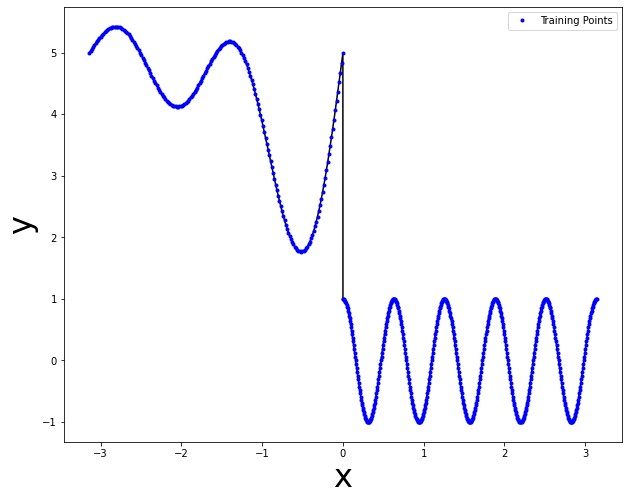

In [41]:
### LR scheduler with Contsnat LR
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
torch.manual_seed(1234) 

def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])

x_test_l = np.linspace(-np.pi, -1.0e-3, 301)
x_test_r = np.linspace(0., np.pi, 501)
x_test = np.concatenate((x_test_l, x_test_r), axis=0)
y_test = np.array([fun_x(i) for i in x_test])

ax1.plot(x_in, y_in, 'k-')
ax1.plot(x_in, y_in, '.b', label="Training Points")
ax1.set_xlabel('x', fontsize=32)
ax1.set_ylabel('y', fontsize=32)
ax1.legend()

x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()

x_test = torch.from_numpy(x_test.reshape(-1,1)).float()
y_test = torch.from_numpy(y_test.reshape(-1,1)).float()
train_loss_list = []
test_loss_list = []

acc_train = []
acc_test = []

loss_function = torch.nn.MSELoss()
Niter_Adam = 30000

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_adam = torch.optim.Adam(Net.parameters(), lr = 0.01, weight_decay=1e-5)


x = Variable(x)
y = Variable(y)

def l1_penalty(model, l1_lambda=1e-05):
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    return l1_lambda*l1_norm



# Implementation of Adam
print('Adam Optimization')
    
for it in range(Niter_Adam):
    y_pred = Net(x)
    loss = loss_function(y_pred, y) + + l1_penalty(Net, l1_lambda=1e-05)  
    optimizer_adam.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_adam.step()    
    print(f"Epoch: {it + 1:02}/{Niter_Adam} Loss: {loss:.5e}")
    y_train_pred = Net(x)
    
    
    
    with torch.no_grad():
        y_test_pred = Net(x_test)
        test_loss = loss_function(y_test_pred, y_test) 
        test_acuuracy = torch.linalg.norm(y_test-y_test_pred)/ (torch.norm(y_test_pred))
        ts_ac_val = test_acuuracy.numpy()
        train_acuuracy = torch.linalg.norm(y-y_train_pred)/ (torch.norm(y_train_pred))
        tr_ac_val = train_acuuracy.numpy()        
        train_loss_list.append(loss)
        test_loss_list.append(test_loss)
        acc_train.append(tr_ac_val)
        acc_test.append(ts_ac_val)
        
y_const_lr = y_pred.detach().numpy()     

In [54]:
import tensorflow as tf

In [62]:
help(tf.keras.losses.MeanSquaredError)


Help on class MeanSquaredError in module keras.losses:

class MeanSquaredError(LossFunctionWrapper)
 |  MeanSquaredError(reduction='auto', name='mean_squared_error')
 |  
 |  Computes the mean of squares of errors between labels and predictions.
 |  
 |  `loss = square(y_true - y_pred)`
 |  
 |  Standalone usage:
 |  
 |  >>> y_true = [[0., 1.], [0., 0.]]
 |  >>> y_pred = [[1., 1.], [1., 0.]]
 |  >>> # Using 'auto'/'sum_over_batch_size' reduction type.
 |  >>> mse = tf.keras.losses.MeanSquaredError()
 |  >>> mse(y_true, y_pred).numpy()
 |  0.5
 |  
 |  >>> # Calling with 'sample_weight'.
 |  >>> mse(y_true, y_pred, sample_weight=[0.7, 0.3]).numpy()
 |  0.25
 |  
 |  >>> # Using 'sum' reduction type.
 |  >>> mse = tf.keras.losses.MeanSquaredError(
 |  ...     reduction=tf.keras.losses.Reduction.SUM)
 |  >>> mse(y_true, y_pred).numpy()
 |  1.0
 |  
 |  >>> # Using 'none' reduction type.
 |  >>> mse = tf.keras.losses.MeanSquaredError(
 |  ...     reduction=tf.keras.losses.Reduction.NONE)


In [1]:
from AdaHessian import AdaHessian

Epoch: 01/30 Loss: 6.23648e+00
Epoch: 02/30 Loss: 6.06708e+00
Epoch: 03/30 Loss: 5.90236e+00
Epoch: 04/30 Loss: 5.74237e+00
Epoch: 05/30 Loss: 5.58713e+00
Epoch: 06/30 Loss: 5.43660e+00
Epoch: 07/30 Loss: 5.29071e+00
Epoch: 08/30 Loss: 5.14929e+00
Epoch: 09/30 Loss: 5.01213e+00
Epoch: 10/30 Loss: 4.87900e+00
Epoch: 11/30 Loss: 4.74966e+00
Epoch: 12/30 Loss: 4.62385e+00
Epoch: 13/30 Loss: 4.50134e+00
Epoch: 14/30 Loss: 4.38191e+00
Epoch: 15/30 Loss: 4.26534e+00
Epoch: 16/30 Loss: 4.15145e+00
Epoch: 17/30 Loss: 4.04007e+00
Epoch: 18/30 Loss: 3.93108e+00
Epoch: 19/30 Loss: 3.82437e+00
Epoch: 20/30 Loss: 3.71989e+00
Epoch: 21/30 Loss: 3.61762e+00
Epoch: 22/30 Loss: 3.51753e+00
Epoch: 23/30 Loss: 3.41965e+00
Epoch: 24/30 Loss: 3.32400e+00
Epoch: 25/30 Loss: 3.23062e+00
Epoch: 26/30 Loss: 3.13954e+00
Epoch: 27/30 Loss: 3.05080e+00
Epoch: 28/30 Loss: 2.96442e+00
Epoch: 29/30 Loss: 2.88041e+00
Epoch: 30/30 Loss: 2.79877e+00
in AdaHessian Loss
Epoch: 01/52 Loss: 2.71949e+00


/Users/raj/opt/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:154: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at  ../torch/csrc/autograd/engine.cpp:976.)
  Variable._execution_engine.run_backward(


Epoch: 02/52 Loss: 1.19629e+00
Epoch: 03/52 Loss: 8.95687e-01
Epoch: 04/52 Loss: 1.02054e+00
Epoch: 05/52 Loss: 1.13427e+00
Epoch: 06/52 Loss: 1.16512e+00
Epoch: 07/52 Loss: 1.11291e+00
Epoch: 08/52 Loss: 1.02046e+00
Epoch: 09/52 Loss: 9.39480e-01
Epoch: 10/52 Loss: 8.77871e-01
Epoch: 11/52 Loss: 8.42322e-01
Epoch: 12/52 Loss: 8.31098e-01
Epoch: 13/52 Loss: 8.39078e-01
Epoch: 14/52 Loss: 8.55458e-01
Epoch: 15/52 Loss: 8.69826e-01
Epoch: 16/52 Loss: 8.77802e-01
Epoch: 17/52 Loss: 8.76922e-01
Epoch: 18/52 Loss: 8.67657e-01
Epoch: 19/52 Loss: 8.52034e-01
Epoch: 20/52 Loss: 8.33739e-01
Epoch: 21/52 Loss: 8.15753e-01
Epoch: 22/52 Loss: 8.00964e-01
Epoch: 23/52 Loss: 7.91075e-01
Epoch: 24/52 Loss: 7.85938e-01
Epoch: 25/52 Loss: 7.84592e-01
Epoch: 26/52 Loss: 7.85552e-01
Epoch: 27/52 Loss: 7.87264e-01
Epoch: 28/52 Loss: 7.88241e-01
Epoch: 29/52 Loss: 7.87503e-01
Epoch: 30/52 Loss: 7.84836e-01
Epoch: 31/52 Loss: 7.80584e-01
Epoch: 32/52 Loss: 7.75155e-01
Epoch: 33/52 Loss: 7.69290e-01
Epoch: 3

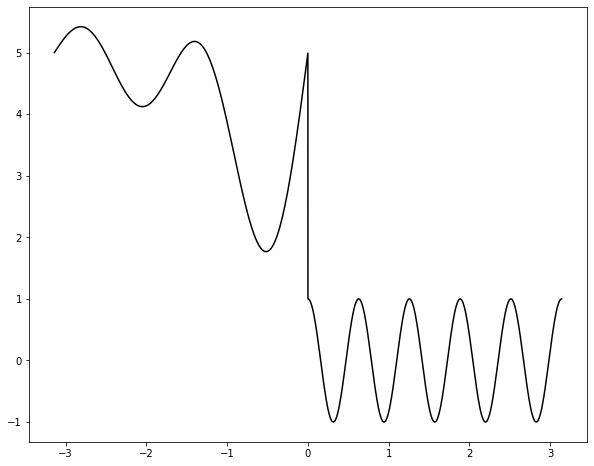

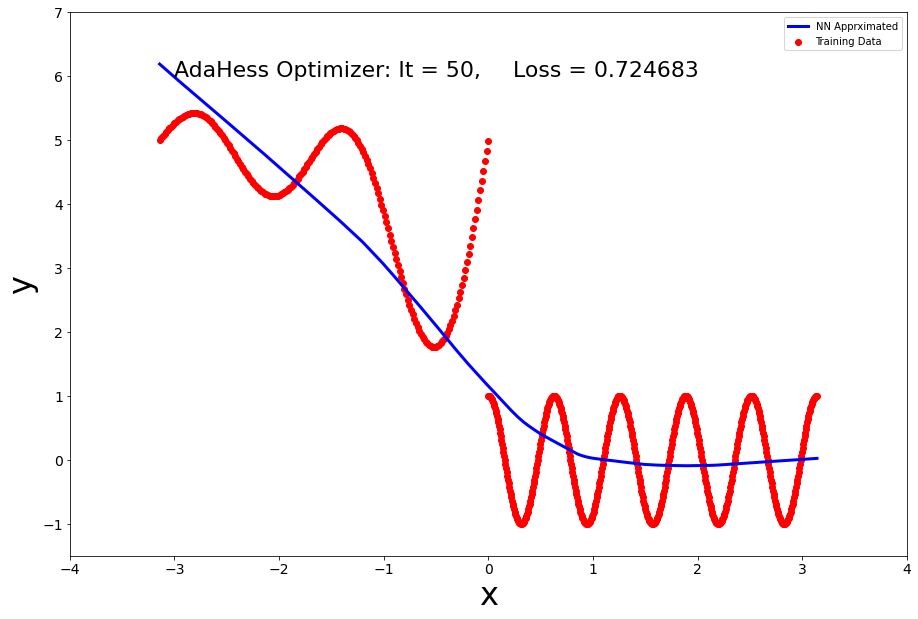

In [2]:
# Combination of Adam + AdaHessian
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')


x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_Adam = 30
Niter_LBFGS = 52


Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_adam = torch.optim.Adam(Net.parameters(), lr = 0.001)
optimizer_lbfgs = AdaHessian(Net.parameters())

fig, ax = plt.subplots(figsize=(15,10))
image_list = []
adam_loss = []
AdaHess_loss = []

x = Variable(x)
y = Variable(y)



for it in range(Niter_Adam):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_adam.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_adam.step()    
    adam_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_Adam} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it % 4 == 0:
        plt.cla()
        ax.set_xlabel('x', fontsize=32)
        ax.set_ylabel('y Predictied', fontsize=32)
        ax.set_xlim(-4, 4)
        ax.set_ylim(-1.5, 7.0)
        ax.scatter(x_in, y_in, color = "red", label="Noisy Data")
        ax.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax.text(-3, 6.0, 'Adam Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax.text(0.24, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.legend()

        fig.canvas.draw()      
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        image_list.append(image)
    
print("in AdaHessian Loss")

 
for it in range(Niter_LBFGS):
    optimizer_lbfgs.zero_grad()
    y_pred = Net(x)
    loss = loss_function(y_pred, y)
    loss.backward(create_graph=True)
    optimizer_lbfgs.step()
    AdaHess_loss.append(loss.detach().numpy())
    print(f"Epoch: {it + 1:02}/{Niter_LBFGS} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it % 2 == 0:
        plt.cla()
        ax.set_xlabel('x', fontsize=32)
        ax.set_ylabel('y', fontsize=32)
        ax.set_xlim(-4, 4)
        ax.set_ylim(-1.5, 7.0)
        ax.scatter(x_in, y_in, color = "red", label="Training Data")
        ax.plot(x_in, y_test, 'b-', lw=3, label="NN Apprximated")
        ax.text(-3, 6.0, 'AdaHess Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax.text(0.24, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)

        ax.legend()

        fig.canvas.draw()      
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        image_list.append(image)
    
   

imageio.mimsave('./Adam_and_AdaHess.gif', image_list, fps=1)

Epoch: 01/30 Loss: 6.23648e+00
Epoch: 02/30 Loss: 6.06708e+00
Epoch: 03/30 Loss: 5.90236e+00
Epoch: 04/30 Loss: 5.74237e+00
Epoch: 05/30 Loss: 5.58713e+00
Epoch: 06/30 Loss: 5.43660e+00
Epoch: 07/30 Loss: 5.29071e+00
Epoch: 08/30 Loss: 5.14929e+00
Epoch: 09/30 Loss: 5.01213e+00
Epoch: 10/30 Loss: 4.87900e+00
Epoch: 11/30 Loss: 4.74966e+00
Epoch: 12/30 Loss: 4.62385e+00
Epoch: 13/30 Loss: 4.50134e+00
Epoch: 14/30 Loss: 4.38191e+00
Epoch: 15/30 Loss: 4.26534e+00
Epoch: 16/30 Loss: 4.15145e+00
Epoch: 17/30 Loss: 4.04007e+00
Epoch: 18/30 Loss: 3.93108e+00
Epoch: 19/30 Loss: 3.82437e+00
Epoch: 20/30 Loss: 3.71989e+00
Epoch: 21/30 Loss: 3.61762e+00
Epoch: 22/30 Loss: 3.51753e+00
Epoch: 23/30 Loss: 3.41965e+00
Epoch: 24/30 Loss: 3.32400e+00
Epoch: 25/30 Loss: 3.23062e+00
Epoch: 26/30 Loss: 3.13954e+00
Epoch: 27/30 Loss: 3.05080e+00
Epoch: 28/30 Loss: 2.96442e+00
Epoch: 29/30 Loss: 2.88041e+00
Epoch: 30/30 Loss: 2.79877e+00
in LBFGS Loss
Epoch: 01/50 Loss: 1.57252e-02
Epoch: 02/50 Loss: 1.3601

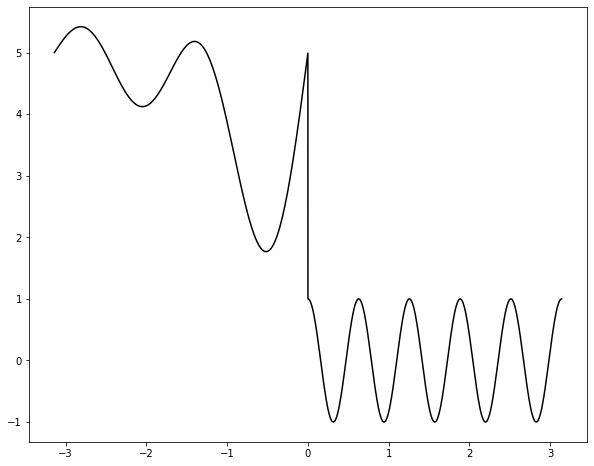

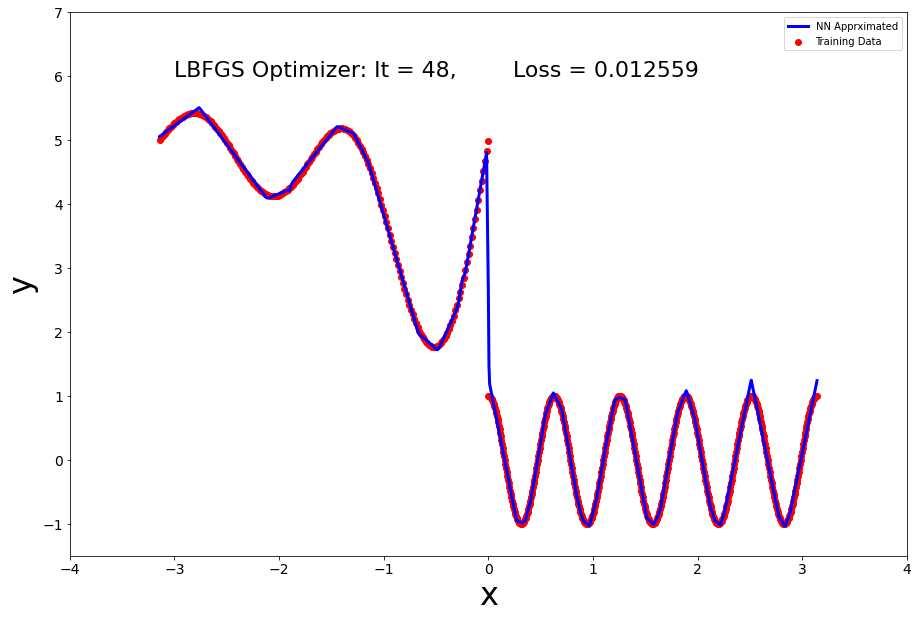

In [18]:
# Combination of Adam + L-BFGS
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')


x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_Adam = 30
Niter_LBFGS = 50


Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_adam = torch.optim.Adam(Net.parameters(), lr = 0.001)
optimizer_lbfgs = LBFGS(Net.parameters(), history_size=8, max_iter=500000)

fig, ax = plt.subplots(figsize=(15,10))
image_list = []
adam_loss_1 = []
lbfgs_loss = []

x = Variable(x)
y = Variable(y)



for it in range(Niter_Adam):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_adam.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_adam.step()    
    adam_loss_1.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_Adam} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it % 4 == 0:
        plt.cla()
        ax.set_xlabel('x', fontsize=32)
        ax.set_ylabel('y Predictied', fontsize=32)
        ax.set_xlim(-4, 4)
        ax.set_ylim(-1.5, 7.0)
        ax.scatter(x_in, y_in, color = "red", label="Noisy Data")
        ax.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax.text(-3, 6.0, 'Adam Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax.text(0.24, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.legend()

        fig.canvas.draw()      
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        image_list.append(image)
    
print("in LBFGS Loss")

 
for it in range(Niter_LBFGS):
    def closure():
        optimizer_lbfgs.zero_grad()
        y_pred = Net(x)
        loss = loss_function(y_pred, y)
        loss.backward()
        return loss

    optimizer_lbfgs.step(closure)
    loss = closure()        
    lbfgs_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_LBFGS} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it % 2 == 0:
        plt.cla()
        ax.set_xlabel('x', fontsize=32)
        ax.set_ylabel('y', fontsize=32)
        ax.set_xlim(-4, 4)
        ax.set_ylim(-1.5, 7.0)
        ax.scatter(x_in, y_in, color = "red", label="Training Data")
        ax.plot(x_in, y_test, 'b-', lw=3, label="NN Apprximated")
        ax.text(-3, 6.0, 'LBFGS Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax.text(0.24, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)

        ax.legend()

        fig.canvas.draw()      
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        image_list.append(image)
    
   

imageio.mimsave('./Adam_and_LBFGS.gif', image_list, fps=1)

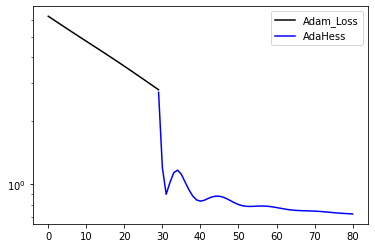

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

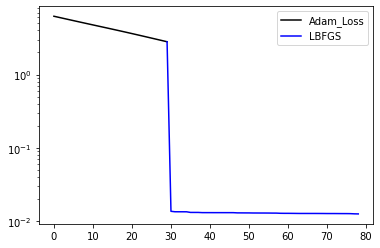

In [60]:
import matplotlib.pyplot as plt

ep1 = np.arange(0,30)
ep2 = np.arange(29,81)

y1 = adam_loss
y1_np = []
for i in range(len(y1)):
    t=y1[i].detach().numpy()
    y1_np.append(t)
y1_np = np.array(y1_np).reshape((-1,1))
y2 = AdaHess_loss
y2_np = np.array(y2).reshape((-1,1))

plt.semilogy(ep1, y1_np, "-k", label="Adam_Loss")
plt.semilogy(ep2, y2_np, "-b", label="AdaHess")
plt.legend()
plt.show()

y3 = adam_loss_1
y3_np = []
for i in range(len(y3)):
    t=y3[i].detach().numpy()
    y3_np.append(t)
y3_np = np.array(y3_np).reshape((-1,1))

y4 = lbfgs_loss
y4_np = []

for i in range(len(y4)):
    t=y4[i].detach().numpy()
    y4_np.append(t)
y4_np = np.array(y4_np).reshape((-1,1))
ep1 = np.arange(0,30)
ep2 = np.arange(29,79)
y4_np[0] = y3_np[29, 0]
plt.semilogy(ep1, y3_np, "-k", label="Adam_Loss")
plt.semilogy(ep2, y4_np, "-b", label="LBFGS")
plt.legend()
ep1